# Home Credit Default Risk (HCDR)

## Group 4:
#### Maria Gaffney, magaffne@iu.edu
#### Hunter Sikora, hsikora@iu.edu
#### Donghui Zhou, dozhou@iu.edu
#### Pranay Pagdhare, ppagdhar@iu.edu

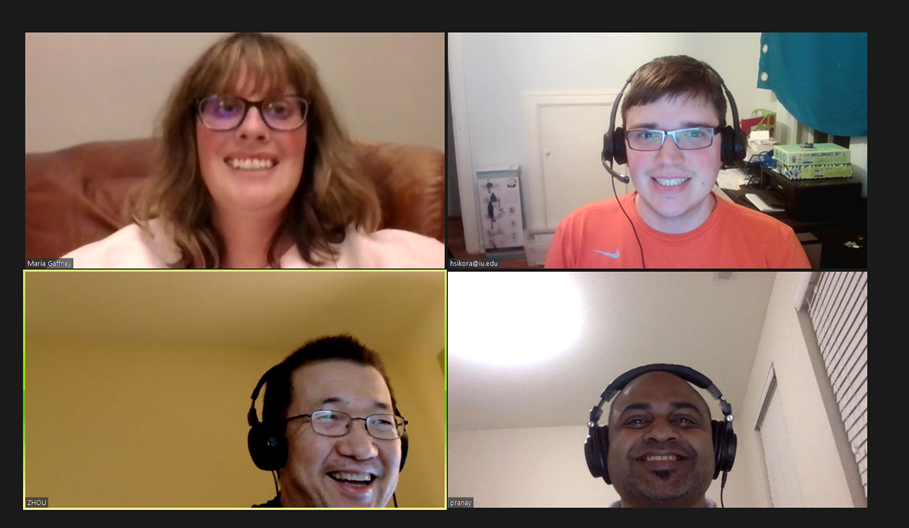

# Abstract

Access to credit is essential part of financial stability. However, many Americans that lack a long credit history face barriers to access of credit. Home Credit sought to provide them with credit using what data they had available to predict creditworthiness. In phase three, we expanded on our work from phase two by implementing deep learning neural networks using both mean squared error and cross entropy loss functions. We also tested different layer types such as linear and nonlinear layers along with varying the number of layers in the models. In addition, we experimented with different activation functions such as sigmoid and relu, and different optimizers such as ADAM and SGD. Despite the multiple experiments with varied parameters, our multilayer perceptron model AUC continued to hover around 0.5 making logistic regression our best model with an AUC of 0.7603.

# Introduction

For this project, we evaluated the data set from the Home Credit Default Risk Kaggle Competition. The goal was to find the best prediction models to determine the likelihood of loan repayment of applicants that lacked traditional credit scores. 

Access to credit for home buying is essential for building wealth in the United States. Nearly a quarter of household wealth comes from home equity. Unfortunately not all individuals searching for homes have long credit histories and therefore are often turned away for mortgages. Many people struggle to get loans due to insufficient or non-existent credit histories. This population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data -- including telco and transactional information -- to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The seven data sets provided fall into two main types, the application train/test sets, and the clients previous credit history. The application  train/test data contains relevant data on the applicants demographics, information on their loan, and information concerning the application itself. The other data sets contain data about previous loans for the applicant. 

A basic workflow for the execution of this machine learning project is provided.

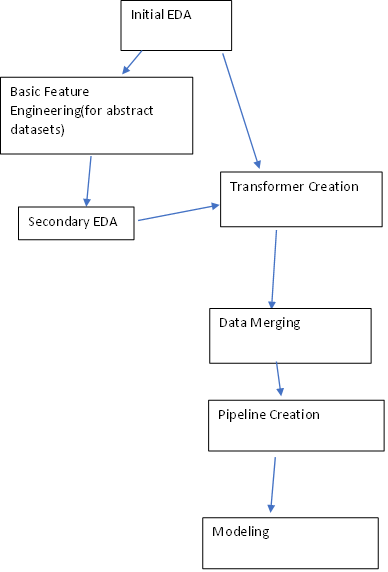

# Feature Engineering

Many of the data sets provided by Home Credit are an agglomeration of several types of loans. This leads to numerous features being inaccurately represented in the data sets. For instance: all cash and credit card loans have zero for down payments, despite being a loan that would not use down payments. Consumer loans have their balances intermixed with revolving loans even though the loan types more than likely having large discrepancies in interest. We felt that the best way for our models to learn from the data was to separate loans by their class and create separate features for each. This also had the benefit of no longer separating the loans by data set, which is arbitrary since the separation was due to source, not type. Therefore, we split some data and merged others together to get more precise features.


We started with credit cards.  Credit Card data is scattered among the four datasets bureau_balance, bureau, credit_card_balance, and Previous_Application. We pulled all the data out of each data set pertaining to credit cards and engineered them separately from the other loan data. We ignored columns in the data set that were not applicable to credit cards, like down payments. Then, to match the features between the two data sets we set up conversions to keep features consistent between the two types. For instance, bureau_balance tracked days late categorically by <30, 30-60, 60-90, etc. credit_card_balance tracked the true number of days. To rectify the difference, we converted the credit_card_balance days late to  categories as well. 


In [ ]:
#Credit Card Late Payment Engineering
credit_card_late = credit_card_balance[credit_card_balance["SK_DPD"] > 0]
credit_card_late.loc[credit_card_late.SK_DPD < 31, "SK_DPD"] = 1
credit_card_late.loc[credit_card_late.SK_DPD > 120, "SK_DPD"] = 5
credit_card_late.loc[credit_card_late.SK_DPD > 90, "SK_DPD"] = 4
credit_card_late.loc[credit_card_late.SK_DPD > 60, "SK_DPD"] = 3
credit_card_late.loc[credit_card_late.SK_DPD > 30, "SK_DPD"] = 2

For other loan types, we split them by cash loans and consumer loans and applied the same methodology. We then merged all of the datasets together and gave zeros for missing loan features.

# Pipelines

There were multiple numeric and categorical pipelines created for the processing of the data. The numeric pipelines all have a standard scaler as the first transformer. The next step was to impute missing data. This was achieved using four seperate pipes: median, mean, most frequent, and constant as the imputation methods. Features were selected for each individual pipe by saving it in a specific list dedicated to that pipe/imputation method. Parallel to these numeric pipelines, there is also a pipe for the handling of categorical data. The first transformer method of the categorical pipeline is to impute the missing values. Next, the features were one hot encoded for ease of processing and evaluation. At this point, the four numeric and one categorical pipelines were merged together using Feature Union. From this final preprocesed dataset, there were a few methods used for further evaluation. Initially, all features were routed directly to the various estimator models used: logistic regression, k nearest neighbors, support vector classification, decision tree, naive bayes, and a majority voting classifier ensemble method. After a baseline for each model was established, the next approach was to add an intermediate feature selection transformer prior to the estimator step. This produced a logistic regression, decision tree and support vector classifier model with only the most important features selected.

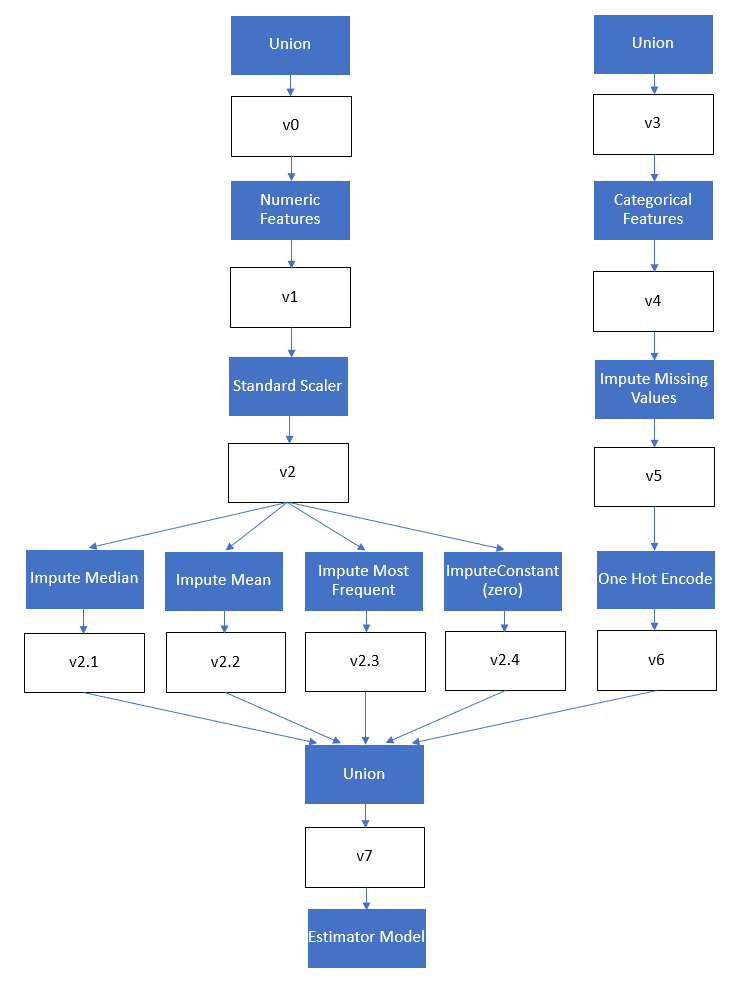

# Data Leakage

The concern of data leakage was managed by the use of these pipelines to automate the machine learning workflow. The pipelines combined with using cross fold validation prevented data leakage in the test harness by ensuring that data preparation like standardization and imputation was constrained to each fold of the cross validation procedure.

# Modeling

Multiple modeling types were used to obtain the final predictions including: logistic regression, k nearest neighbors, support vector classification, decision trees, naive bayes, and an ensemble majority voting classifier. Some of these models work by optimizing a loss function. A loss function is a combination of loss terms and regularization terms. The loss metric commonly used for regression models is the mean squared error, while the loss metric commonly used for classification models is cross-entropy. The formulas for the Mean Squared Error and Binary Cross-Entropy loss terms used are as follows:

$$
MSE(\theta)=\frac{1}{n}\sum_{i=1}^{n}(y_i-\theta^TX_i)^2\\or\\MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2
$$

$$
BCE=-\frac{1}{m}\sum_{i=1}^{m}[{(y_i\log\hat{p_i}) + (1 - y_i)\log(1 - \hat{p_i})}]
$$

The common regularization techniques for regression models are known as L1, or Lasso Regression and L2, or Ridge Regression. These regularization terms have the following formulas:

$$
Lasso Loss(\theta) = MSE(\theta) + \alpha \sum_1^n |\theta_i|
$$

$$
Ridge Loss(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^{2}
$$

There is also a regularization technique called Elastic Net which is a combination of Ridge and Lasso regularization. This technique allows for the control of the regularization mix ratio with the variable *r*.

$$
Elastic Net Loss(\theta) = MSE(\theta) + r\alpha \sum_1^n |\theta_i|+ \alpha \frac{1-r}{2} \sum_{i=1}^{n} \theta_i^{2}
$$

**Features**

Upon the completion of feature engineering, there were a total of 152 baseline features. These features were handled as required for the necessary imputation methods within the pipelines previously discussed. Once the categorical features were one hot encoded, we had a final total of 311 features. After running each model with the full feature set, all features were directed through a feature selection pipeline to allow for automatic selection of the most important features for the logistic regression, support vector, and decision tree classifiers. This reduced the number of features to approximately 109, 83, and 72 respectively.

**Hyperparameters**

The RandomSearch method was used to perform the hyperparameter tuning. This method was selected over GridSearch as a faster alternative due to the size of the data and the computational time of the models. The hyperparameters tuned using RandomSearch included:

Logistic Regression & Support Vector Classifier:
* C - Inverse of regularization strength (smaller values specify stronger regularization)
* Penalty - Regularization penalty imposed for having too many variables

K Nearest Neighbors:
* N neighbors - Number of nearest neighbors used to make a classification
* Weights - Method by which nearest neighbors are determined

Decision Tree:
* Criterion - How the impurity of a split will be measured
* Max Depth - Depth of the tree
* Min Samples Leaf - Minimum number of samples in a leaf

The defined search ranges and results of the hyperparameter tuning are displayed below.

![](hyperparameter_search.PNG)

![](hyperparameter_results.PNG)

**Neural Network**

In addition to the prediction models previously mentioned, we also built two deep learning neural networks using both mean squared error and cross entropy loss functions. Within these neural networks, we tested different layer types such as linear and nonlinear layers along with varying the number of layers in the models. We also experimented with different activation functions for the deep learning models such as sigmoid and relu, and different optimizers such as ADAM and SGD. A code snippet for each model type is provided here for reference.

![](OOP_model.PNG)

![](sequential_model.PNG)

# Experimental Results

We began with an initial baseline model, then expanded our estimators to include several techniques along with an ensemble method. Next, we used feature selection to try to improve upon the performance of the models. The results of the experiments are shown in the log below.

In [27]:
expLog

exp_name  Train Acc  Valid Acc  \
0                           Baseline_LR_152_features     0.9205     0.9192   
1       ('Logistic Regression', 'with_311_features')     0.9205     0.9191   
2                       ('KNN', 'with_311_features')     0.9229     0.9136   
3                       ('SVC', 'with_311_features')     0.9194     0.9192   
4             ('Decision Tree', 'with_311_features')     1.0000     0.8535   
5               ('Naive Bayes', 'with_311_features')     0.1338     0.1286   
6  ('Logistic Regression', 'with_', 109, 'selecte...     0.9188     0.9190   
7   ('Linear SVC', 'with_', 83, 'selected_features')     0.9198     0.9186   
8  ('Decision Tree', 'with_', 72, 'selected_featu...     0.9216     0.9167   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9171     0.7906     0.7413     0.7350  
1     0.9171     0.7905     0.7414     0.7350  
2     0.9109     0.9057     0.5640     0.5643  
3     0.9194     0.7928     0.7392     0.7294  
4     0.8553     1.0000     0.5370     0.5351  
5     0.1222     0.5243     0.5115     0.5152  
6     0.9204     0.7427     0.7349     0.7404  
7     0.9191     0.7242     0.6819     0.6991  
8     0.9148     0.7256     0.6697     0.6690

Finally, we created two deep learning neural networks using both an OOP and Sequential model. The test accuracy of the best performing deep learning model was 0.91645 with an AUC score of 0.498. The full results of this sequential model are shown below.

![](nn_results.PNG)

# Discussion

The metric used to evaluate the prediction performance of the models is the area under the ROC curve (AUC). This is calculated as the area under the (Sensitivity) vs. (1 - Specificity) curve, with those calculations being:

$$Sensitivity = \frac{TP}{TP+FN}$$

$$Specificity = \frac{TN}{FP+TN} ,$$

*where TP, FP, TN, FN are True Positive, False Positive, True Negative, False Negative respectively.*

Initially, we started with a baseline logistic regression model using 152 features and producing an AUC of 0.7350. Next, we trained several models such as logistic regression, k nearest neighbors, support vector classification, decision tree, naive bayes, and an ensemble majority voting classifier. The best performing model using all of the provided application features along with our engineered features was logistic regression with an ROC AUC score of 0.7350 on a subset of 20% of the full training data set. When ran on the entire datasest, the logistic regression ROC AUC was 0.7603. After applying feature selection, the logistic regression and decision tree models received a slightly improved AUC score of 0.7404 and 0.6690 respectively, while the AUC score for the SVC model actually decreased. The decision tree model including all features had a training accuracy of 1.0 which indicates overfitting and needs to be further evaluated. We also implemeted an OOP and Sequential neural network model with varying parameters. However, we were not able to get the model to produce an AUC score greater than roughly 0.5.

![](AUC_full_data.PNG)

# Conclusion

This project is important to provide equity for people that may not have established credit history. Machine learning can forecast the credibility of a borrower's ability to repay a loan. For phase two, further feature engineering along with feature selection and hyperparameter tuning increased our best ROC AUC score to 0.7603. In phase three, we built upon this modeling by adding some neural network models using PyTorch. While the multilevel perceptron model received a promising test accuracy of 0.916, the test AUC never really exceeded 0.5 despite the adjustment of different parameters and techniques. The Kaggle file submitted for phase three received a private score of 0.49948. Future work on this project would include further optimization of the neural network model along with the development of a multitask loss function to predict both loan default class and length of time before defaulting.

# Kaggle Submission

![](Kaggle_Submission_Phase_3.PNG)

# Data

**Background on the Dataset**

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

**Dataset**

The data sets fall into two main types, the application train/test sets, and the clients previous credit history. The application/train/test data contains relevant data on the applicants demographics, information on their loan, and information concerning the application itself. The other data sets contain data about previous loans for each application. 

**Some of the Challenges**

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data

**Data Files Overview**

There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

Here is an image of the schema for the datasets:

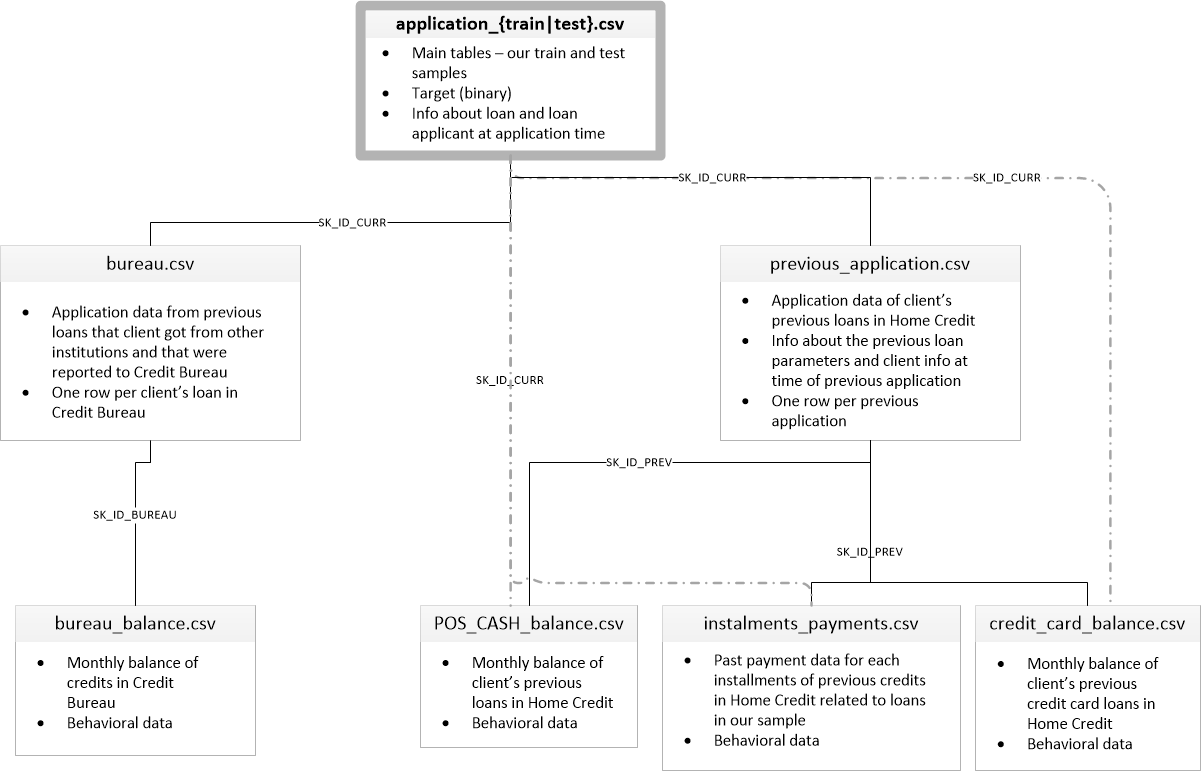

**Data Dictionary**

As part of the data download comes a Data Dictionary. It's named `HomeCredit_columns_description.csv`

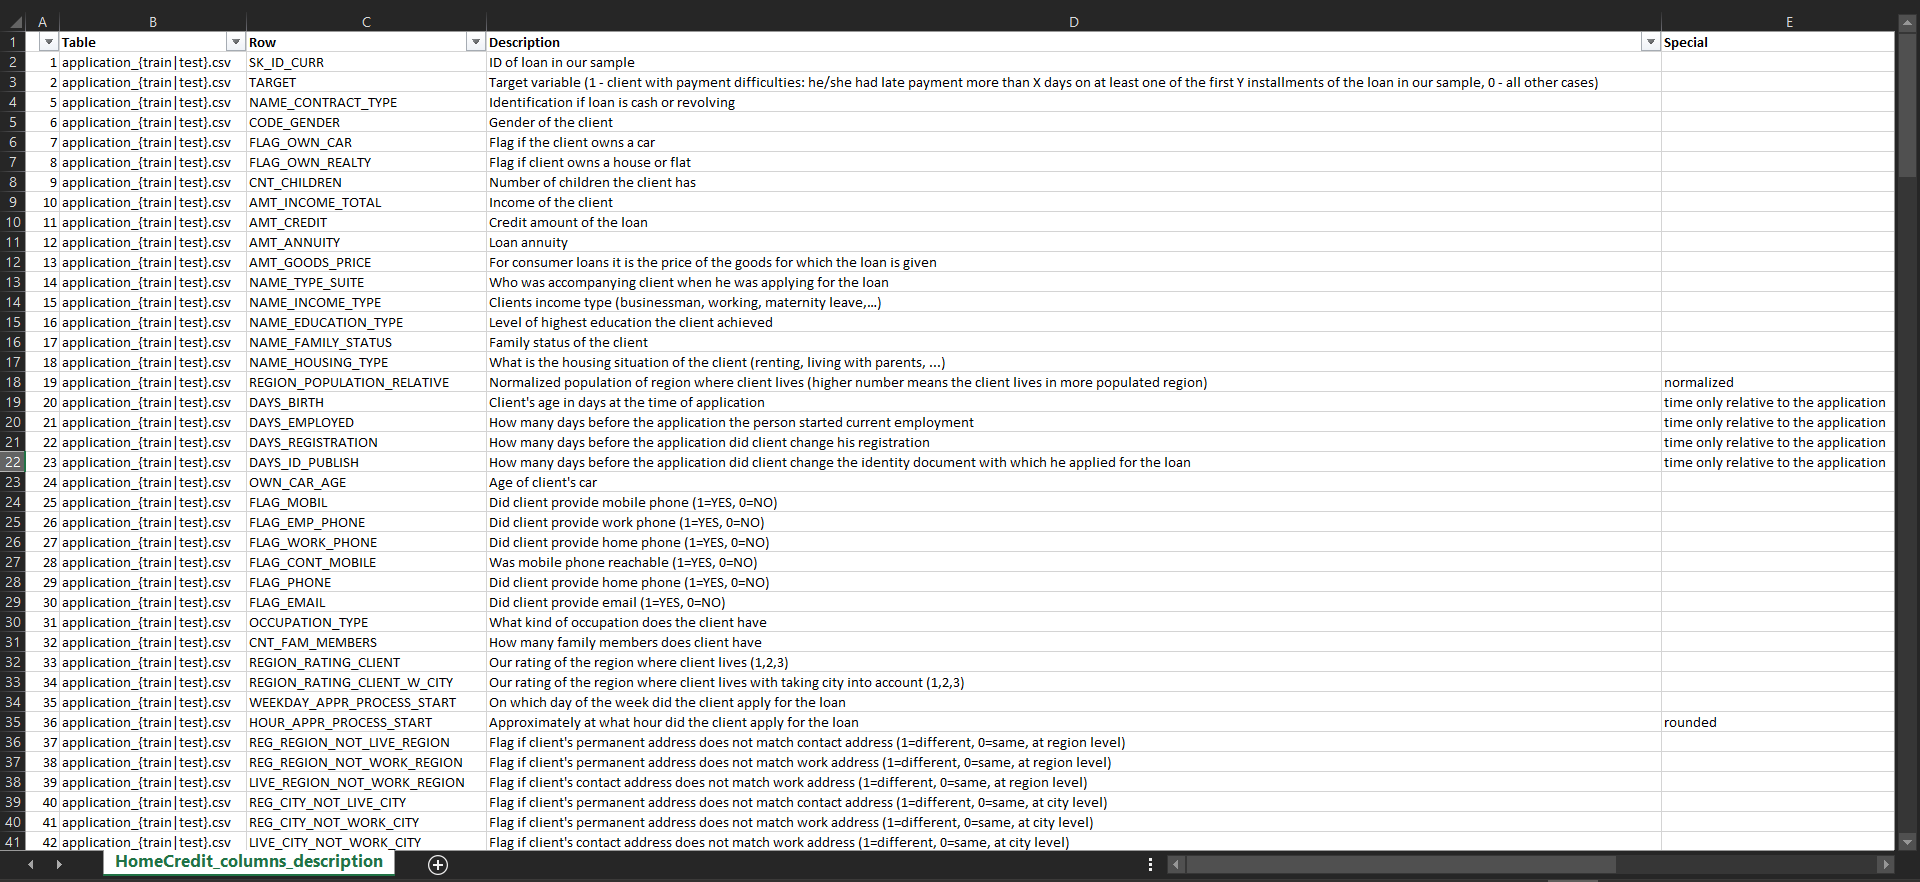

# Setup Kaggle and Imports

In [ ]:
!pip install kaggle

In [ ]:
!pwd

/content


In [ ]:
!mkdir /root/.kaggle
!echo '{"username":"mariagaffney","key":"88e240ff5f32cb2be18f907cf6b45596"}' > /root/.kaggle/kaggle.json
#!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  


**Load Data: Google Colab**

In [ ]:
# load data

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIR = '/content/drive/MyDrive/Data/'

**Load Data: Jupyter**

In [ ]:
import os

os.listdir()

DATA_DIR = r"Data"   # same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
#!mkdir $DATA_DIR

In [ ]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /content


In [ ]:
!ls -l $DATA_DIR

ls: cannot access 'Data': No such file or directory


In [ ]:
# You must first verify your Kaggle account and accept the rules of the competition
!kaggle competitions download home-credit-default-risk -p $DATA_DIR

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Imports**

In [ ]:
! pip install pandas==1.3.2

In [ ]:
!pip install sklearn_features

In [ ]:
!pip install mlinsights

     |████████████████████████████████| 2.3 MB 5.2 MB/s 
     |████████████████████████████████| 126 kB 32.8 MB/s 


In [ ]:
import pickle
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.classify import SklearnClassifier
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#from sklearn_features.transformers import DataFrameSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

**Preliminary Analysis**

In [ ]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily

The application dataset has the most information about the client: gender, age, income, family status, and education.


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.

In [ ]:
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

(307511, 122)

In [ ]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0
2      100013  ...                        4.0
3      100028  ...                        3.0
4      100038  ...                        NaN

[5 rows x 121 columns]

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
%%time
ds_names = ("application_train", "application_test", "bureau", "bureau_balance", "credit_card_balance", "installments_payments",
            "previous_application", "POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0
2      100013  ...                        4.0
3      100028  ...                        3.0
4      100038  ...                        NaN

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU  ... DAYS_CREDIT_UPDATE AMT_ANNUITY
0      215354       5714462  ...               -131         NaN
1      215354       5714463  ...                -20         NaN
2      215354       5714464  ...                -16         NaN
3      215354       5714465  ...                -16         NaN
4      215354       5714466  ...                -21         NaN

[5 rows x 17 columns]

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     2562384      378907  ...       0           0
1     2582071      363914  ...       0           0
2     1740877      371185  ...       0           0
3     1389973      337855  ...       0           0
4     1891521      126868  ...       0           0

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  ...  AMT_INSTALMENT  AMT_PAYMENT
0     1054186      161674  ...        6948.360     6948.360
1     1330831      151639  ...        1716.525     1716.525
2     2085231      193053  ...       25425.000    25425.000
3     2452527      199697  ...       24350.130    24350.130
4     2714724      167756  ...        2165.040     2160.585

[5 rows x 8 columns]

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0
2     2523466      122040  ...         365243.0                        1.0
3     2819243      176158  ...           -177.0                        1.0
4     1784265      202054  ...              NaN                        NaN

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     1803195      182943  ...       0           0
1     1715348      367990  ...       0           0
2     1784872      397406  ...       0           0
3     1903291      269225  ...       0           0
4     2341044      334279  ...       0           0

[5 rows x 8 columns]

CPU times: user 41 s, sys: 4.17 s, total: 45.1 s
Wall time: 49.4 s


In [ ]:
print("Size of Datasets:")

for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

Size of Datasets:
dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


**Application Train/Test Datasets EDA**

In [ ]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
datasets["application_train"].describe() # numerical only features

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  ...               265992.000000
mean   278180.518577  ...                    1.899974
std    102790.175348  ...                    1.869295
min    100002.000000  ...                    0.000000
25%    189145.500000  ...                    0.000000
50%    278202.000000  ...                    1.000000
75%    367142.500000  ...                    3.000000
max    456255.000000  ...                   25.000000

[8 rows x 106 columns]

In [ ]:
datasets["application_test"].describe() # numerical only features

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count   48744.000000  ...                42695.000000
mean   277796.676350  ...                    1.983769
std    103169.547296  ...                    1.838873
min    100001.000000  ...                    0.000000
25%    188557.750000  ...                    0.000000
50%    277549.000000  ...                    2.000000
75%    367555.500000  ...                    3.000000
max    456250.000000  ...                   17.000000

[8 rows x 105 columns]

In [ ]:
datasets["application_train"].describe(include='all') # look at all categorical and numerical features

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count   307511.000000  ...               265992.000000
unique            NaN  ...                         NaN
top               NaN  ...                         NaN
freq              NaN  ...                         NaN
mean    278180.518577  ...                    1.899974
std     102790.175348  ...                    1.869295
min     100002.000000  ...                    0.000000
25%     189145.500000  ...                    0.000000
50%     278202.000000  ...                    1.000000
75%     367142.500000  ...                    3.000000
max     456255.000000  ...                   25.000000

[11 rows x 122 columns]

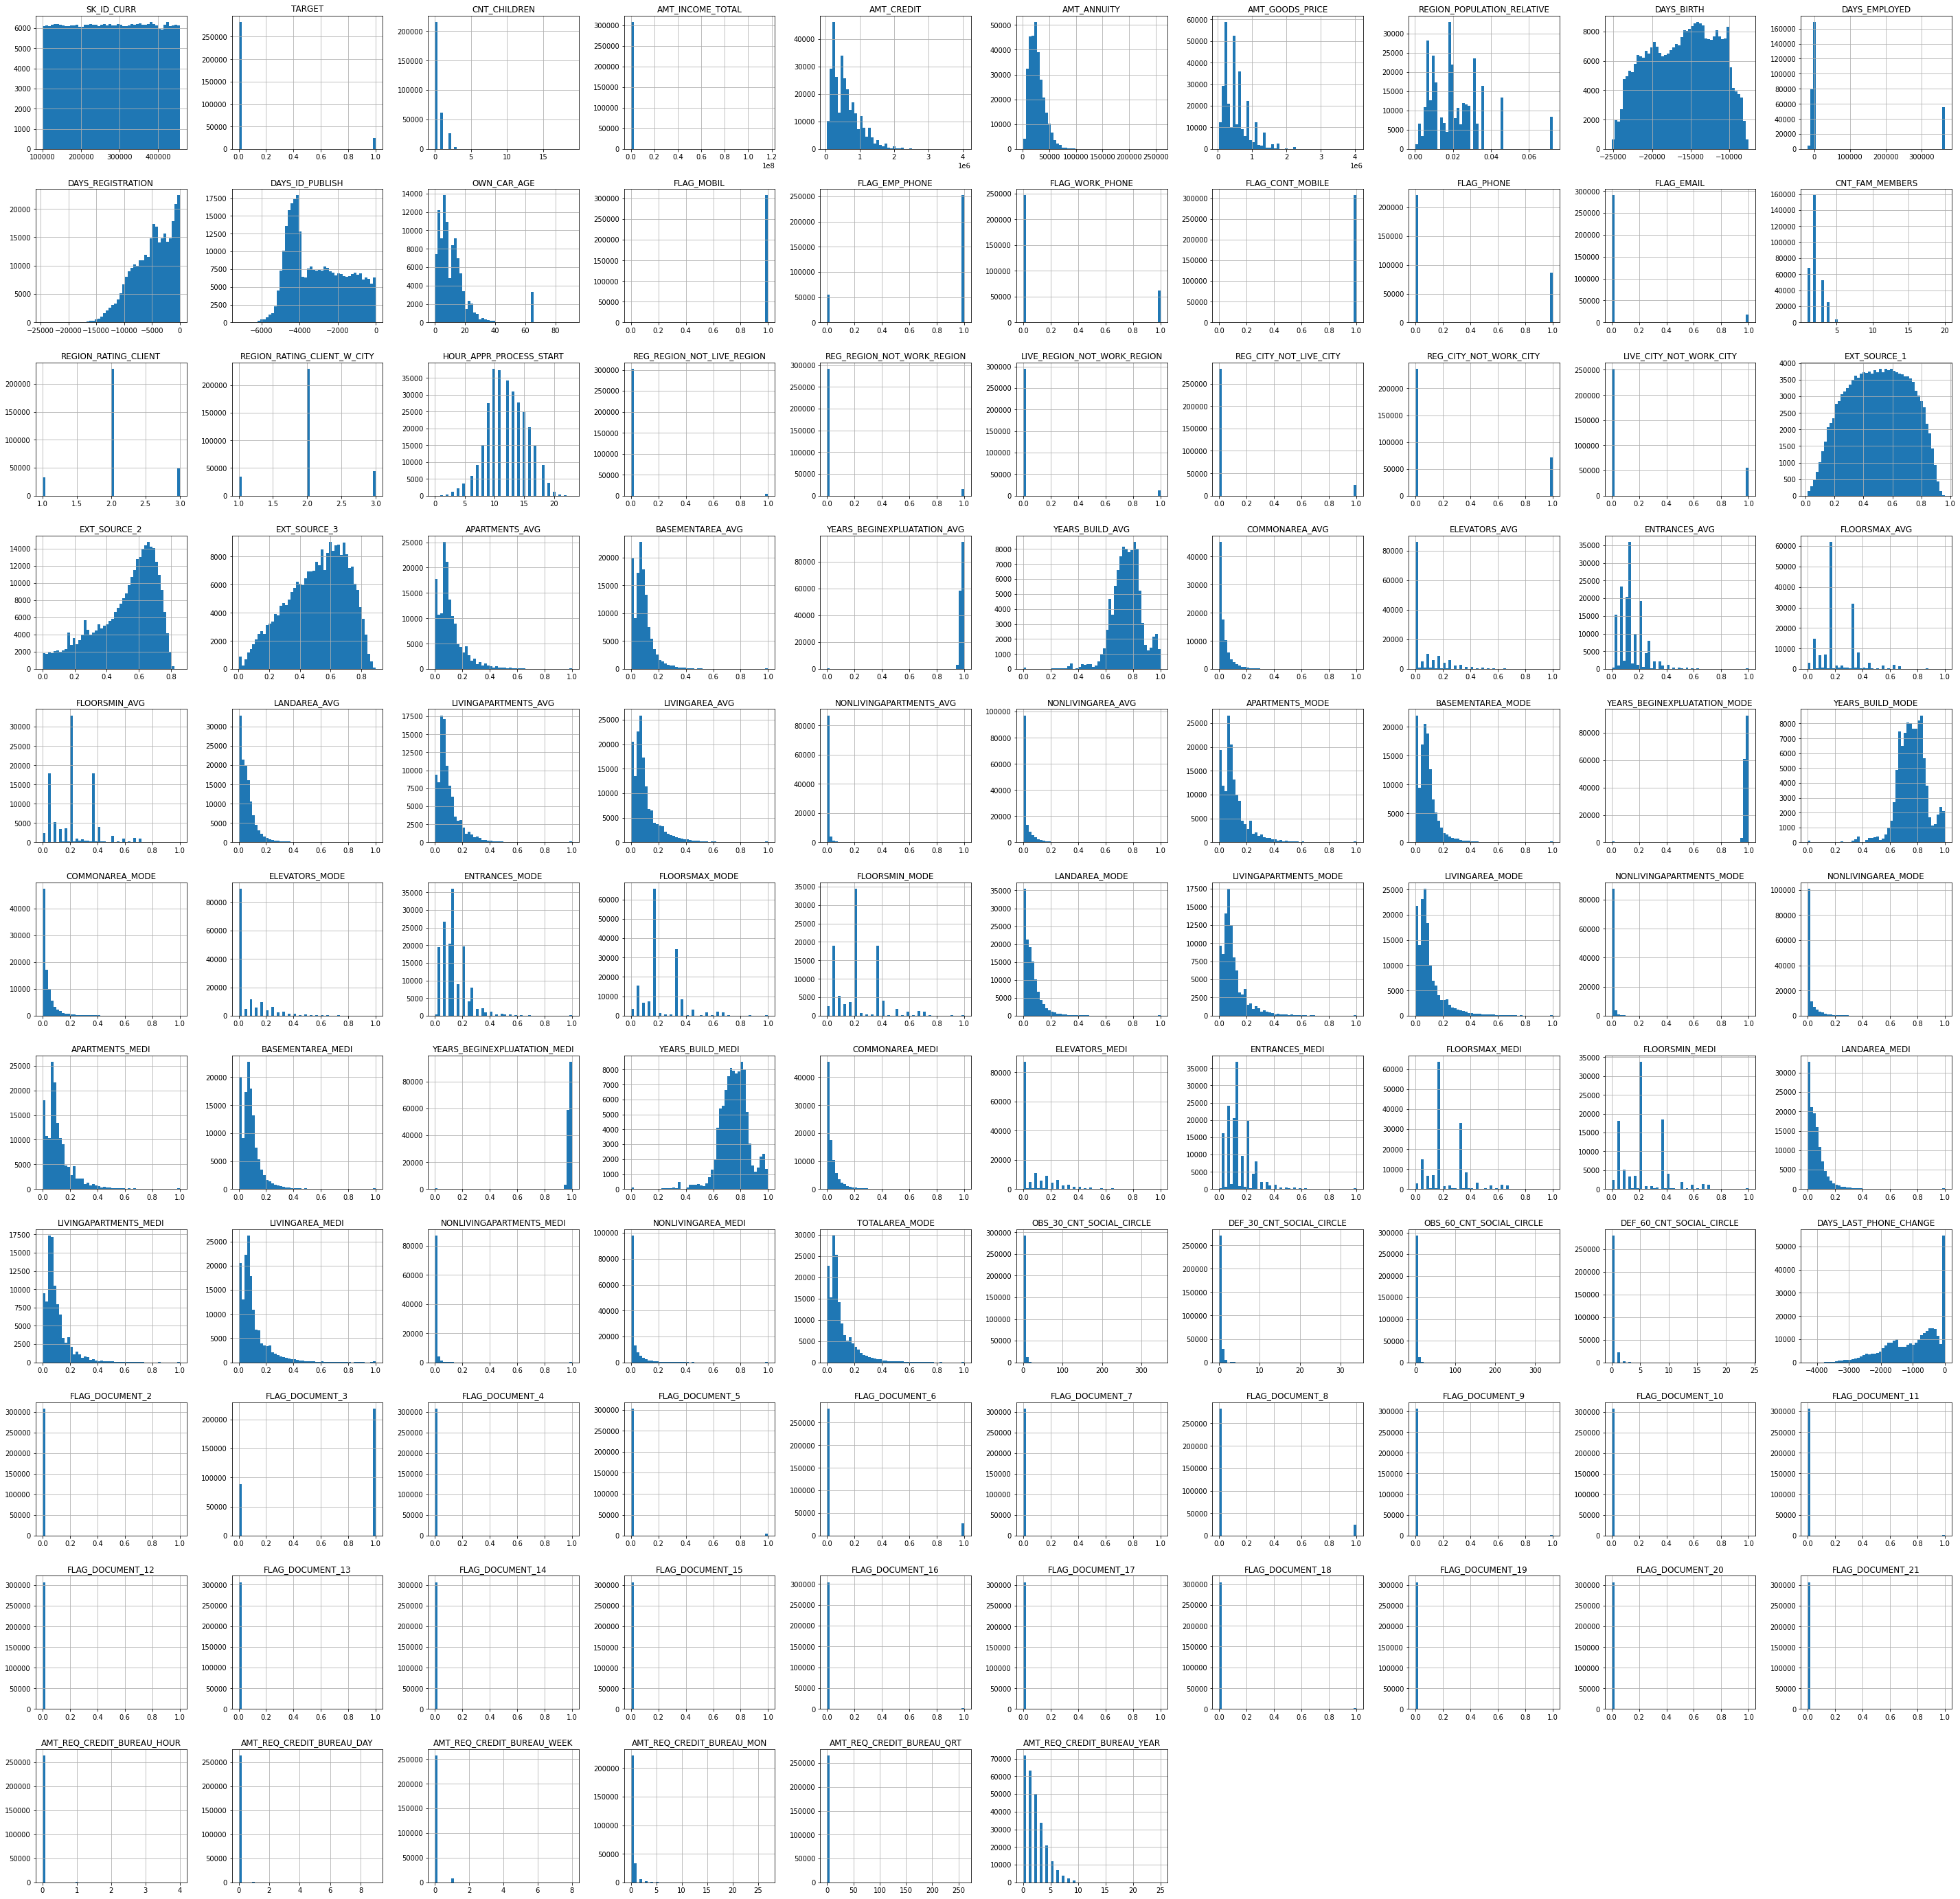

In [ ]:
%matplotlib inline
# plot distribution of each input variable
import matplotlib.pyplot as plt
datasets["application_train"].hist(bins=50, figsize=(50, 50))
plt.show()

In [ ]:
# missing data
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

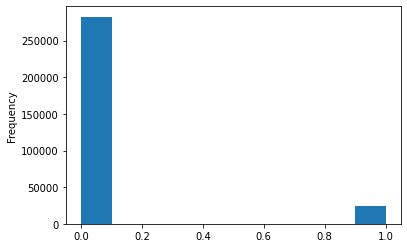

In [ ]:
# distribution of the target column
datasets["application_train"]['TARGET'].astype(int).plot.hist();
plt.show()

In [ ]:
# correlations with the target column
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlations:\n', correlations.head(10))
print(correlations)

Most Positive Correlations:
 FLAG_MOBIL                     0.000534
AMT_REQ_CREDIT_BUREAU_WEEK     0.000788
AMT_REQ_CREDIT_BUREAU_HOUR     0.000930
AMT_REQ_CREDIT_BUREAU_DAY      0.002704
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_DOCUMENT_21               0.003709
FLAG_DOCUMENT_2                0.005417
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUB

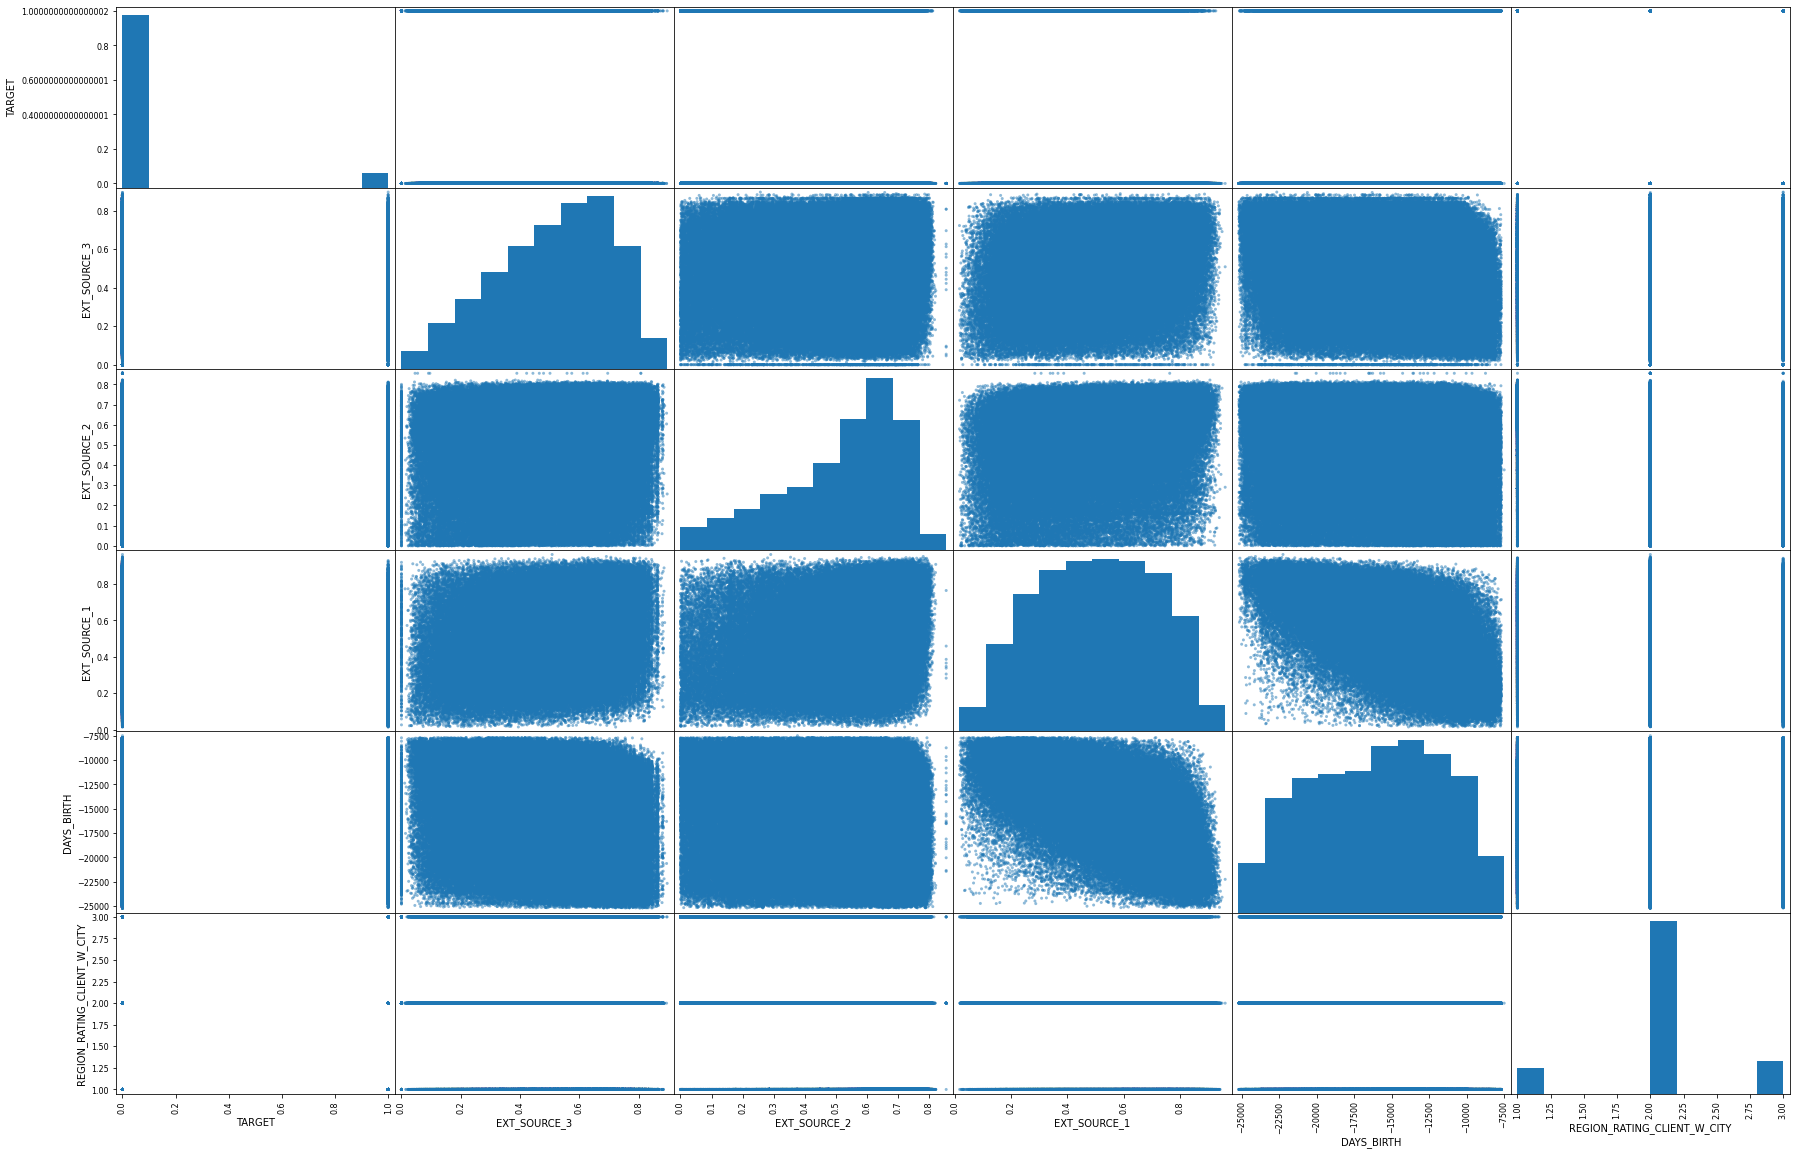

In [ ]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with TARGET
attributes = ["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY"]
scatter_matrix(datasets["application_train"][attributes], figsize=(30, 20));

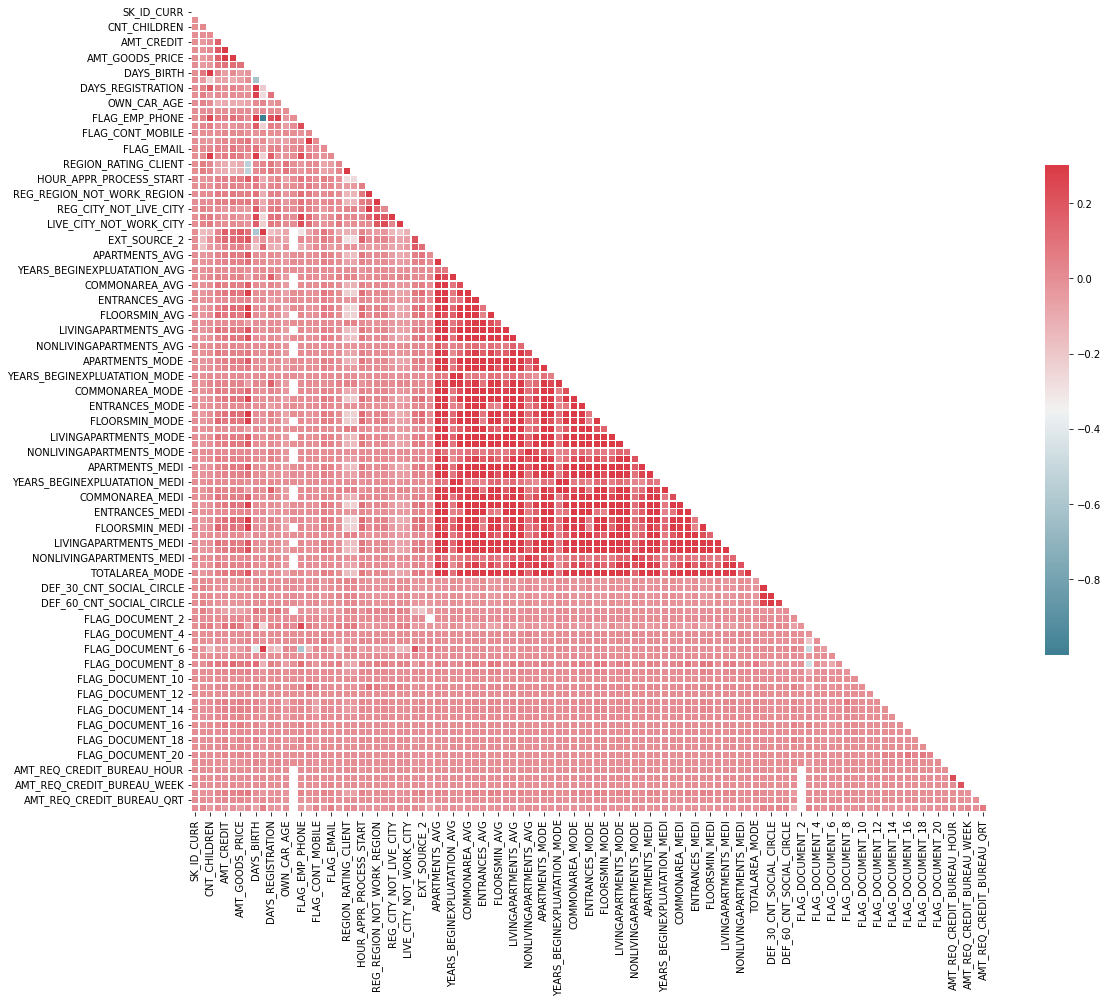

In [ ]:
# compute the correlation matrix
corr = datasets["application_train"].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

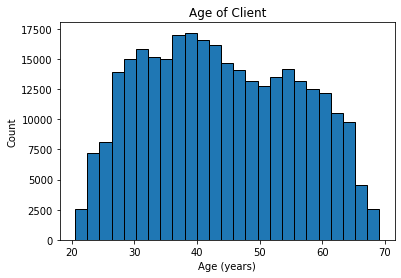

In [ ]:
# applicant's age
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

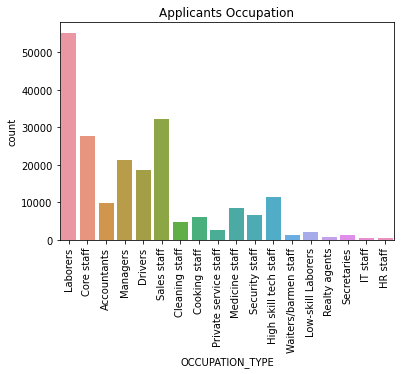

In [ ]:
# applicant's occupation
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);
plt.show()

In [ ]:
# results from application_train

app_train_results = pd.DataFrame(datasets["application_train"])

In [ ]:
app_train_results.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
app_train_results = app_train_results.drop(columns=['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE'])

In [ ]:
app_train_results.columns

Index(['SK_ID_CURR', 'TARGET'], dtype='object')

In [ ]:
print(app_train_results)

        SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]


In [ ]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
datasets["previous_application"].describe()

SK_ID_PREV    SK_ID_CURR  ...  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  ...     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  ...      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  ...     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  ...      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  ...      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  ...       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  ...        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  ...     365243.000000                   1.000000

[8 rows x 21 columns]

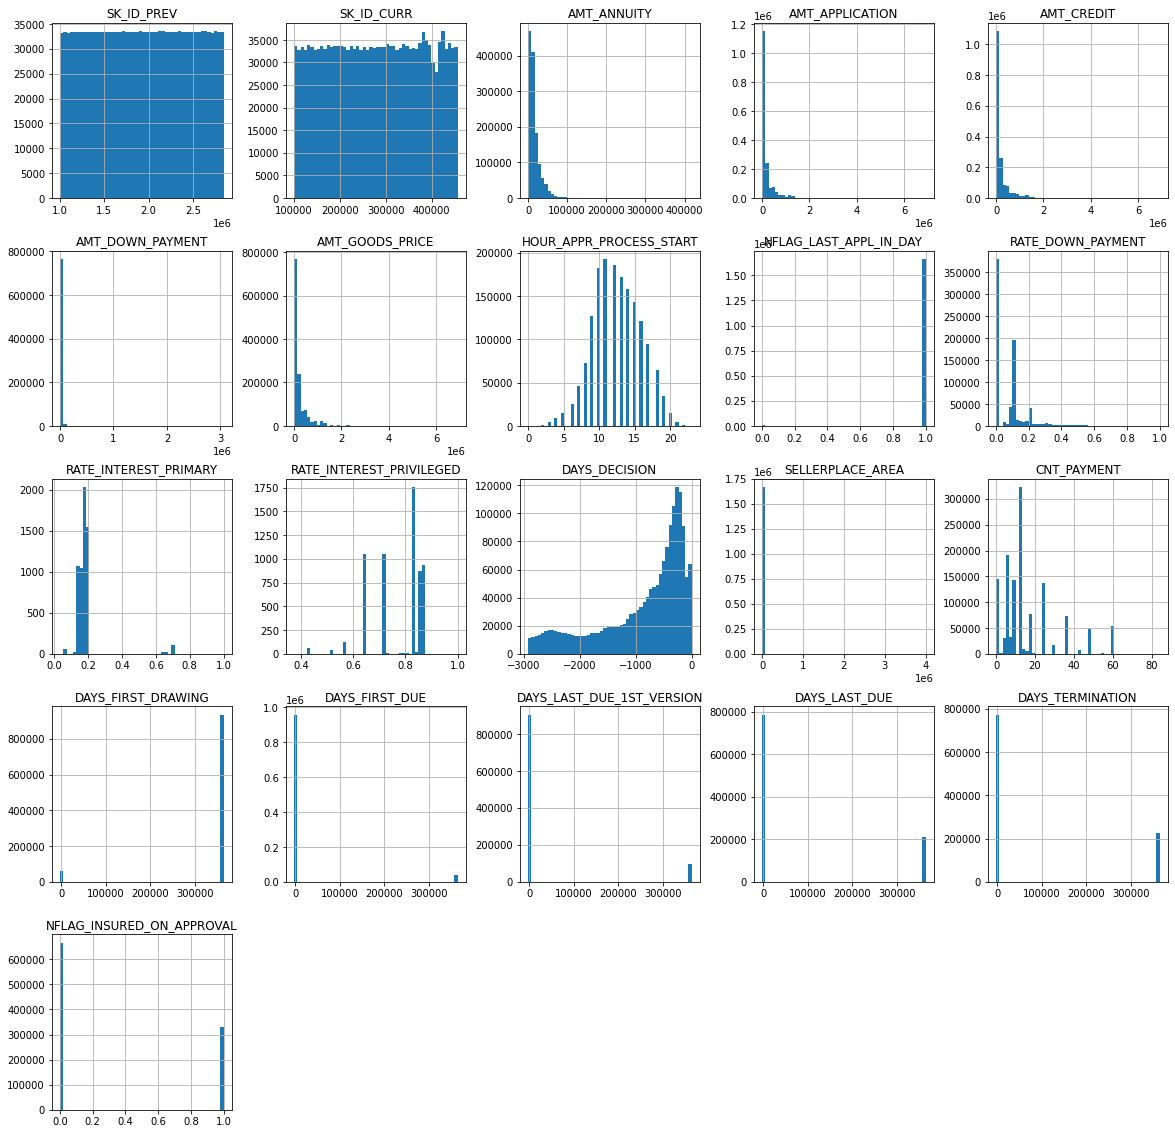

In [ ]:
%matplotlib inline
# plot distribution of each input variable
import matplotlib.pyplot as plt
datasets["previous_application"].hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
# missing data
datasets["previous_application"].isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

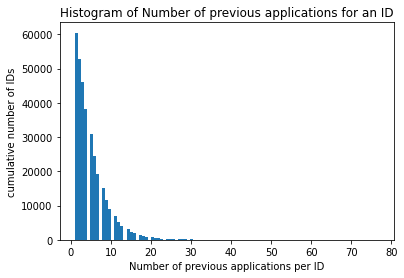

In [ ]:
sum(datasets["previous_application"]['SK_ID_CURR'].value_counts()==1)

plt.hist(datasets["previous_application"]['SK_ID_CURR'].value_counts(), cumulative=False, bins=100);
plt.grid
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')
plt.show()

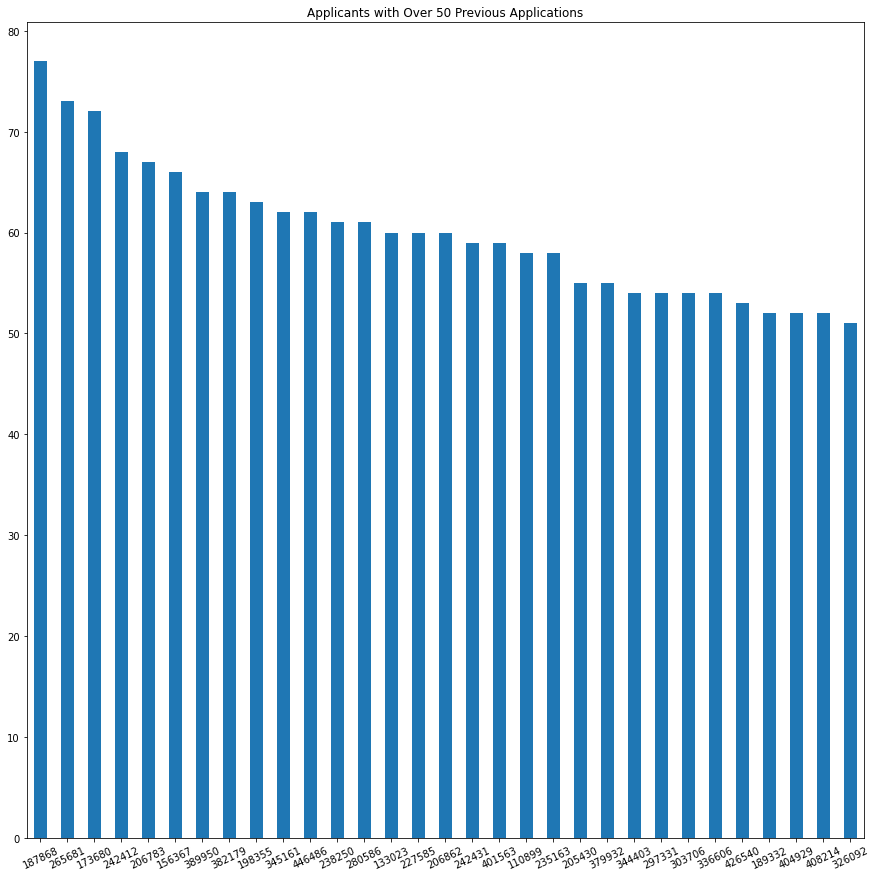

In [ ]:
prevAppCounts = datasets["previous_application"]['SK_ID_CURR'].value_counts(dropna=False)

prevAppCounts[prevAppCounts > 50].plot(kind='bar', figsize=(15, 15))
plt.xticks(rotation=25)
plt.title('Applicants with Over 50 Previous Applications')
plt.show()

In [ ]:
apps_all = datasets["previous_application"]['SK_ID_CURR'].nunique()
apps_5plus = datasets["previous_application"]['SK_ID_CURR'].value_counts()>=5
apps_40plus = datasets["previous_application"]['SK_ID_CURR'].value_counts()>=40
print('Percentage of applicants with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage of applicants with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


**POS Cash Balance Dataset EDA**

In [ ]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
datasets["POS_CASH_balance"].describe()

SK_ID_PREV    SK_ID_CURR  ...        SK_DPD    SK_DPD_DEF
count  1.000136e+07  1.000136e+07  ...  1.000136e+07  1.000136e+07
mean   1.903217e+06  2.784039e+05  ...  1.160693e+01  6.544684e-01
std    5.358465e+05  1.027637e+05  ...  1.327140e+02  3.276249e+01
min    1.000001e+06  1.000010e+05  ...  0.000000e+00  0.000000e+00
25%    1.434405e+06  1.895500e+05  ...  0.000000e+00  0.000000e+00
50%    1.896565e+06  2.786540e+05  ...  0.000000e+00  0.000000e+00
75%    2.368963e+06  3.674290e+05  ...  0.000000e+00  0.000000e+00
max    2.843499e+06  4.562550e+05  ...  4.231000e+03  3.595000e+03

[8 rows x 7 columns]

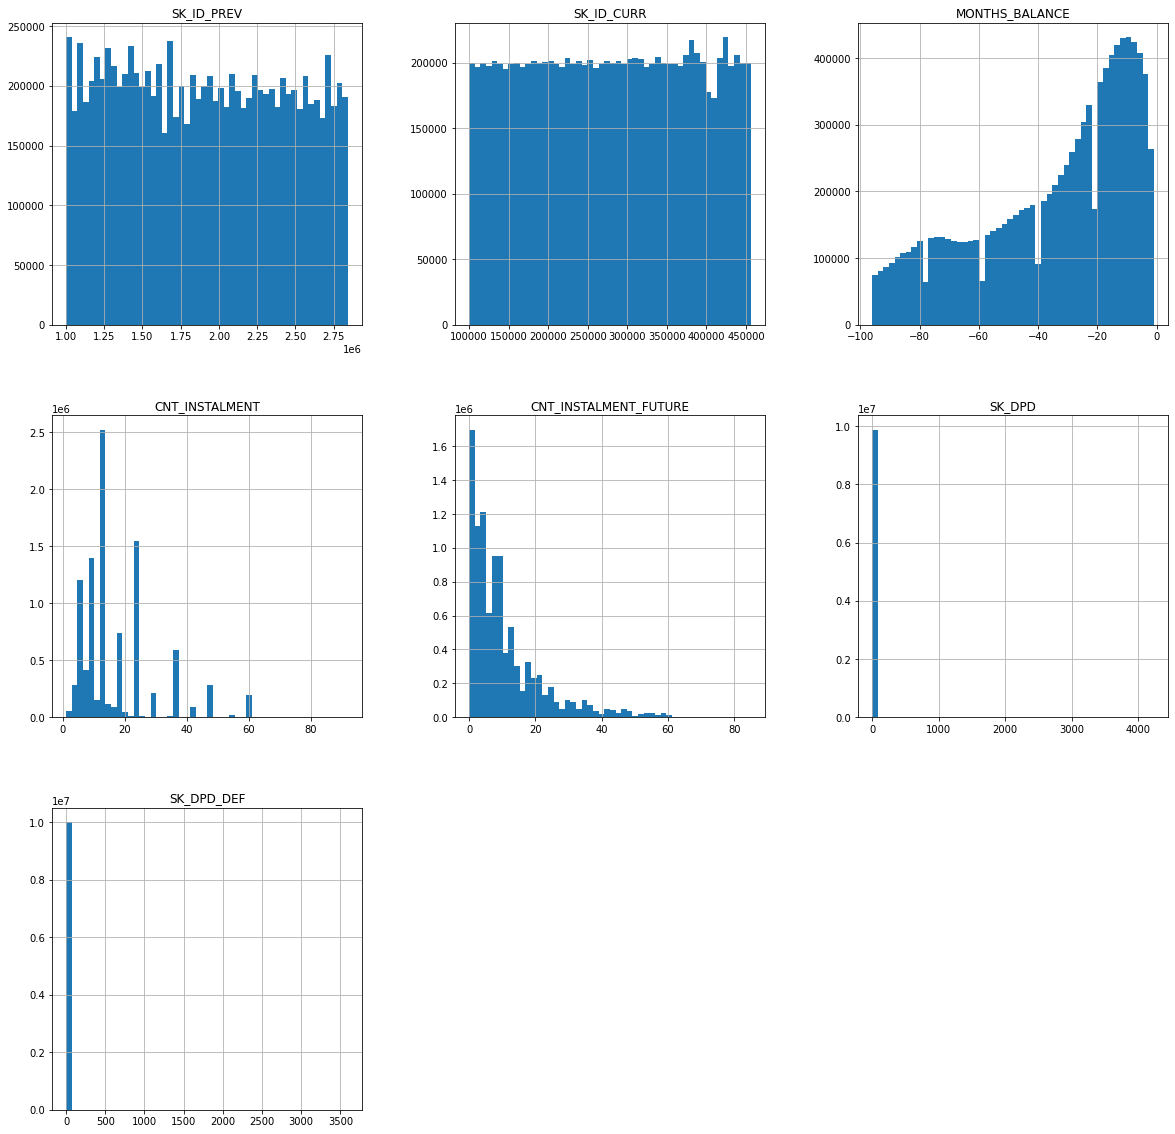

In [ ]:
%matplotlib inline
# plot distribution of each input variable
import matplotlib.pyplot as plt
datasets["POS_CASH_balance"].hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
# missing data
datasets["POS_CASH_balance"].isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

**Installments Payments Dataset EDA**

In [ ]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
datasets["installments_payments"].describe()

SK_ID_PREV    SK_ID_CURR  ...  AMT_INSTALMENT   AMT_PAYMENT
count  1.360540e+07  1.360540e+07  ...    1.360540e+07  1.360250e+07
mean   1.903365e+06  2.784449e+05  ...    1.705091e+04  1.723822e+04
std    5.362029e+05  1.027183e+05  ...    5.057025e+04  5.473578e+04
min    1.000001e+06  1.000010e+05  ...    0.000000e+00  0.000000e+00
25%    1.434191e+06  1.896390e+05  ...    4.226085e+03  3.398265e+03
50%    1.896520e+06  2.786850e+05  ...    8.884080e+03  8.125515e+03
75%    2.369094e+06  3.675300e+05  ...    1.671021e+04  1.610842e+04
max    2.843499e+06  4.562550e+05  ...    3.771488e+06  3.771488e+06

[8 rows x 8 columns]

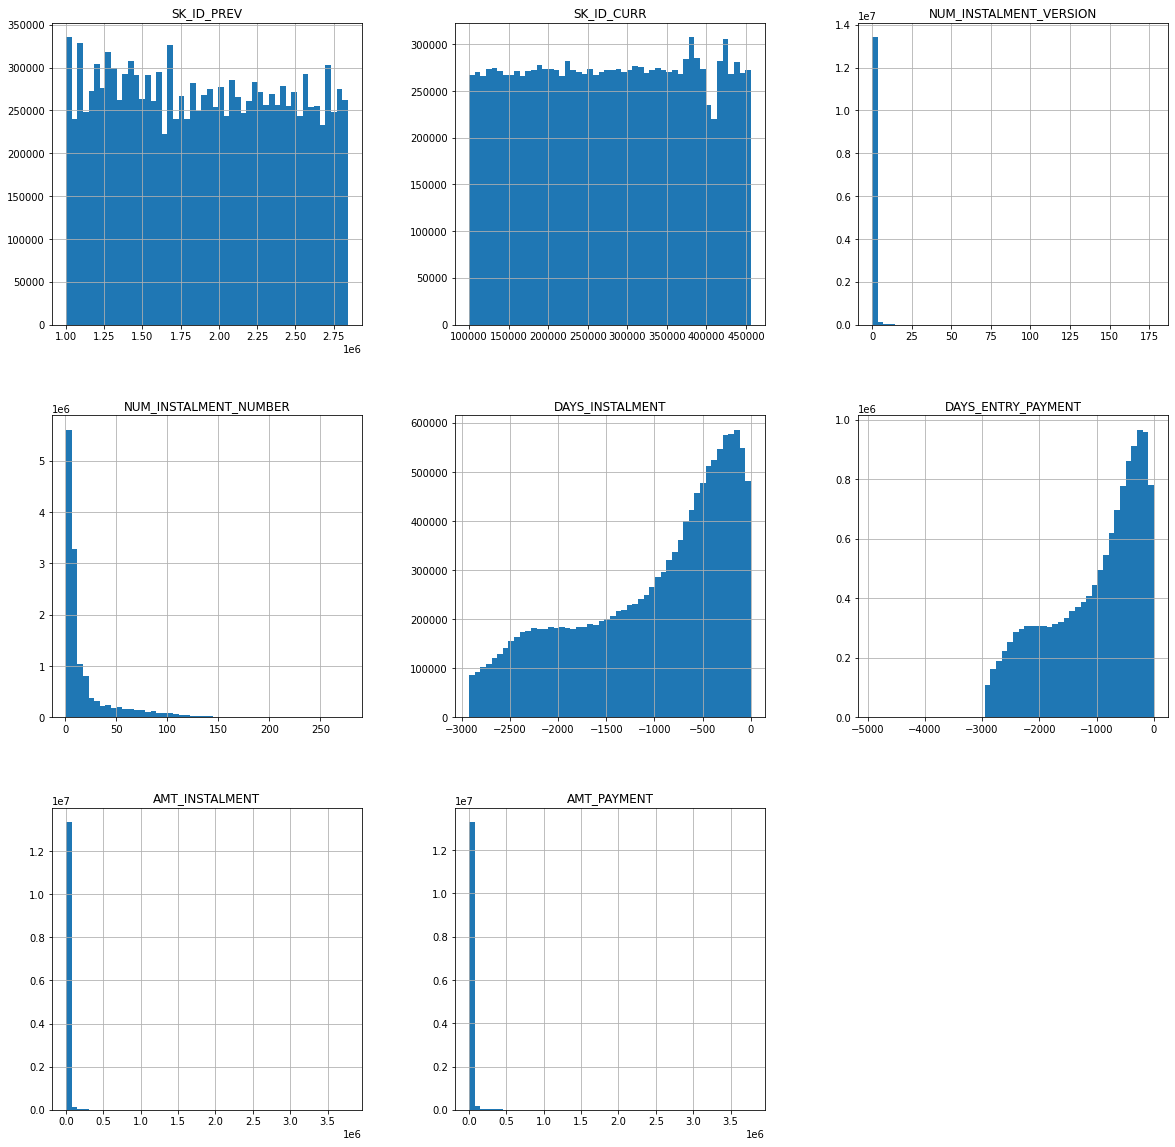

In [ ]:
%matplotlib inline
# plot distribution of each input variable
import matplotlib.pyplot as plt
datasets["installments_payments"].hist(bins=50, figsize=(20, 20))
plt.show()

**Credit Card Balance Dataset EDA**

In [ ]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
datasets["credit_card_balance"].describe()

SK_ID_PREV    SK_ID_CURR  ...        SK_DPD    SK_DPD_DEF
count  3.840312e+06  3.840312e+06  ...  3.840312e+06  3.840312e+06
mean   1.904504e+06  2.783242e+05  ...  9.283667e+00  3.316220e-01
std    5.364695e+05  1.027045e+05  ...  9.751570e+01  2.147923e+01
min    1.000018e+06  1.000060e+05  ...  0.000000e+00  0.000000e+00
25%    1.434385e+06  1.895170e+05  ...  0.000000e+00  0.000000e+00
50%    1.897122e+06  2.783960e+05  ...  0.000000e+00  0.000000e+00
75%    2.369328e+06  3.675800e+05  ...  0.000000e+00  0.000000e+00
max    2.843496e+06  4.562500e+05  ...  3.260000e+03  3.260000e+03

[8 rows x 22 columns]

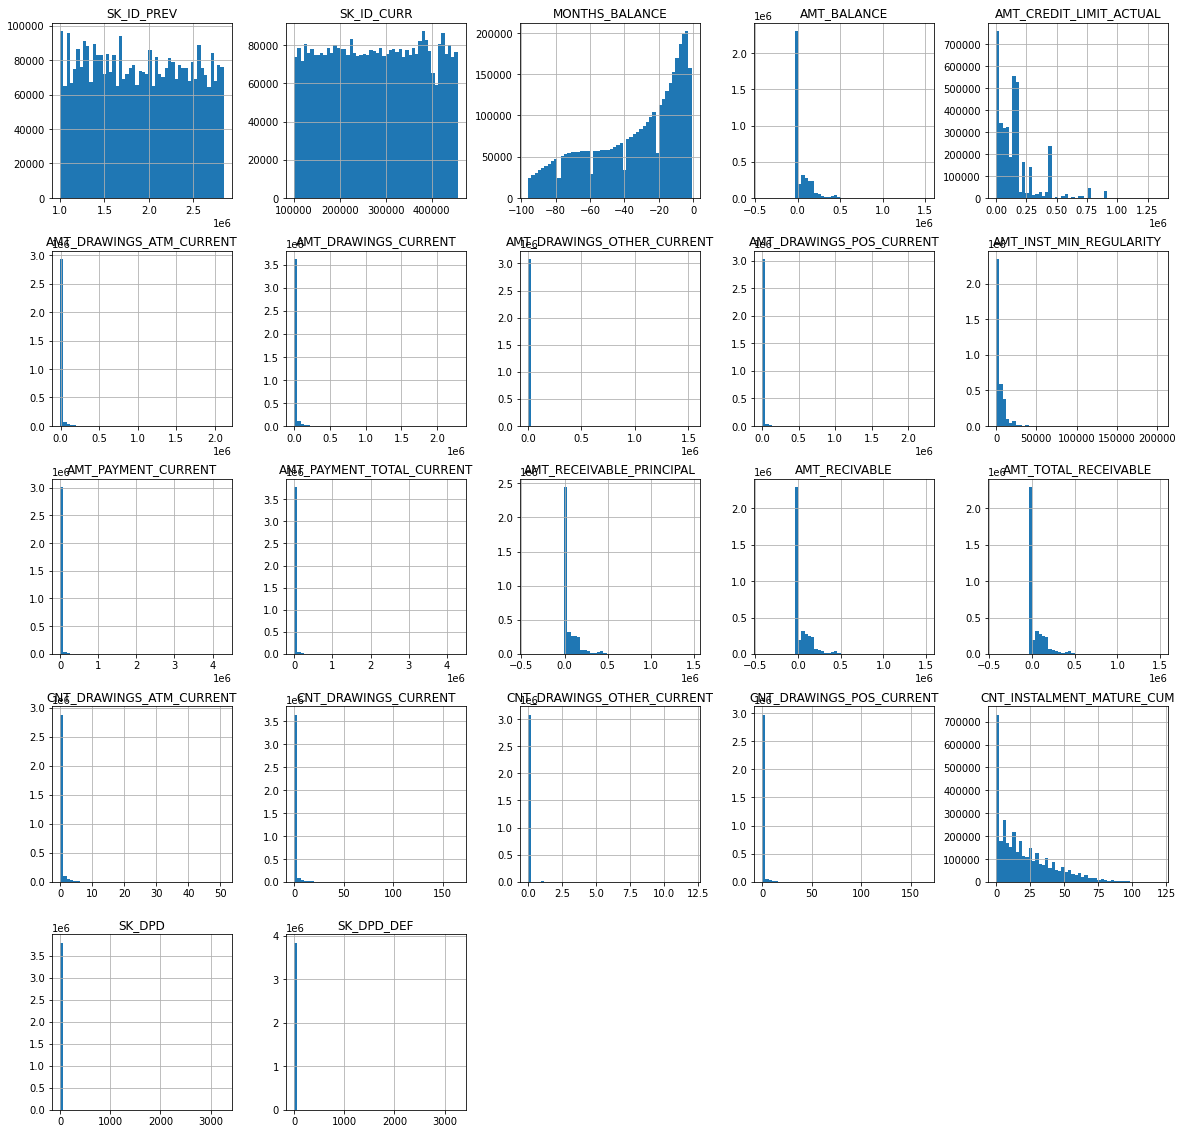

In [ ]:
%matplotlib inline
# plot distribution of each input variable
import matplotlib.pyplot as plt
datasets["credit_card_balance"].hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
# missing data
datasets["credit_card_balance"].isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

**Bureau Dataset EDA**

In [ ]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
datasets["bureau"].describe()

SK_ID_CURR  SK_ID_BUREAU  ...  DAYS_CREDIT_UPDATE   AMT_ANNUITY
count  1.716428e+06  1.716428e+06  ...        1.716428e+06  4.896370e+05
mean   2.782149e+05  5.924434e+06  ...       -5.937483e+02  1.571276e+04
std    1.029386e+05  5.322657e+05  ...        7.207473e+02  3.258269e+05
min    1.000010e+05  5.000000e+06  ...       -4.194700e+04  0.000000e+00
25%    1.888668e+05  5.463954e+06  ...       -9.080000e+02  0.000000e+00
50%    2.780550e+05  5.926304e+06  ...       -3.950000e+02  0.000000e+00
75%    3.674260e+05  6.385681e+06  ...       -3.300000e+01  1.350000e+04
max    4.562550e+05  6.843457e+06  ...        3.720000e+02  1.184534e+08

[8 rows x 14 columns]

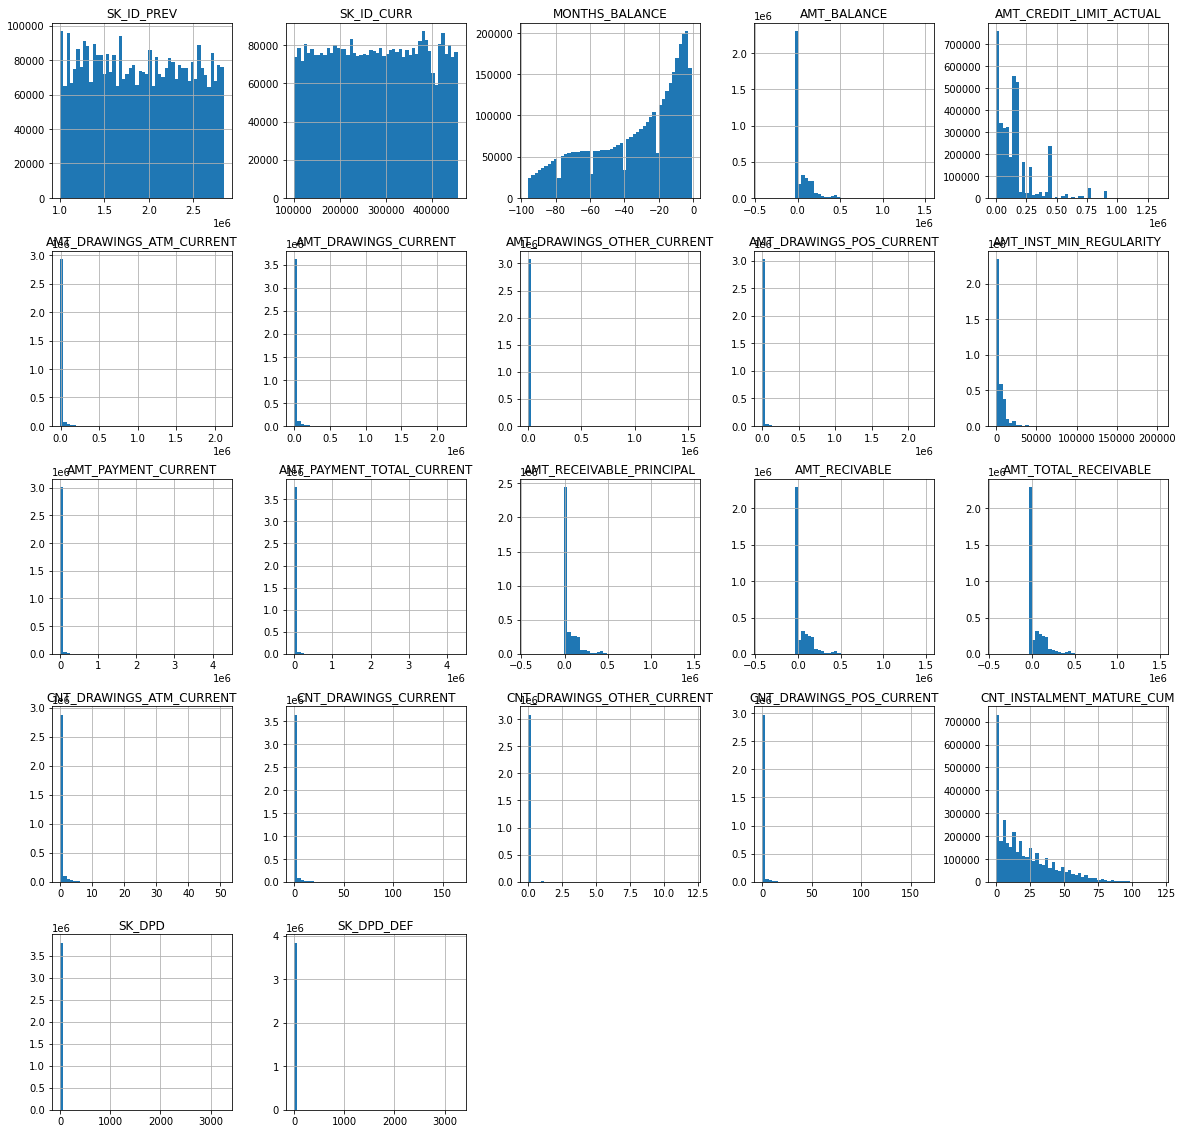

In [ ]:
%matplotlib inline
# distribution of input variables
import matplotlib.pyplot as plt
datasets["credit_card_balance"].hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
# missing data
datasets["bureau"].isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

**Bureau Balance Dataset EDA**

In [ ]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
datasets["bureau_balance"].describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

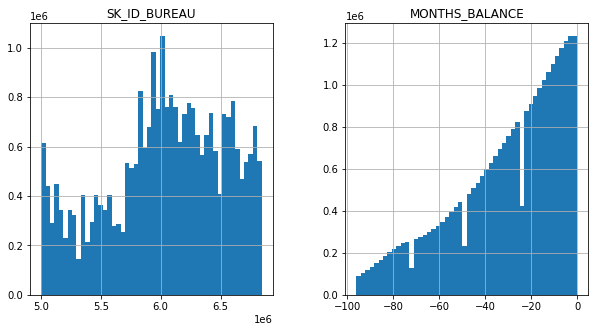

In [ ]:
%matplotlib inline
# distribution of input variables
import matplotlib.pyplot as plt
datasets["bureau_balance"].hist(bins=50, figsize=(10, 5))
plt.show()

In [ ]:
# missing data
datasets["bureau_balance"].isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# Feature Engineering and Transformers

**Previous Application Dataset Feature Engineering**

In [ ]:
appsDF = datasets["previous_application"]

In [ ]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']

print(f"{appsDF[features].describe()}")

agg_ops = ["min", "max", "mean"]

result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID

result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})

result.columns = result.columns.map('_'.join)
display(result)

result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']

print(f"result.shape: {result.shape}")

result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR_  AMT_ANNUITY_min  ...  AMT_APPLICATION_max  AMT_APPLICATION_mean
0            100001         3951.000  ...              24835.5             24835.500
1            100002         9251.775  ...             179055.0            179055.000
2            100003         6737.310  ...             900000.0            435436.500
3            100004         5357.250  ...              24282.0             24282.000
4            100005         4813.200  ...              44617.5             22308.750
...             ...              ...  ...                  ...                   ...
338852       456251         6605.910  ...              40455.0             40455.000
338853       456252        10074.465  ...              57595.5             57595.500
338854       456253         3973.095  ...              28912.5             24162.750
338855       456254         2296.440  ...             223789.5            121317.750
338856       456255         2250.000  ...            1170000.0            362770.875

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  ...  AMT_APPLICATION_mean  range_AMT_APPLICATION
0       100001         3951.000  ...          24835.500000                    0.0
1       100002         9251.775  ...         179055.000000                    0.0
2       100003         6737.310  ...         435436.500000               831190.5
3       100004         5357.250  ...          24282.000000                    0.0
4       100005         4813.200  ...          22308.750000                44617.5
5       100006         2482.920  ...         272203.260000               688500.0
6       100007         1834.290  ...         150530.250000               230323.5
7       100008         8019.090  ...         155701.800000               450000.0
8       100009         7435.845  ...          76741.714286                69705.0
9       100010        27463.410  ...         247212.000000                    0.0

[10 rows x 8 columns]

**Previous Application Dataset Feature Transformer**

In [ ]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_ops = ["min", "max", "mean"]


    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        agg_ops = ["min", "max", "mean"]
        result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
        result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
        result.columns = result.columns.map('_'.join)
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        result = result.rename(columns={"SK_ID_CURR_":"SK_ID_CURR"})
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  ...  AMT_APPLICATION_mean  range_AMT_APPLICATION
0      100001         3951.000  ...          24835.500000                    0.0
1      100002         9251.775  ...         179055.000000                    0.0
2      100003         6737.310  ...         435436.500000               831190.5
3      100004         5357.250  ...          24282.000000                    0.0
4      100005         4813.200  ...          22308.750000                44617.5
5      100006         2482.920  ...         272203.260000               688500.0
6      100007         1834.290  ...         150530.250000               230323.5
7      100008         8019.090  ...         155701.800000            

In [ ]:
x = prevAppsFeaturesAggregater()
x.transform(appsDF)

SK_ID_CURR  ...  range_AMT_APPLICATION
0           100001  ...                    0.0
1           100002  ...                    0.0
2           100003  ...               831190.5
3           100004  ...                    0.0
4           100005  ...                44617.5
...            ...  ...                    ...
338852      456251  ...                    0.0
338853      456252  ...                    0.0
338854      456253  ...                 9499.5
338855      456254  ...               204943.5
338856      456255  ...              1125000.0

[338857 rows x 8 columns]

**Transformed Previous Application Dataset EDA**

In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SK_ID_CURR             338857 non-null  int64  
 1   AMT_ANNUITY_min        338377 non-null  float64
 2   AMT_ANNUITY_max        338377 non-null  float64
 3   AMT_ANNUITY_mean       338377 non-null  float64
 4   AMT_APPLICATION_min    338857 non-null  float64
 5   AMT_APPLICATION_max    338857 non-null  float64
 6   AMT_APPLICATION_mean   338857 non-null  float64
 7   range_AMT_APPLICATION  338857 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 20.7 MB


In [ ]:
res.describe()

SK_ID_CURR  ...  range_AMT_APPLICATION
count  338857.000000  ...           3.388570e+05
mean   278149.909581  ...           3.334923e+05
std    102879.193103  ...           4.319465e+05
min    100001.000000  ...           0.000000e+00
25%    189061.000000  ...           3.282300e+04
50%    278221.000000  ...           1.575000e+05
75%    367302.000000  ...           4.500000e+05
max    456255.000000  ...           6.905160e+06

[8 rows x 8 columns]

In [ ]:
res.isna().sum()

SK_ID_CURR                 0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

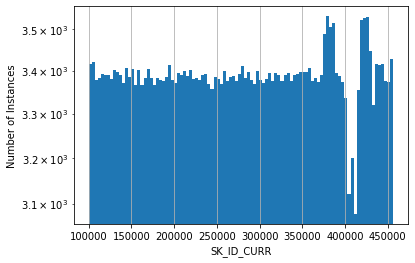

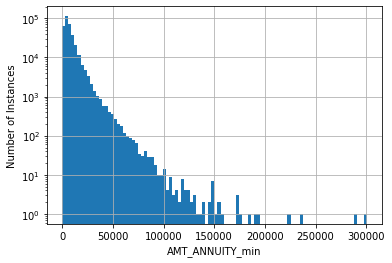

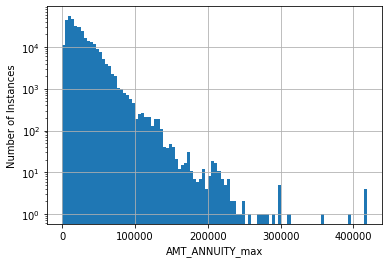

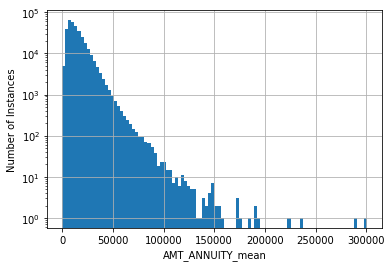

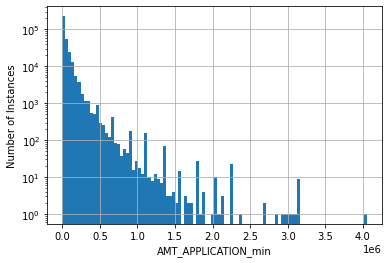

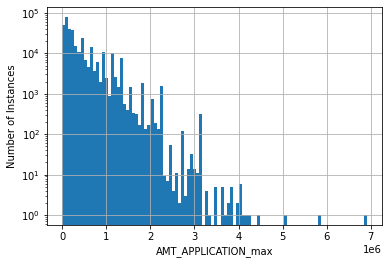

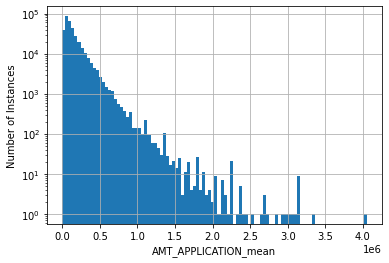

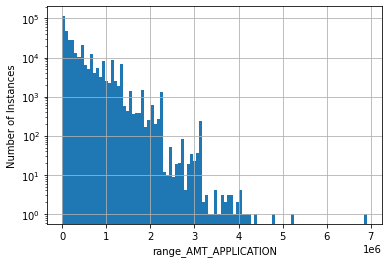

In [ ]:
for column in res:
    plt.hist(res[column], bins=100)
    plt.grid()
    plt.ylabel('Number of Instances')
    plt.xlabel(column)
    plt.yscale('log')
    plt.show()

In [ ]:
# correlations with the target column
res_merged = res.merge(app_train_results, how='left', on='SK_ID_CURR')
print(res_merged.corr()['TARGET'].sort_values())

EXT_SOURCE_3                  -0.177877
EXT_SOURCE_2                  -0.159960
EXT_SOURCE_1                  -0.155905
DAYS_EMPLOYED                 -0.046613
FLOORSMAX_AVG                 -0.041935
                                 ...   
REGION_RATING_CLIENT_W_CITY    0.060536
DAYS_LAST_PHONE_CHANGE         0.061018
DAYS_BIRTH                     0.080719
TARGET                         1.000000
FLAG_MOBIL                          NaN
Name: TARGET, Length: 113, dtype: float64


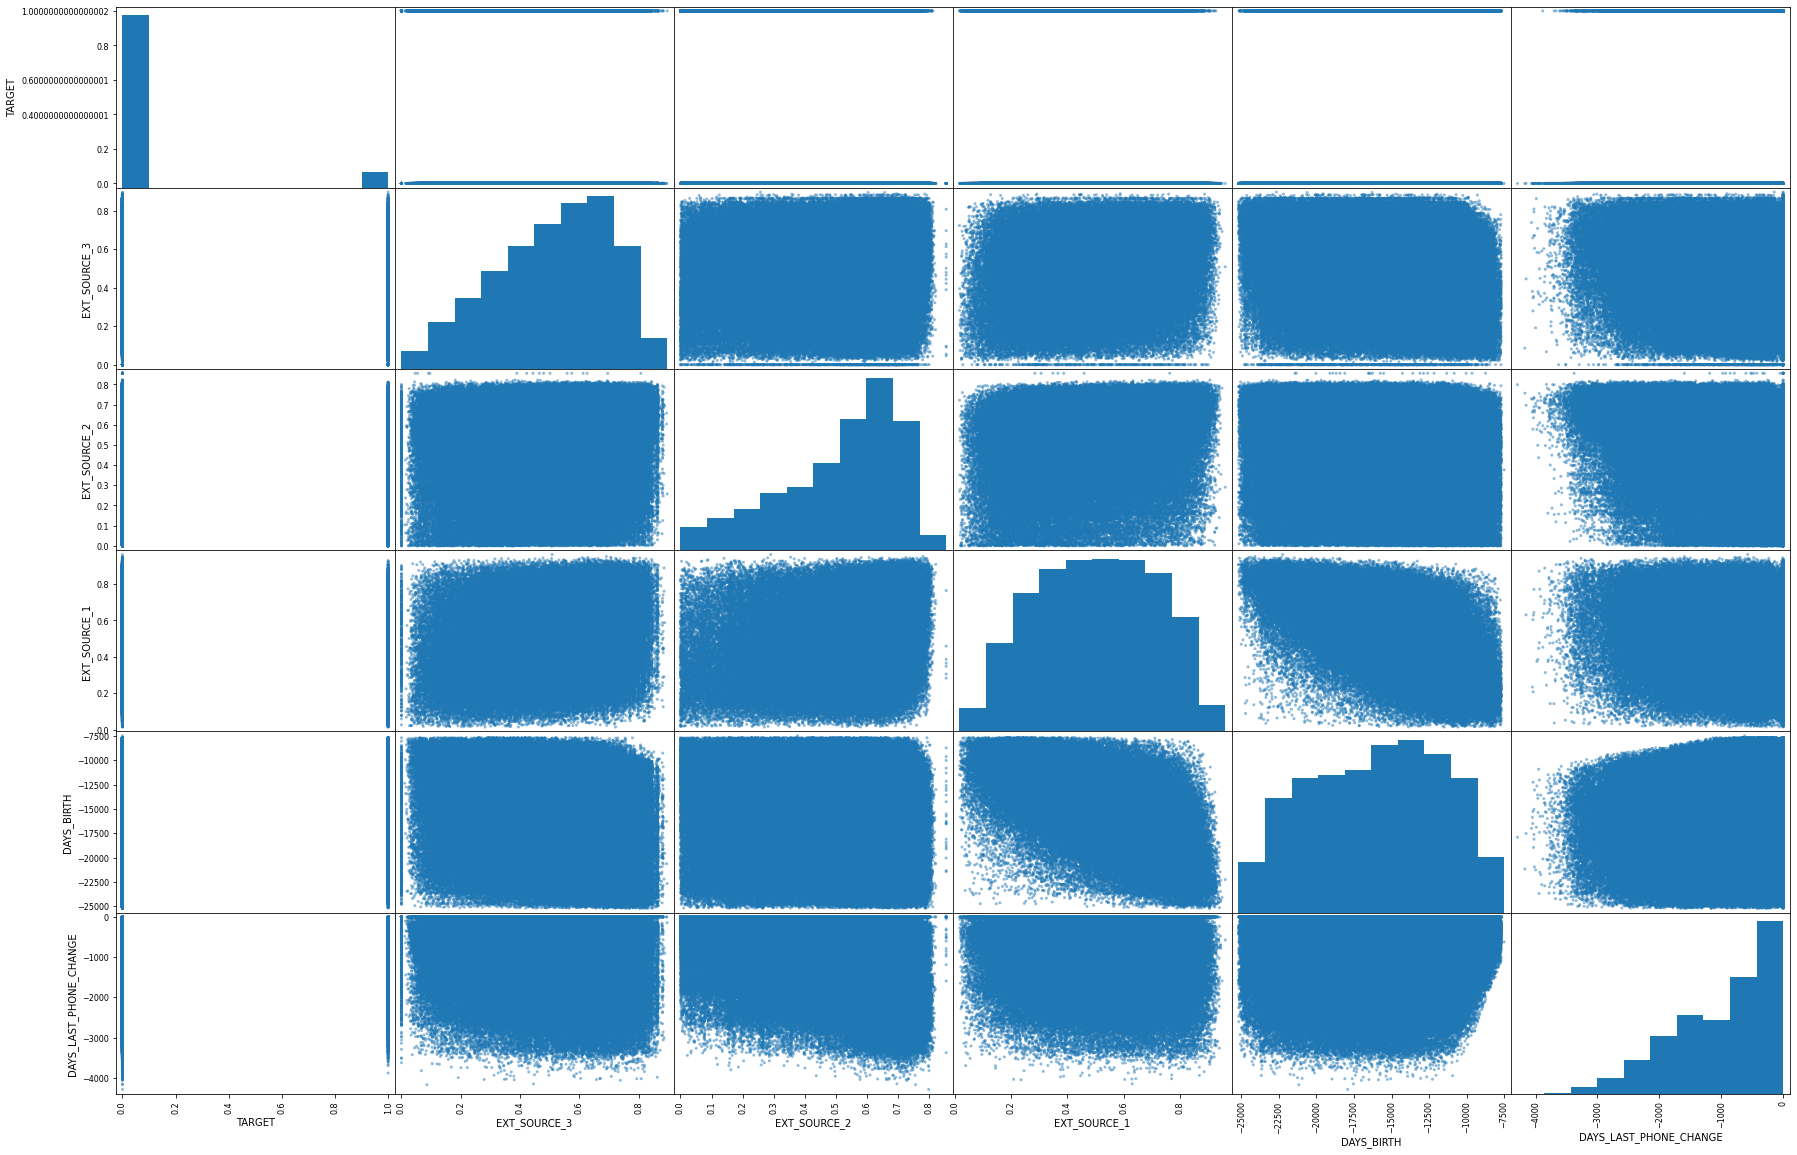

In [ ]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with TARGET
attributes = ["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH", "DAYS_LAST_PHONE_CHANGE"]
scatter_matrix(res_merged[attributes], figsize=(30, 20));

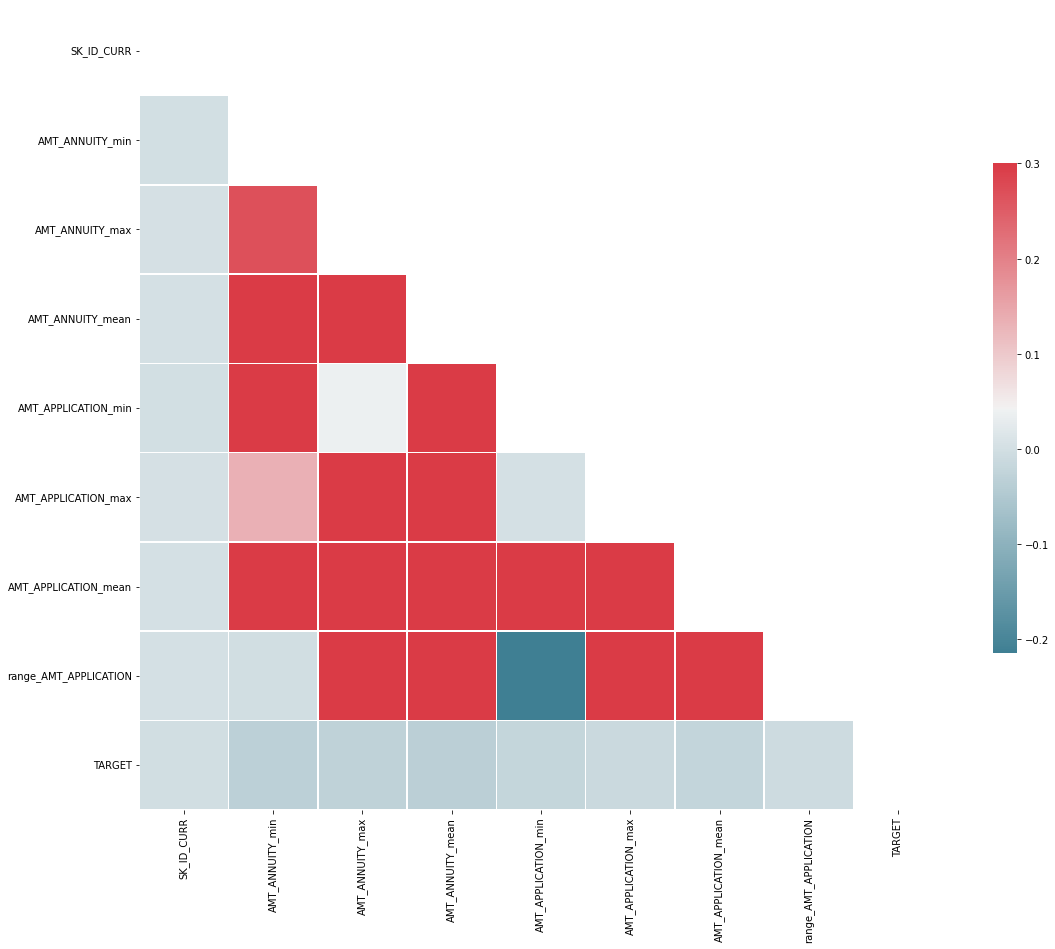

In [ ]:
# compute the correlation matrix
corr = res_merged.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

**POS Cash Balance Dataset Feature Engineering**

In [ ]:
posh_cash = pd.DataFrame(datasets["POS_CASH_balance"])
"""columns ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF']"""


"columns ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',\n       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',\n       'SK_DPD_DEF']"

In [ ]:
# feature engineering POSH_Cash


#group all previous loan data
previous_aggregated = posh_cash.groupby("SK_ID_PREV", as_index=False).first()

#clear all other data
cleared_table = previous_aggregated.drop(columns=['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'])
#count all instances of loans for SK_ID_CURR
total_previous_loans = cleared_table.groupby("SK_ID_CURR",as_index=False).count()


current_aggregated = posh_cash.groupby("SK_ID_CURR",as_index=False).agg("mean")

drop = current_aggregated.drop(columns=['MONTHS_BALANCE','CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE',"SK_ID_PREV"])

posh_cash_final = total_previous_loans.merge(drop, how='left', on='SK_ID_CURR')

posh_cash_final = posh_cash_final.rename(columns={"SK_ID_PREV":"Previous_Loans_HC"})

print(posh_cash_final)

x = posh_cash_final.merge(app_train_results, how='left', on='SK_ID_CURR')

print(x.corr()['TARGET'].sort_values())

        SK_ID_CURR  Previous_Loans_HC    SK_DPD  SK_DPD_DEF
0           100001                  2  0.777778    0.777778
1           100002                  1  0.000000    0.000000
2           100003                  3  0.000000    0.000000
3           100004                  1  0.000000    0.000000
4           100005                  1  0.000000    0.000000
...            ...                ...       ...         ...
337247      456251                  1  0.000000    0.000000
337248      456252                  1  0.000000    0.000000
337249      456253                  3  0.294118    0.294118
337250      456254                  2  0.000000    0.000000
337251      456255                  6  0.070423    0.070423

[337252 rows x 4 columns]
Previous_Loans_HC   -0.040507
SK_ID_CURR          -0.002137
SK_DPD               0.005436
SK_DPD_DEF           0.006496
TARGET               1.000000
Name: TARGET, dtype: float64


**POS Cash Balance Dataset Feature Transformer**

In [ ]:
class POSH_CASH_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features


    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y = None):
        #feature engineering POSH_Cash
        
        posh_cash = pd.DataFrame(X)
        #group all previous loan data
        previous_aggregated = posh_cash.groupby("SK_ID_PREV", as_index=False).first()

        #clear all other data
        cleared_table = previous_aggregated.drop(columns=['MONTHS_BALANCE', 'CNT_INSTALMENT',
              'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
              'SK_DPD_DEF'])
        #count all instances of loans for SK_ID_CURR
        total_previous_loans = cleared_table.groupby("SK_ID_CURR",as_index=False).count()

        #find mean late payments for each ID
        current_aggregated_mean = posh_cash.groupby("SK_ID_CURR",as_index=False).agg("mean")

        #drop columns of no interest
        current_aggregated_mean  = current_aggregated.drop(columns=['MONTHS_BALANCE','CNT_INSTALMENT',
              'CNT_INSTALMENT_FUTURE', "SK_ID_PREV"])

        posh_cash_final = total_previous_loans.merge(current_aggregated_mean, how='left', on='SK_ID_CURR')

        posh_cash_final = posh_cash_final.rename(columns={"SK_ID_PREV":"Previous_Loans_HC"})

        return posh_cash_final

In [ ]:
x = POSH_CASH_Transformer()
x.transform(posh_cash)

SK_ID_CURR  Previous_Loans_HC    SK_DPD  SK_DPD_DEF
0           100001                  2  0.777778    0.777778
1           100002                  1  0.000000    0.000000
2           100003                  3  0.000000    0.000000
3           100004                  1  0.000000    0.000000
4           100005                  1  0.000000    0.000000
...            ...                ...       ...         ...
337247      456251                  1  0.000000    0.000000
337248      456252                  1  0.000000    0.000000
337249      456253                  3  0.294118    0.294118
337250      456254                  2  0.000000    0.000000
337251      456255                  6  0.070423    0.070423

[337252 rows x 4 columns]

**Transformed POS Cash Balance Dataset EDA**

In [ ]:
posh_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
posh_cash.describe()

SK_ID_PREV    SK_ID_CURR  ...        SK_DPD    SK_DPD_DEF
count  1.000136e+07  1.000136e+07  ...  1.000136e+07  1.000136e+07
mean   1.903217e+06  2.784039e+05  ...  1.160693e+01  6.544684e-01
std    5.358465e+05  1.027637e+05  ...  1.327140e+02  3.276249e+01
min    1.000001e+06  1.000010e+05  ...  0.000000e+00  0.000000e+00
25%    1.434405e+06  1.895500e+05  ...  0.000000e+00  0.000000e+00
50%    1.896565e+06  2.786540e+05  ...  0.000000e+00  0.000000e+00
75%    2.368963e+06  3.674290e+05  ...  0.000000e+00  0.000000e+00
max    2.843499e+06  4.562550e+05  ...  4.231000e+03  3.595000e+03

[8 rows x 7 columns]

In [ ]:
posh_cash.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

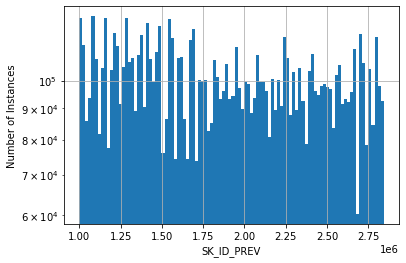

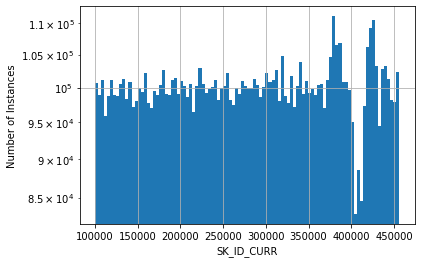

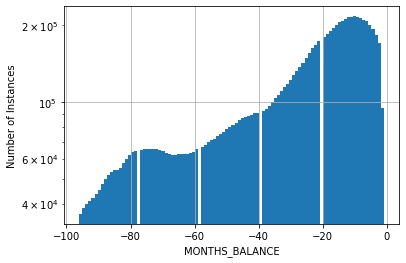

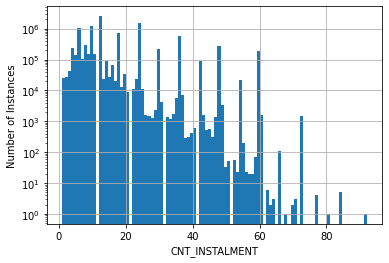

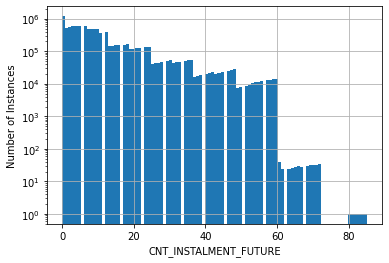

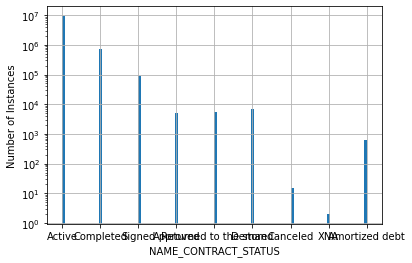

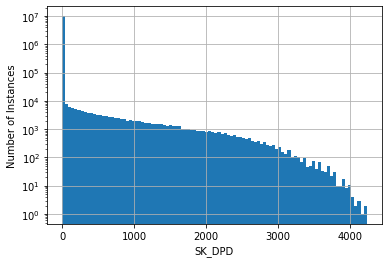

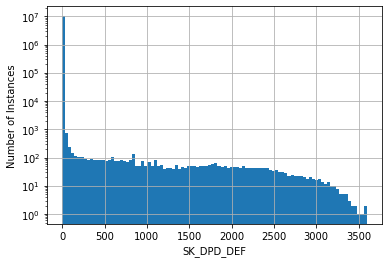

In [ ]:
for column in posh_cash:
    plt.hist(posh_cash[column], bins=100)
    plt.grid()
    plt.ylabel('Number of Instances')
    plt.xlabel(column)
    plt.yscale('log')
    plt.show()

In [ ]:
# correlations with the target column
posh_cash_merged = posh_cash.merge(app_train_results, how='left', on='SK_ID_CURR')
print(posh_cash_merged.corr()['TARGET'].sort_values())

SK_ID_CURR              -0.002245
SK_ID_PREV              -0.000056
SK_DPD_DEF               0.008594
SK_DPD                   0.009866
CNT_INSTALMENT           0.018506
MONTHS_BALANCE           0.020147
CNT_INSTALMENT_FUTURE    0.021972
TARGET                   1.000000
Name: TARGET, dtype: float64


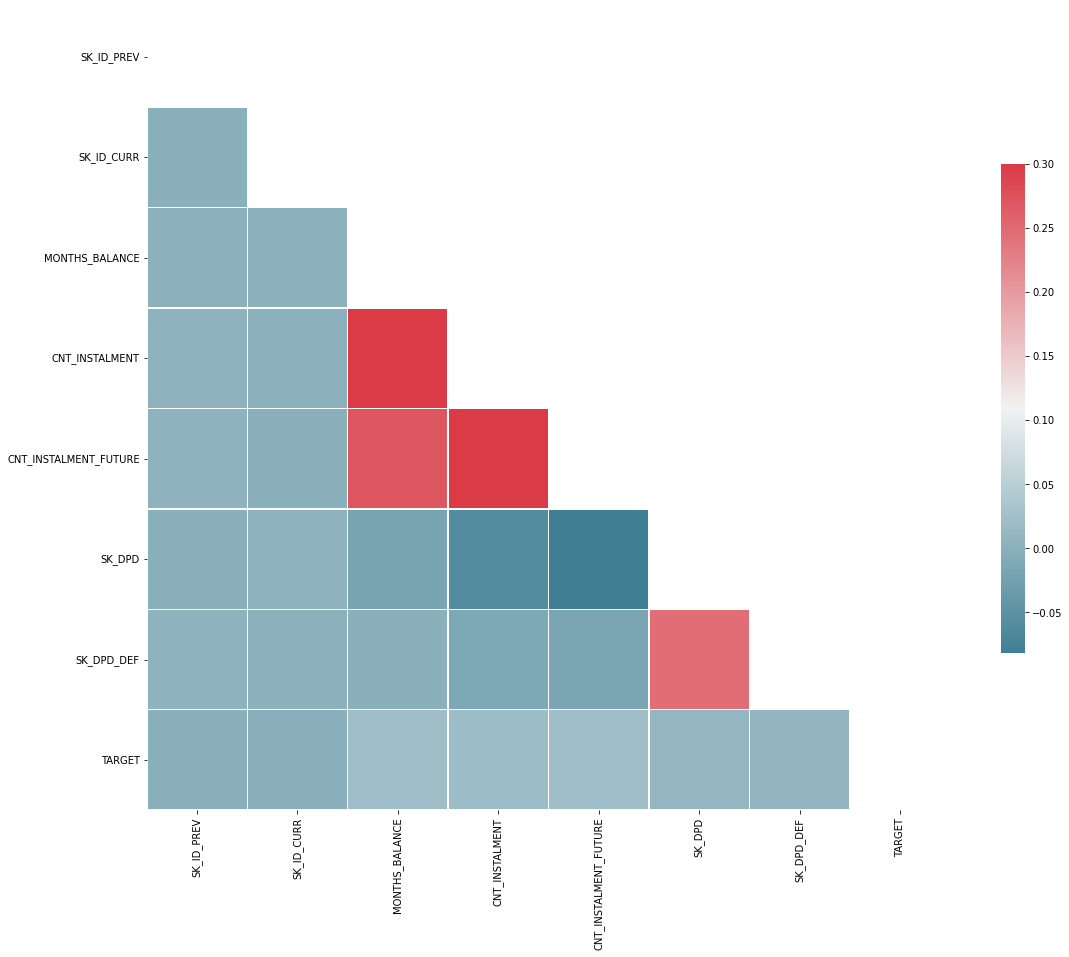

In [ ]:
# compute the correlation matrix
corr = posh_cash_merged.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

**Installments Payments Dataset Feature Engineering**

In [ ]:
# define and sort initial dataset
loansDF = datasets['installments_payments'].sort_values(['SK_ID_CURR'])
print('loansDF:')
display(loansDF.head(10))

loansDF:


SK_ID_PREV  SK_ID_CURR  ...  AMT_INSTALMENT  AMT_PAYMENT
3458712     1369693      100001  ...        3951.000     3951.000
3435373     1851984      100001  ...        3980.925     3980.925
2624024     1369693      100001  ...       17397.900    17397.900
1761012     1851984      100001  ...        3982.050     3982.050
3774071     1851984      100001  ...        3982.050     3982.050
1478621     1369693      100001  ...        3951.000     3951.000
2568722     1369693      100001  ...        3951.000     3951.000
2163032     1038818      100002  ...        9251.775     9251.775
504426      1038818      100002  ...        9251.775     9251.775
699804      1038818      100002  ...        9251.775     9251.775

[10 rows x 8 columns]

In [ ]:
# clear unneeded data
loansdf = loansDF.drop(columns=['SK_ID_PREV', 'NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER'])
print('loansdf:')
display(loansdf.head(10))

loansdf:


SK_ID_CURR  DAYS_INSTALMENT  ...  AMT_INSTALMENT  AMT_PAYMENT
3458712      100001          -1649.0  ...        3951.000     3951.000
3435373      100001          -2856.0  ...        3980.925     3980.925
2624024      100001          -1619.0  ...       17397.900    17397.900
1761012      100001          -2916.0  ...        3982.050     3982.050
3774071      100001          -2886.0  ...        3982.050     3982.050
1478621      100001          -1709.0  ...        3951.000     3951.000
2568722      100001          -1679.0  ...        3951.000     3951.000
2163032      100002           -535.0  ...        9251.775     9251.775
504426       100002           -235.0  ...        9251.775     9251.775
699804       100002           -205.0  ...        9251.775     9251.775

[10 rows x 5 columns]

In [ ]:
# impute payment_records df to remove rows with missing data
payment_records = loansdf.dropna()
sum_missing_payment_records = payment_records.isna().sum().sort_values(ascending=False)
sum_missing_payment_records.head(20)

SK_ID_CURR            0
DAYS_INSTALMENT       0
DAYS_ENTRY_PAYMENT    0
AMT_INSTALMENT        0
AMT_PAYMENT           0
dtype: int64

In [ ]:
# create new feature: LOAN REPAID                   
payment_records.loc[payment_records['AMT_INSTALMENT'] == payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'True'
payment_records.loc[payment_records['AMT_INSTALMENT'] != payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'False'

print('payment records with paid loans:')
display(payment_records.head(10))

payment records with paid loans:


SK_ID_CURR  DAYS_INSTALMENT  ...  AMT_PAYMENT  LOAN_REPAID
3458712      100001          -1649.0  ...     3951.000         True
3435373      100001          -2856.0  ...     3980.925         True
2624024      100001          -1619.0  ...    17397.900         True
1761012      100001          -2916.0  ...     3982.050         True
3774071      100001          -2886.0  ...     3982.050         True
1478621      100001          -1709.0  ...     3951.000         True
2568722      100001          -1679.0  ...     3951.000         True
2163032      100002           -535.0  ...     9251.775         True
504426       100002           -235.0  ...     9251.775         True
699804       100002           -205.0  ...     9251.775         True

[10 rows x 6 columns]

In [ ]:
# create new feature: TIMELY PAYMENT
payment_records.loc[payment_records['DAYS_INSTALMENT'] >= payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'True'
payment_records.loc[payment_records['DAYS_INSTALMENT'] < payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'False'

print('payment records with paid loans and ontime payments:')
display(payment_records.head(10))

payment records with paid loans and ontime payments:


SK_ID_CURR  DAYS_INSTALMENT  ...  LOAN_REPAID  PAYMENT_ONTIME
3458712      100001          -1649.0  ...         True            True
3435373      100001          -2856.0  ...         True            True
2624024      100001          -1619.0  ...         True            True
1761012      100001          -2916.0  ...         True            True
3774071      100001          -2886.0  ...         True           False
1478621      100001          -1709.0  ...         True            True
2568722      100001          -1679.0  ...         True            True
2163032      100002           -535.0  ...         True            True
504426       100002           -235.0  ...         True            True
699804       100002           -205.0  ...         True            True

[10 rows x 7 columns]

In [ ]:
paid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='True').sum()).reset_index(name='REPAID_LOANS')
print('total paid loans:')
display(paid_loans.head(10))

total paid loans:


SK_ID_CURR  REPAID_LOANS
0      100001             7
1      100002            19
2      100003            25
3      100004             3
4      100005             9
5      100006            16
6      100007            60
7      100008            33
8      100009            51
9      100010            10

In [ ]:
unpaid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='False').sum()).reset_index(name='DEFAULTED_LOANS')
print('total unpaid loans:')
display(unpaid_loans.head(10))

total unpaid loans:


SK_ID_CURR  DEFAULTED_LOANS
0      100001                0
1      100002                0
2      100003                0
3      100004                0
4      100005                0
5      100006                0
6      100007                6
7      100008                2
8      100009                0
9      100010                0

In [ ]:
late_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='False').sum()).reset_index(name='LATE_PAYMENTS')
print('total late payments:')
display(late_payments.head(10))

total late payments:


SK_ID_CURR  LATE_PAYMENTS
0      100001              1
1      100002              0
2      100003              0
3      100004              0
4      100005              1
5      100006              0
6      100007             16
7      100008              1
8      100009              1
9      100010              0

In [ ]:
ontime_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='True').sum()).reset_index(name='ONTIME_PAYMENTS')
print('total on time payments:')
display(ontime_payments.head(10))

total on time payments:


SK_ID_CURR  ONTIME_PAYMENTS
0      100001                6
1      100002               19
2      100003               25
3      100004                3
4      100005                8
5      100006               16
6      100007               50
7      100008               34
8      100009               50
9      100010               10

In [ ]:
payment_count = loansDF.groupby(['SK_ID_CURR']).count()
payment_count = payment_count.drop(columns=['DAYS_INSTALMENT', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
                                           'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'])
payment_count = payment_count.rename(columns={'SK_ID_PREV':'NUMBER_OF_RECORDS'})
print('payment count:')
display(payment_count.head(10))

payment count:


NUMBER_OF_RECORDS
SK_ID_CURR                   
100001                      7
100002                     19
100003                     25
100004                      3
100005                      9
100006                     16
100007                     66
100008                     35
100009                     51
100010                     10

In [ ]:
# combine payment and loan history
loan_history = paid_loans.merge(unpaid_loans, how='left', on='SK_ID_CURR')
loan_history = late_payments.merge(loan_history, how='left', on='SK_ID_CURR')
loan_history = ontime_payments.merge(loan_history, how='left', on='SK_ID_CURR')
loan_history = payment_count.merge(loan_history, how='left', on='SK_ID_CURR')
print('loan history:')
display(loan_history.head(10))

loan history:


SK_ID_CURR  NUMBER_OF_RECORDS  ...  REPAID_LOANS  DEFAULTED_LOANS
0      100001                  7  ...           7.0              0.0
1      100002                 19  ...          19.0              0.0
2      100003                 25  ...          25.0              0.0
3      100004                  3  ...           3.0              0.0
4      100005                  9  ...           9.0              0.0
5      100006                 16  ...          16.0              0.0
6      100007                 66  ...          60.0              6.0
7      100008                 35  ...          33.0              2.0
8      100009                 51  ...          51.0              0.0
9      100010                 10  ...          10.0              0.0

[10 rows x 6 columns]

**Installments Payments Dataset Feature Transformer**

In [ ]:
class loansDF_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features


    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # payment records
        #loansDF = datasets['installments_payments']
        payment_records = loansDF.drop(columns=['SK_ID_PREV', 'NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER'])

        # create new feature: LOAN REPAID                   
        payment_records.loc[payment_records['AMT_INSTALMENT'] == payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'True'
        payment_records.loc[payment_records['AMT_INSTALMENT'] != payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'False'

        # create new feature: ONTIME PAYMENT
        payment_records.loc[payment_records['DAYS_INSTALMENT'] >= payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'True'
        payment_records.loc[payment_records['DAYS_INSTALMENT'] < payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'False'

        # create attributes for new loan history dataframe
        paid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='True').sum()).reset_index(name='REPAID_LOANS')
        unpaid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='False').sum()).reset_index(name='DEFAULTED_LOANS')           
        late_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='False').sum()).reset_index(name='LATE_PAYMENTS')
        ontime_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='True').sum()).reset_index(name='ONTIME_PAYMENTS')

        # count total number of payment records per user
        payment_count = loansDF.groupby(['SK_ID_CURR']).count()
        payment_count = payment_count.drop(columns=['DAYS_INSTALMENT', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
                                           'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'])
        payment_count = payment_count.rename(columns={'SK_ID_PREV':'NUMBER_OF_RECORDS'})

        # create new loan history dataframe
        loan_history = paid_loans.merge(unpaid_loans, how='left', on='SK_ID_CURR')
        loan_history = late_payments.merge(loan_history, how='left', on='SK_ID_CURR')
        loan_history = ontime_payments.merge(loan_history, how='left', on='SK_ID_CURR')
        loan_history = payment_count.merge(loan_history, how='left', on='SK_ID_CURR')

        return loan_history 

In [ ]:
x = loansDF_Transformer()
x.transform(loansDF)

SK_ID_CURR  NUMBER_OF_RECORDS  ...  REPAID_LOANS  DEFAULTED_LOANS
0           100001                  7  ...             7                0
1           100002                 19  ...            19                0
2           100003                 25  ...            25                0
3           100004                  3  ...             3                0
4           100005                  9  ...             9                0
...            ...                ...  ...           ...              ...
339582      456251                  7  ...             7                0
339583      456252                  6  ...             6                0
339584      456253                 14  ...            12                2
339585      456254                 19  ...            19                0
339586      456255                 74  ...            54               20

[339587 rows x 6 columns]

**Transformed Installments Payments Dataset EDA**

In [ ]:
loan_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339587 entries, 0 to 339586
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SK_ID_CURR         339587 non-null  int64  
 1   NUMBER_OF_RECORDS  339587 non-null  int64  
 2   ONTIME_PAYMENTS    339578 non-null  float64
 3   LATE_PAYMENTS      339578 non-null  float64
 4   REPAID_LOANS       339578 non-null  float64
 5   DEFAULTED_LOANS    339578 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 18.1 MB


In [ ]:
loan_history.describe()

SK_ID_CURR  NUMBER_OF_RECORDS  ...   REPAID_LOANS  DEFAULTED_LOANS
count  339587.000000      339587.000000  ...  339578.000000    339578.000000
mean   278154.892278          40.064552  ...      35.713756         4.343303
std    102880.492598          41.053343  ...      37.824833         8.258390
min    100001.000000           1.000000  ...       0.000000         0.000000
25%    189042.500000          12.000000  ...      11.000000         0.000000
50%    278238.000000          25.000000  ...      22.000000         0.000000
75%    367315.500000          51.000000  ...      44.000000         5.000000
max    456255.000000         372.000000  ...     336.000000       154.000000

[8 rows x 6 columns]

In [ ]:
loan_history.isna().sum()

SK_ID_CURR           0
NUMBER_OF_RECORDS    0
ONTIME_PAYMENTS      9
LATE_PAYMENTS        9
REPAID_LOANS         9
DEFAULTED_LOANS      9
dtype: int64

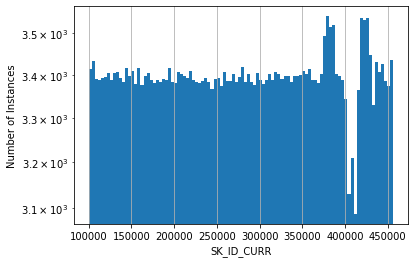

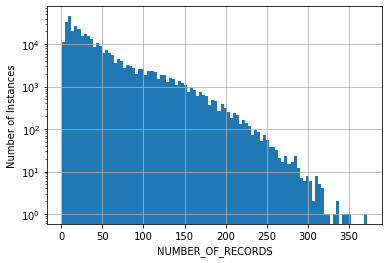

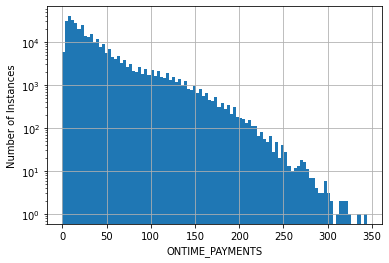

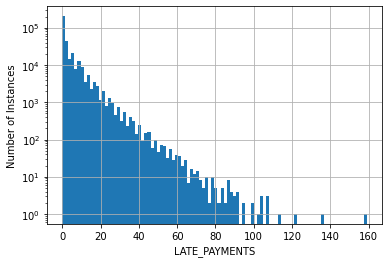

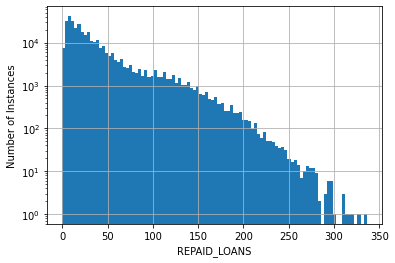

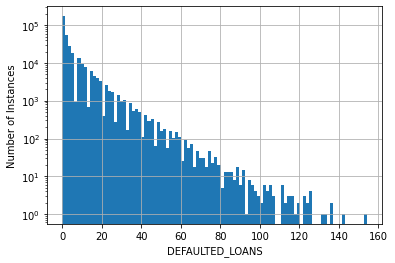

In [ ]:
for column in loan_history:
    plt.hist(loan_history[column], bins=100)
    plt.grid()
    plt.ylabel('Number of Instances')
    plt.xlabel(column)
    plt.yscale('log')
    plt.show()

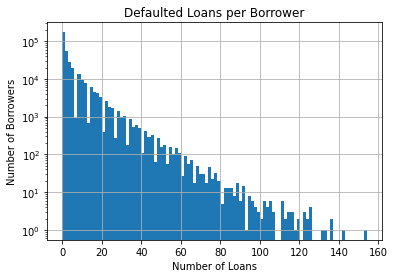

In [ ]:
plt.hist(loan_history['DEFAULTED_LOANS'], bins=100)
plt.grid()
plt.ylabel('Number of Borrowers')
plt.xlabel('Number of Loans')
plt.title('Defaulted Loans per Borrower')
plt.yscale('log')
plt.show()

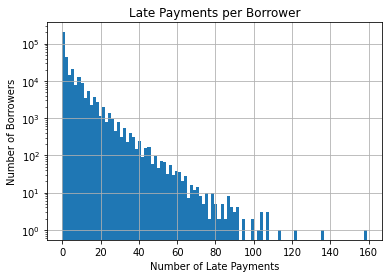

In [ ]:
plt.hist(loan_history['LATE_PAYMENTS'], bins=100)
plt.grid()
plt.ylabel('Number of Borrowers')
plt.xlabel('Number of Late Payments')
plt.title('Late Payments per Borrower')
plt.yscale('log')
plt.show()

In [ ]:
# correlations with the target column
loan_history_with_target = loan_history.merge(app_train_results, how='left', on='SK_ID_CURR')
print(loan_history_with_target.corr()['TARGET'].sort_values())

EXT_SOURCE_3                  -0.177519
EXT_SOURCE_2                  -0.159834
EXT_SOURCE_1                  -0.156030
DAYS_EMPLOYED                 -0.046518
FLOORSMAX_AVG                 -0.041110
                                 ...   
REGION_RATING_CLIENT_W_CITY    0.060041
DAYS_LAST_PHONE_CHANGE         0.061079
DAYS_BIRTH                     0.080548
TARGET                         1.000000
FLAG_MOBIL                          NaN
Name: TARGET, Length: 111, dtype: float64


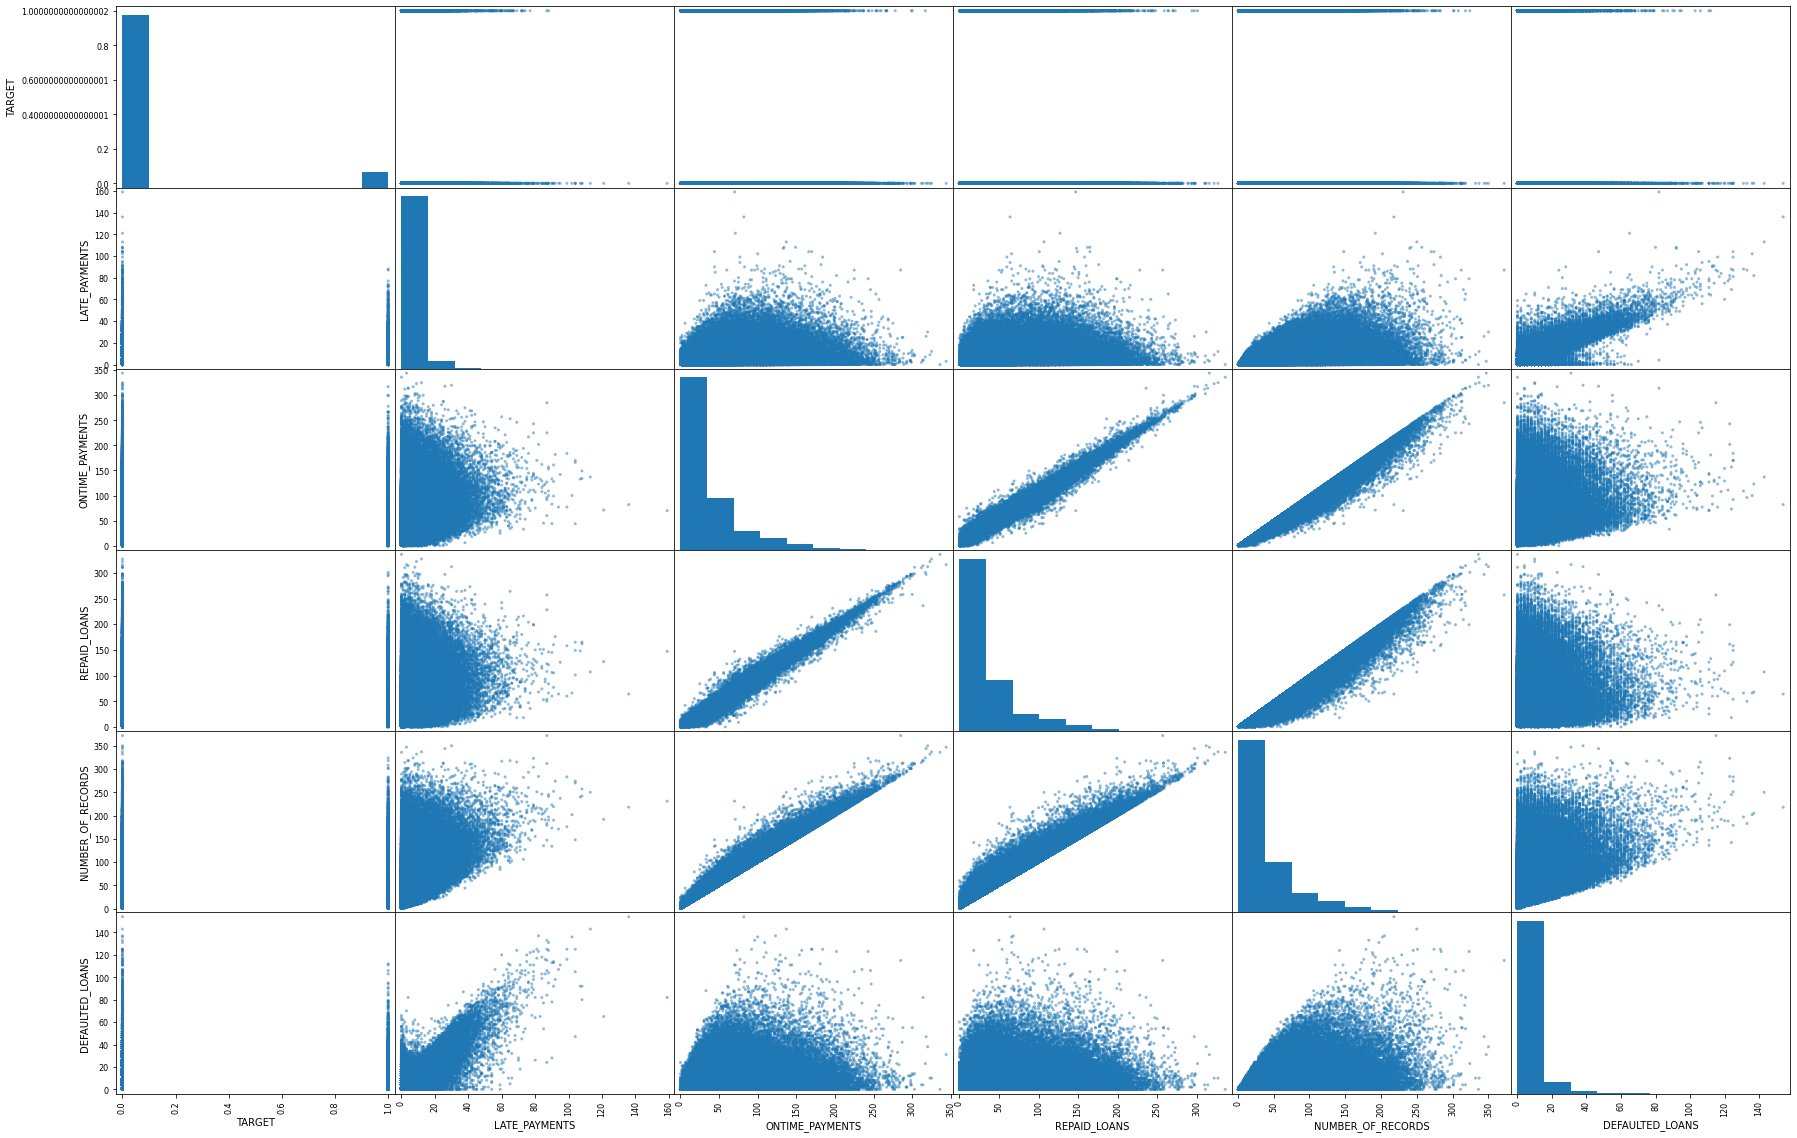

In [ ]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with TARGET
attributes = ["TARGET", "LATE_PAYMENTS", "ONTIME_PAYMENTS", "REPAID_LOANS", "NUMBER_OF_RECORDS", "DEFAULTED_LOANS"]
scatter_matrix(loan_history_with_target[attributes], figsize=(30, 20));

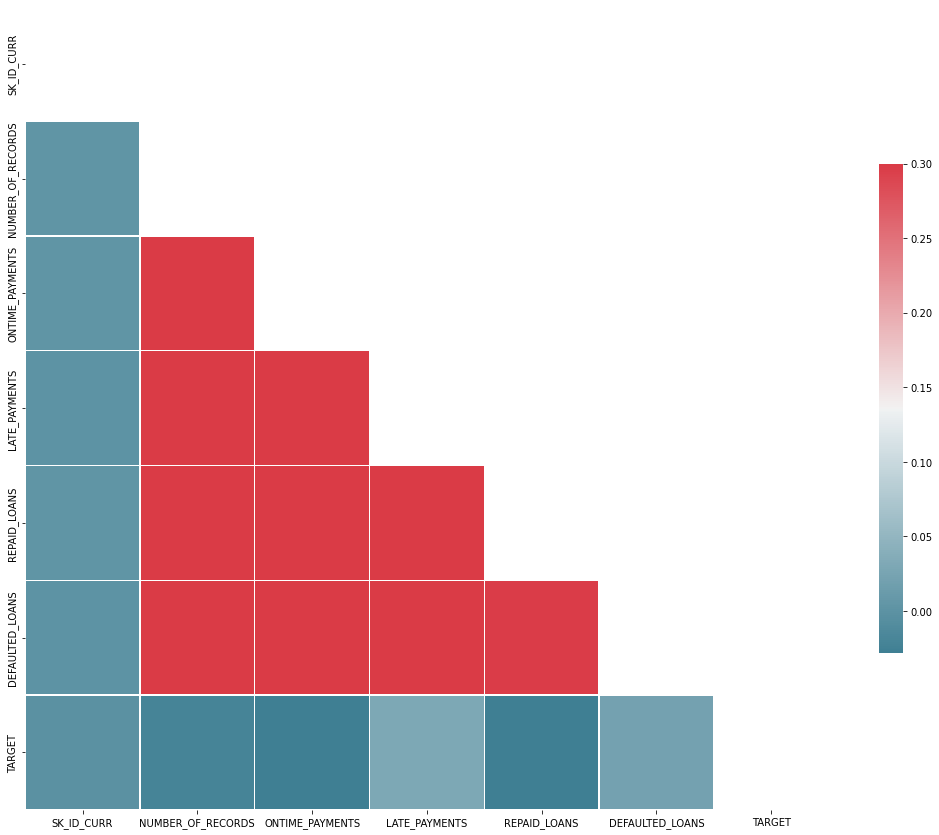

In [ ]:
# compute the correlation matrix
corr = loan_history_with_target.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

**Credit Card Balance Dataset Feature Engineering**

In [ ]:
# feature engineering
credit_card_balance = pd.DataFrame(datasets["credit_card_balance"])

In [ ]:
credit_card_balance_plus_test = credit_card_balance.merge(app_train_results, how='left', on='SK_ID_CURR')

In [ ]:
credit_card_balance_aggregated = credit_card_balance.groupby("SK_ID_CURR",as_index=False).agg("mean")

**Credit Card Balance Feature Transformer**

In [ ]:
class Credit_Card_Balance_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features


    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        credit_card_balance = pd.DataFrame(X)

        credit_card_balance["Average_Payment_CC"] = credit_card_balance.groupby("SK_ID_PREV",as_index=False).agg("mean")["AMT_PAYMENT_CURRENT"]

        credit_card_balance["Total_Payments_CC"] = credit_card_balance.groupby("SK_ID_CURR",as_index=False).count()["SK_ID_PREV"]

        credit_card_balance_aggregated= credit_card_balance.groupby("SK_ID_CURR",as_index=False).agg("mean")

        credit_card_balance_aggregated["BALANCE/LIMIT MEAN_CC"] = credit_card_balance_aggregated["AMT_BALANCE"]/credit_card_balance_aggregated["AMT_CREDIT_LIMIT_ACTUAL"]

        credit_card_balance_aggregated[" "] = credit_card_balance_aggregated["AMT_RECEIVABLE_PRINCIPAL"]/credit_card_balance_aggregated["AMT_RECIVABLE"]


        return credit_card_balance_aggregated


In [ ]:
x = Credit_Card_Balance_Transformer()
x.transform(credit_card_balance)

SK_ID_CURR  SK_ID_PREV  ...  BALANCE/LIMIT MEAN_CC          
0           100006   1489396.0  ...               0.000000       NaN
1           100011   1843384.0  ...               0.331825  0.962687
2           100013   2038692.0  ...               0.137869  0.953289
3           100021   2594025.0  ...               0.000000       NaN
4           100023   1499902.0  ...               0.000000       NaN
...            ...         ...  ...                    ...       ...
103553      456244   2181926.0  ...               0.444874  0.975845
103554      456246   1079732.0  ...               0.097309  0.998846
103555      456247   1595171.0  ...               0.161225  0.955570
103556      456248   2743495.0  ...               0.000000       NaN
103557      456250   1794451.0  ...               0.970450  0.977990

[103558 rows x 26 columns]

**Transformed Credit Card Balance Dataset EDA**

In [ ]:
credit_card_balance_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103558 entries, 0 to 103557
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  103558 non-null  int64  
 1   SK_ID_PREV                  103558 non-null  float64
 2   MONTHS_BALANCE              103558 non-null  float64
 3   AMT_BALANCE                 103558 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     103558 non-null  float64
 5   AMT_DRAWINGS_ATM_CURRENT    72194 non-null   float64
 6   AMT_DRAWINGS_CURRENT        103558 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  72194 non-null   float64
 8   AMT_DRAWINGS_POS_CURRENT    72194 non-null   float64
 9   AMT_INST_MIN_REGULARITY     103558 non-null  float64
 10  AMT_PAYMENT_CURRENT         72120 non-null   float64
 11  AMT_PAYMENT_TOTAL_CURRENT   103558 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    103558 non-null  float64
 13  AMT_RECIVABLE 

In [ ]:
credit_card_balance_aggregated.describe()

SK_ID_CURR    SK_ID_PREV  ...         SK_DPD     SK_DPD_DEF
count  103558.000000  1.035580e+05  ...  103558.000000  103558.000000
mean   278381.457956  1.905085e+06  ...       4.107206       0.151713
std    102779.519683  5.360210e+05  ...      44.341025      11.105665
min    100006.000000  1.000018e+06  ...       0.000000       0.000000
25%    189536.250000  1.431665e+06  ...       0.000000       0.000000
50%    278649.000000  1.898428e+06  ...       0.000000       0.000000
75%    367690.000000  2.370875e+06  ...       0.000000       0.000000
max    456250.000000  2.843496e+06  ...    1635.684783    1635.684783

[8 rows x 22 columns]

In [ ]:
credit_card_balance_aggregated.isna().sum()

SK_ID_CURR                        0
SK_ID_PREV                        0
MONTHS_BALANCE                    0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_DRAWINGS_ATM_CURRENT      31364
AMT_DRAWINGS_CURRENT              0
AMT_DRAWINGS_OTHER_CURRENT    31364
AMT_DRAWINGS_POS_CURRENT      31364
AMT_INST_MIN_REGULARITY           0
AMT_PAYMENT_CURRENT           31438
AMT_PAYMENT_TOTAL_CURRENT         0
AMT_RECEIVABLE_PRINCIPAL          0
AMT_RECIVABLE                     0
AMT_TOTAL_RECEIVABLE              0
CNT_DRAWINGS_ATM_CURRENT      31364
CNT_DRAWINGS_CURRENT              0
CNT_DRAWINGS_OTHER_CURRENT    31364
CNT_DRAWINGS_POS_CURRENT      31364
CNT_INSTALMENT_MATURE_CUM         0
SK_DPD                            0
SK_DPD_DEF                        0
dtype: int64

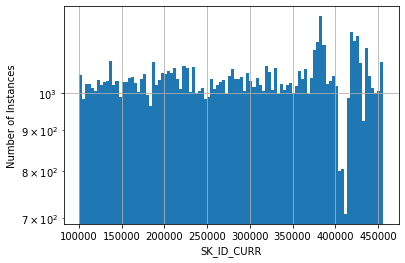

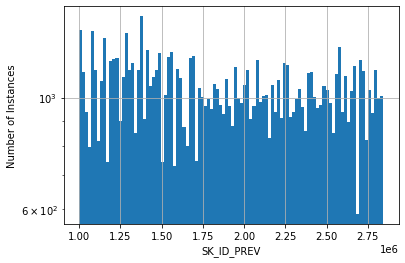

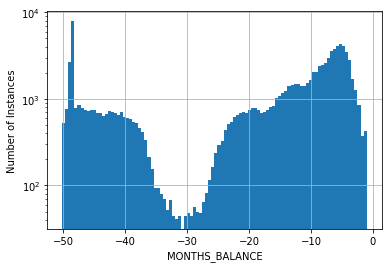

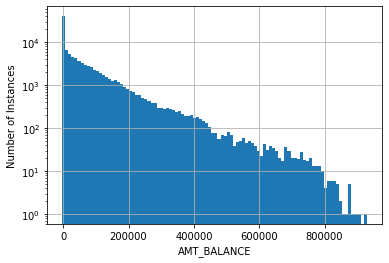

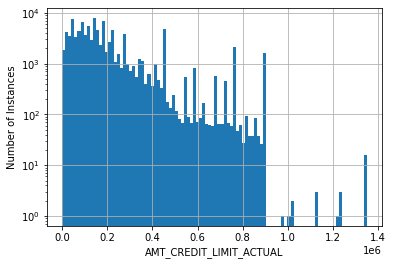

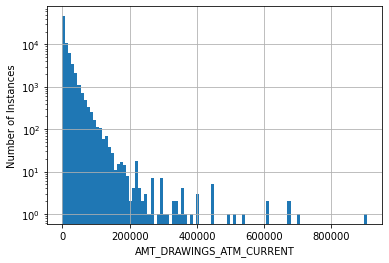

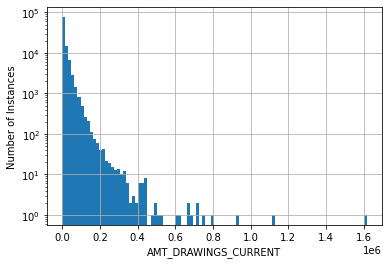

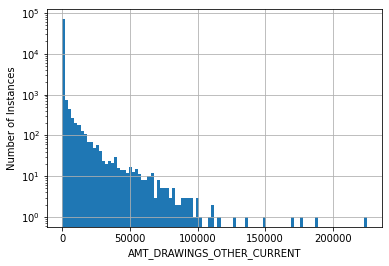

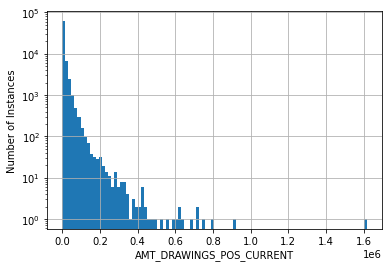

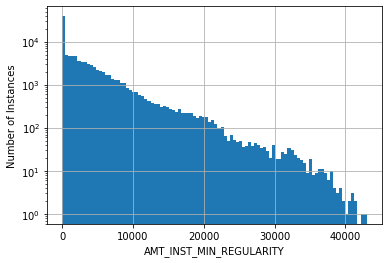

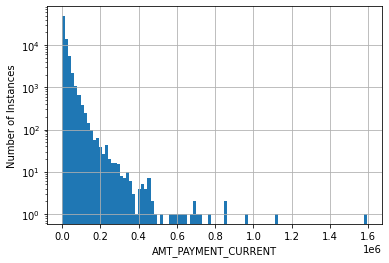

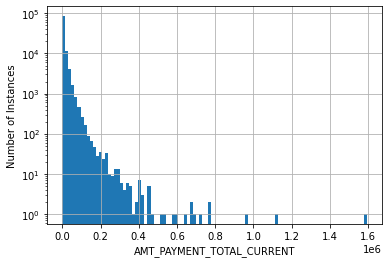

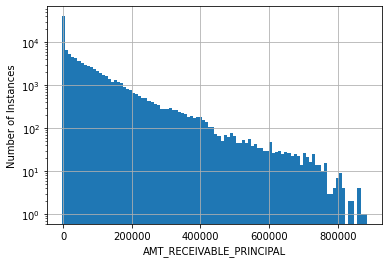

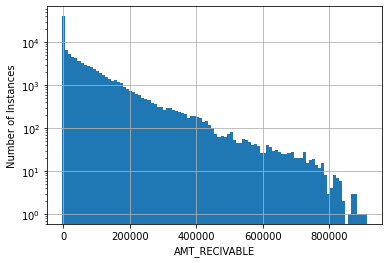

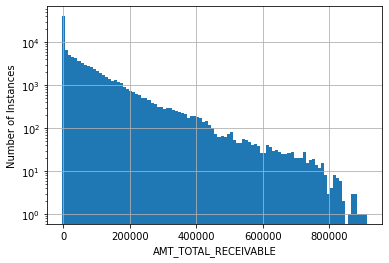

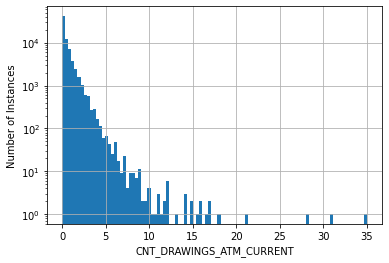

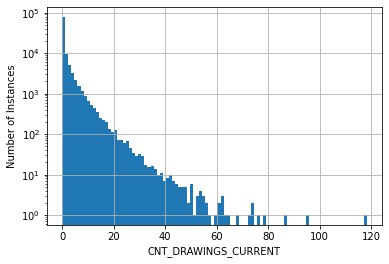

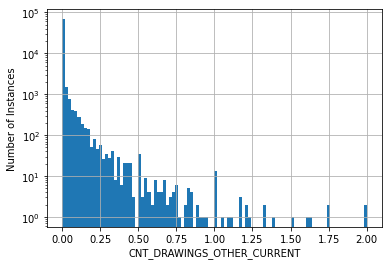

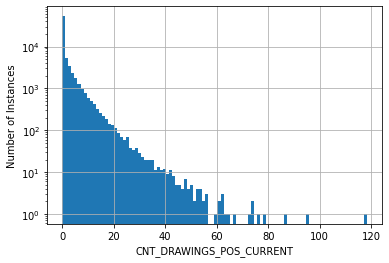

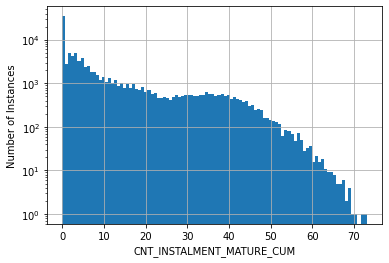

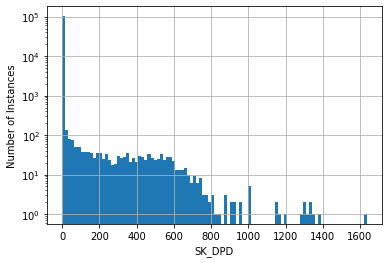

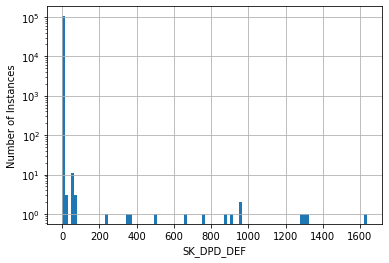

In [ ]:
for column in credit_card_balance_aggregated:
    plt.hist(credit_card_balance_aggregated[column], bins=100)
    plt.grid()
    plt.ylabel("Number of Instances")
    plt.xlabel(column)
    plt.yscale('log')
    plt.show()

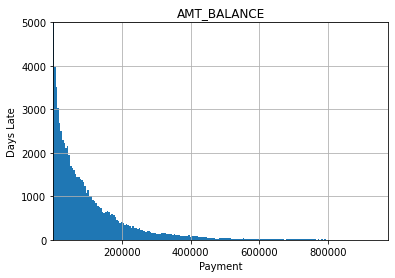

In [ ]:
plt.hist(credit_card_balance_aggregated['AMT_BALANCE'],200);
plt.grid()
plt.ylabel('Days Late')
plt.xlabel('Payment')
plt.title('AMT_BALANCE')
plt.xlim(1)
plt.ylim(0,5000)
plt.show()

In [ ]:
# correlations with the target column
print(credit_card_balance_plus_test.corr()["TARGET"].sort_values())

CNT_INSTALMENT_MATURE_CUM    -0.023684
SK_ID_CURR                   -0.004617
SK_DPD                        0.001684
SK_ID_PREV                    0.002571
CNT_DRAWINGS_OTHER_CURRENT    0.003044
AMT_DRAWINGS_OTHER_CURRENT    0.003843
AMT_DRAWINGS_POS_CURRENT      0.005084
SK_DPD_DEF                    0.010538
AMT_PAYMENT_TOTAL_CURRENT     0.012302
AMT_PAYMENT_CURRENT           0.012929
AMT_CREDIT_LIMIT_ACTUAL       0.013823
AMT_DRAWINGS_CURRENT          0.022378
AMT_DRAWINGS_ATM_CURRENT      0.024700
CNT_DRAWINGS_POS_CURRENT      0.029536
MONTHS_BALANCE                0.035695
CNT_DRAWINGS_CURRENT          0.037793
CNT_DRAWINGS_ATM_CURRENT      0.038437
AMT_INST_MIN_REGULARITY       0.039798
AMT_RECEIVABLE_PRINCIPAL      0.049692
AMT_RECIVABLE                 0.049803
AMT_TOTAL_RECEIVABLE          0.049839
AMT_BALANCE                   0.050098
TARGET                        1.000000
Name: TARGET, dtype: float64


In [ ]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with TARGET
attributes = ["TARGET", "AMT_BALANCE", "AMT_TOTAL_RECEIVABLE", "AMT_RECIVABLE", "AMT_RECEIVABLE_PRINCIPAL", "AMT_INST_MIN_REGULARITY"]
scatter_matrix(credit_card_balance_plus_test[attributes], figsize=(30, 20));

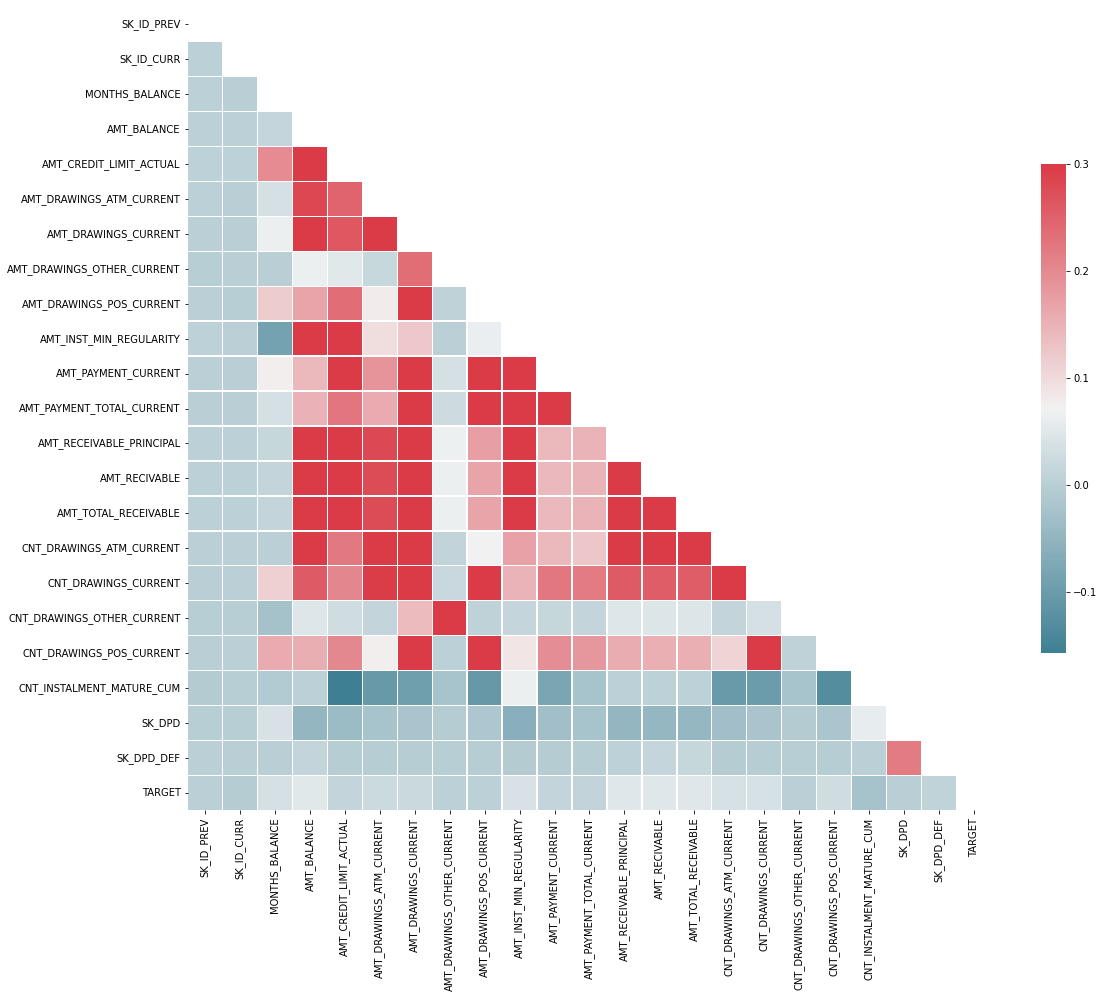

In [ ]:
# compute the correlation matrix
corr = credit_card_balance_plus_test.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [ ]:
credit_card_balance_aggregated_merged = credit_card_balance_aggregated.merge(app_train_results, how='left', on='SK_ID_CURR')
print(credit_card_balance_aggregated_merged.corr()["TARGET"].sort_values())

CNT_INSTALMENT_MATURE_CUM    -0.028917
AMT_CREDIT_LIMIT_ACTUAL      -0.008852
AMT_DRAWINGS_POS_CURRENT     -0.004017
SK_ID_CURR                   -0.003729
SK_DPD                       -0.003195
SK_ID_PREV                   -0.000141
AMT_PAYMENT_CURRENT           0.005274
SK_DPD_DEF                    0.006660
AMT_DRAWINGS_OTHER_CURRENT    0.009798
CNT_DRAWINGS_OTHER_CURRENT    0.014756
AMT_PAYMENT_TOTAL_CURRENT     0.022665
CNT_DRAWINGS_POS_CURRENT      0.052547
AMT_DRAWINGS_CURRENT          0.058732
AMT_DRAWINGS_ATM_CURRENT      0.059925
MONTHS_BALANCE                0.062081
AMT_INST_MIN_REGULARITY       0.073724
CNT_DRAWINGS_CURRENT          0.082520
AMT_RECEIVABLE_PRINCIPAL      0.086062
AMT_RECIVABLE                 0.086478
AMT_TOTAL_RECEIVABLE          0.086490
AMT_BALANCE                   0.087177
CNT_DRAWINGS_ATM_CURRENT      0.107692
TARGET                        1.000000
Name: TARGET, dtype: float64


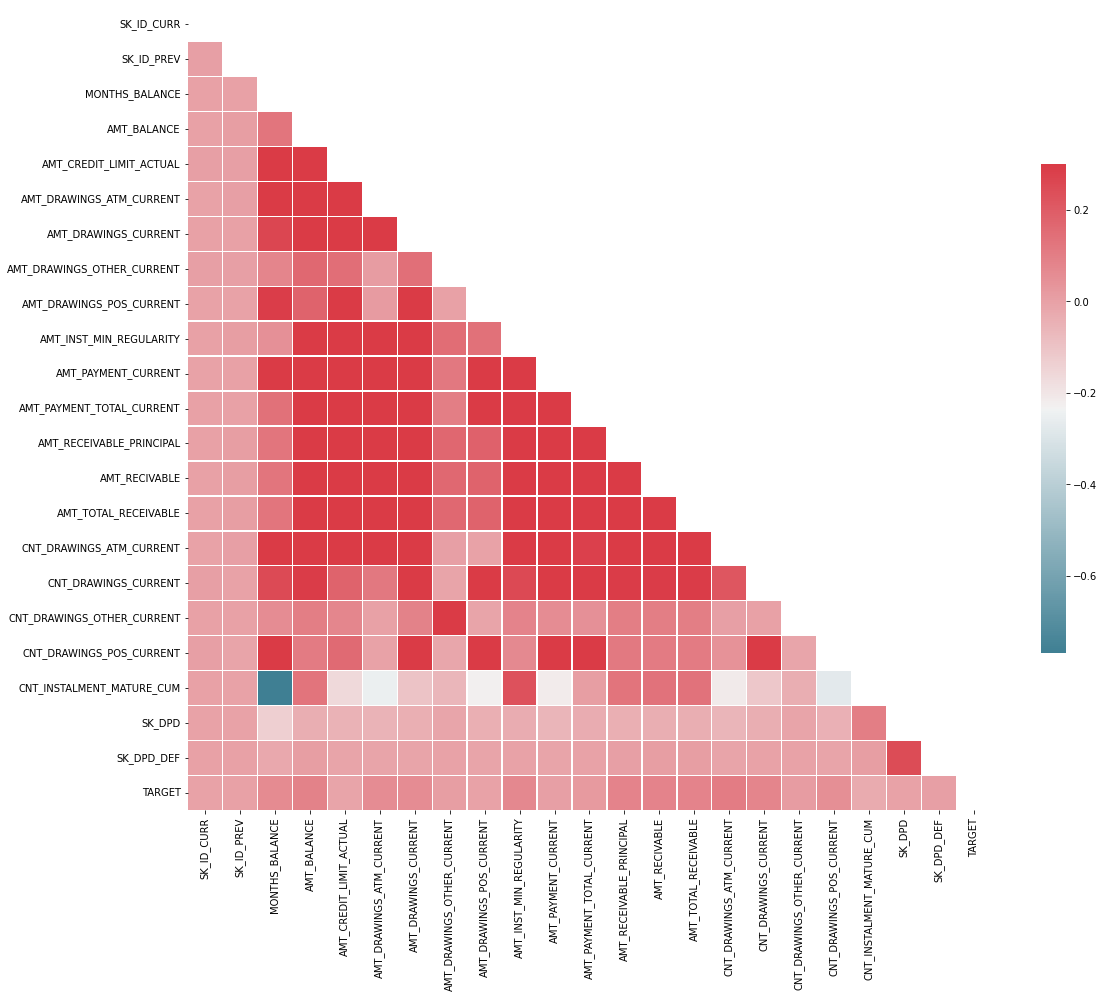

In [ ]:
# compute the correlation matrix
corr = credit_card_balance_aggregated_merged.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

**Bureau Balance Dataset Feature Engineering**

In [ ]:
#feature engineering
datasets["bureau_balance"].describe(include = 'all') #numerical only features

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   2.729992e+07    2.729992e+07  27299925
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN  13646993
mean    6.036297e+06   -3.074169e+01       NaN
std     4.923489e+05    2.386451e+01       NaN
min     5.001709e+06   -9.600000e+01       NaN
25%     5.730933e+06   -4.600000e+01       NaN
50%     6.070821e+06   -2.500000e+01       NaN
75%     6.431951e+06   -1.100000e+01       NaN
max     6.842888e+06    0.000000e+00       NaN

In [ ]:
datasets["bureau_balance"].head(10)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C
5       5715448              -5      C
6       5715448              -6      C
7       5715448              -7      C
8       5715448              -8      C
9       5715448              -9      0

In [ ]:
#Status shows X= Unknown, C= no Default; Integer : Num of months defaulted payments. Convert to Numerical
bur_bal = pd.DataFrame(datasets["bureau_balance"])

bur_bal['STATUS'] = bur_bal['STATUS'].apply(lambda x: 0 if x in ["C", "X"] else int(x))
bur_bal = bur_bal.drop(columns=['MONTHS_BALANCE'])

In [ ]:
bur_bal.head()

SK_ID_BUREAU  STATUS
0       5715448       0
1       5715448       0
2       5715448       0
3       5715448       0
4       5715448       0

In [ ]:
#Num of default Payments per loan
def_bur_loans = bur_bal.groupby("SK_ID_BUREAU",as_index=False).count()
def_bur_loans = def_bur_loans.rename(columns={'STATUS': 'NUM_DEF_PAYMENTS'})

In [ ]:
def_bur_loans

SK_ID_BUREAU  NUM_DEF_PAYMENTS
0            5001709                97
1            5001710                83
2            5001711                 4
3            5001712                19
4            5001713                22
...              ...               ...
817390       6842884                48
817391       6842885                24
817392       6842886                33
817393       6842887                37
817394       6842888                62

[817395 rows x 2 columns]

**Bureau Dataset Feature Engineering**

In [ ]:
bur =  datasets["bureau"]
bur

SK_ID_CURR  SK_ID_BUREAU  ... DAYS_CREDIT_UPDATE AMT_ANNUITY
0            215354       5714462  ...               -131         NaN
1            215354       5714463  ...                -20         NaN
2            215354       5714464  ...                -16         NaN
3            215354       5714465  ...                -16         NaN
4            215354       5714466  ...                -21         NaN
...             ...           ...  ...                ...         ...
1716423      259355       5057750  ...                -19         NaN
1716424      100044       5057754  ...              -2493         NaN
1716425      100044       5057762  ...               -967         NaN
1716426      246829       5057770  ...              -1508         NaN
1716427      246829       5057778  ...               -387         NaN

[1716428 rows x 17 columns]

In [ ]:
#combine with app train to check for correlatioin
bur_comb = bur.merge(def_bur_loans,how='left', on='SK_ID_BUREAU')

In [ ]:
bur_comb_target = bur_comb.merge(app_train_results, how='left', on='SK_ID_CURR')

In [ ]:
bur_comb_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  NUM_DEF_PAYMENTS        float64
 18  TARGET                  float64
dtypes: float64(10), int64(6), object(3)
memory usage: 261.9+ MB


In [ ]:
NUM_OF_LOANS = bur_comb_target.groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index(name='NUM_OF_LOANS')
print('UM_OF_LOANs:')
display(NUM_OF_LOANS.head(10))

UM_OF_LOANs:


SK_ID_CURR  NUM_OF_LOANS
0      100001             7
1      100002             8
2      100003             4
3      100004             2
4      100005             3
5      100007             1
6      100008             3
7      100009            18
8      100010             2
9      100011             4

In [ ]:
NUM_DEF_PAYMENTS = bur_comb_target.groupby('SK_ID_CURR')['NUM_DEF_PAYMENTS'].sum().reset_index(name='NUM_DEF_PAYMENTS')
print('total on time payments:')
display(NUM_DEF_PAYMENTS.head(10))

total on time payments:


SK_ID_CURR  NUM_DEF_PAYMENTS
0      100001             172.0
1      100002             110.0
2      100003               0.0
3      100004               0.0
4      100005              21.0
5      100007               0.0
6      100008               0.0
7      100009               0.0
8      100010              72.0
9      100011               0.0

In [ ]:
Bur_features = NUM_OF_LOANS.merge(NUM_DEF_PAYMENTS, how='left', on='SK_ID_CURR')

**Bureau Balance and Bureau Datasets Feature Transformer**

In [ ]:
class bur_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features


    def fit(self, X=None, y=None):
        return self
    
    def transform(self, y=None):
        # Import Both files
        bur_bal = pd.DataFrame(datasets["bureau_balance"])
        bur = pd.DataFrame(datasets["bureau"])
        
        # Select only concers columns
        bureau_comb_data = bur[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].copy()
         
        # Extract infor for bureau balance & Create new feature 
        #Num of default Payments per loan
        bur_bal['STATUS'] = bur_bal['STATUS'].apply(lambda x: 0 if x in ["C", "X"] else int(x))
        bur_bal = bur_bal.drop(columns=['MONTHS_BALANCE'])
        def_bur_loans = bur_bal.groupby("SK_ID_BUREAU",as_index=False).count()
        def_bur_loans = def_bur_loans.rename(columns={'STATUS': 'NUM_DEF_PAYMENTS'})
        
        # Merge with bureau file
                
        bureau_comb_data = bureau_comb_data.merge(def_bur_loans,how='left', on='SK_ID_BUREAU')
        
        # Drop unwanted columns
        
        bureau_comb_data = bureau_comb_data.drop(columns=['SK_ID_BUREAU'])

        #add new Columns
        bureau_comb_data["NUM_OF_LOANS"] = bureau_comb_data.groupby("SK_ID_CURR",as_index=False).agg("count")["DAYS_CREDIT"]
        bureau_comb_data["DEFAULT_PAYMENTS"] = bureau_comb_data.groupby("SK_ID_CURR",as_index=False).agg("count")["NUM_DEF_PAYMENTS"]
        return bureau_comb_data 

**Transformed Combined Bureau Dataset EDA**

In [ ]:
bur_comb_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  NUM_DEF_PAYMENTS        float64
 18  TARGET                  float64
dtypes: float64(10), int64(6), object(3)
memory usage: 261.9+ MB


In [ ]:
bur_comb_target.describe()

SK_ID_CURR  SK_ID_BUREAU  ...  NUM_DEF_PAYMENTS        TARGET
count  1.716428e+06  1.716428e+06  ...     774354.000000  1.465325e+06
mean   2.782149e+05  5.924434e+06  ...         31.225694  7.815331e-02
std    1.029386e+05  5.322657e+05  ...         23.483837  2.684128e-01
min    1.000010e+05  5.000000e+06  ...          1.000000  0.000000e+00
25%    1.888668e+05  5.463954e+06  ...         12.000000  0.000000e+00
50%    2.780550e+05  5.926304e+06  ...         25.000000  0.000000e+00
75%    3.674260e+05  6.385681e+06  ...         45.000000  0.000000e+00
max    4.562550e+05  6.843457e+06  ...         97.000000  1.000000e+00

[8 rows x 16 columns]

In [ ]:
bur_comb_target.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
NUM_DEF_PAYMENTS           942074
TARGET                     251103
dtype: int64

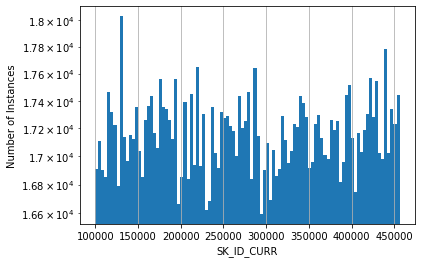

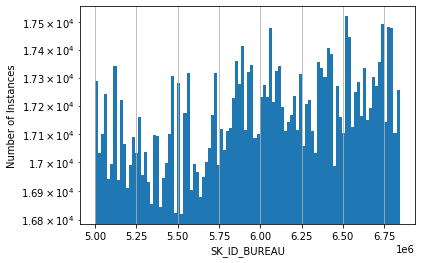

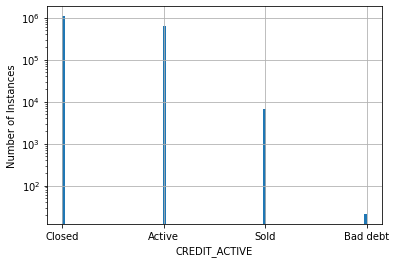

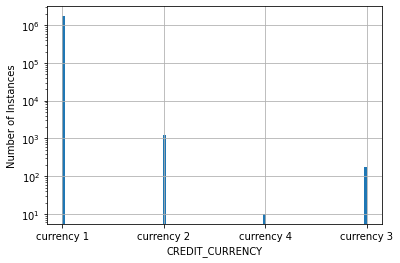

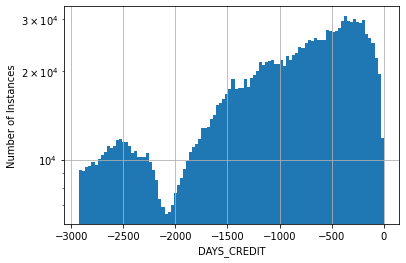

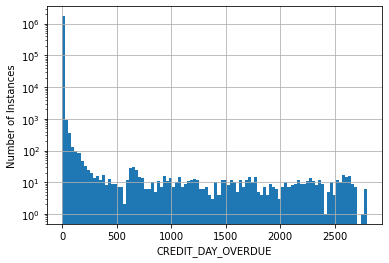

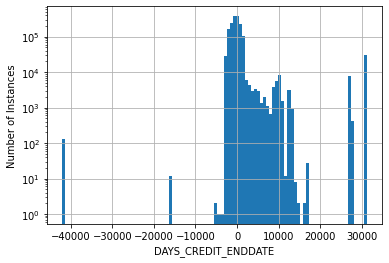

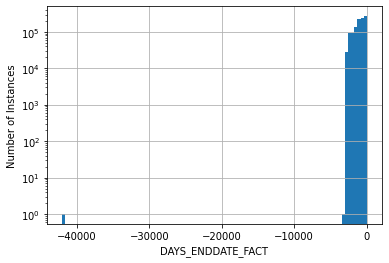

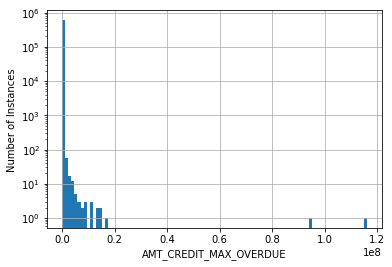

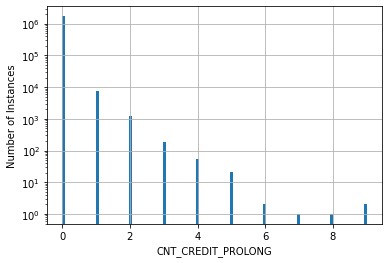

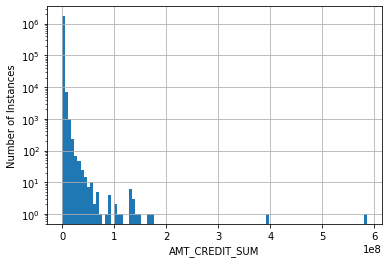

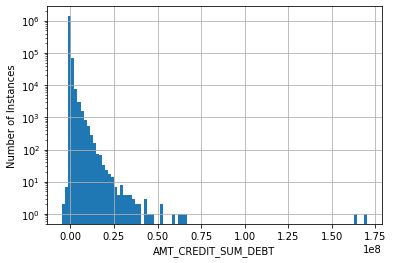

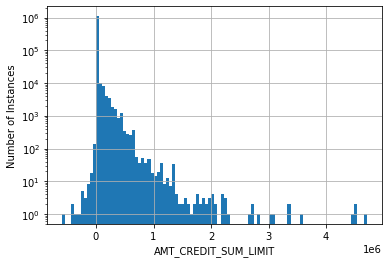

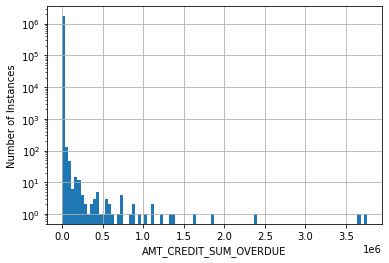

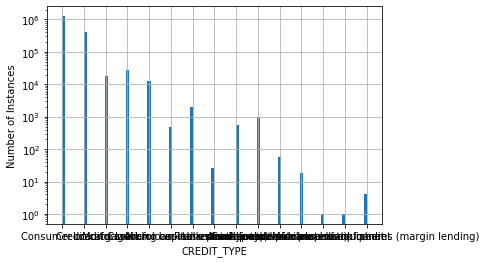

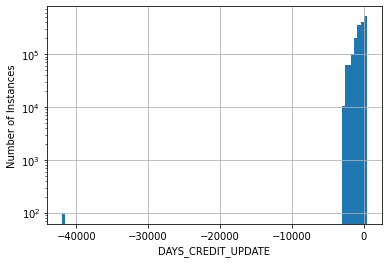

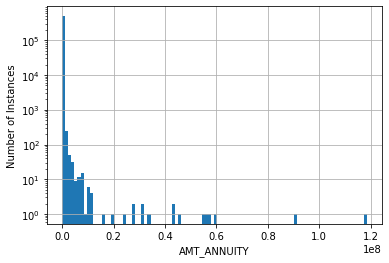

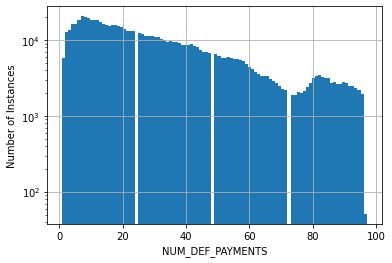

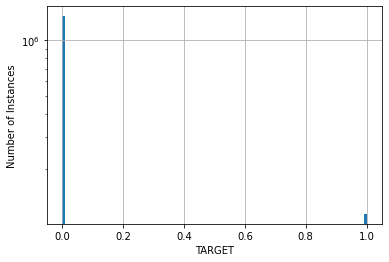

In [ ]:
for column in bur_comb_target:
    plt.hist(bur_comb_target[column], bins=100)
    plt.grid()
    plt.ylabel('Number of Instances')
    plt.xlabel(column)
    plt.yscale('log')
    plt.show()

In [ ]:
# correlations with the target column
print(bur_comb_target.corr()['TARGET'].sort_values(ascending=False))

TARGET                    1.000000
DAYS_CREDIT               0.061556
DAYS_CREDIT_UPDATE        0.041076
DAYS_ENDDATE_FACT         0.039057
DAYS_CREDIT_ENDDATE       0.026497
AMT_CREDIT_SUM_OVERDUE    0.006253
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_DEBT       0.002539
AMT_CREDIT_MAX_OVERDUE    0.001587
CNT_CREDIT_PROLONG        0.001523
AMT_ANNUITY               0.000117
SK_ID_CURR               -0.003024
AMT_CREDIT_SUM_LIMIT     -0.005990
SK_ID_BUREAU             -0.009018
AMT_CREDIT_SUM           -0.010606
NUM_DEF_PAYMENTS         -0.061903
Name: TARGET, dtype: float64


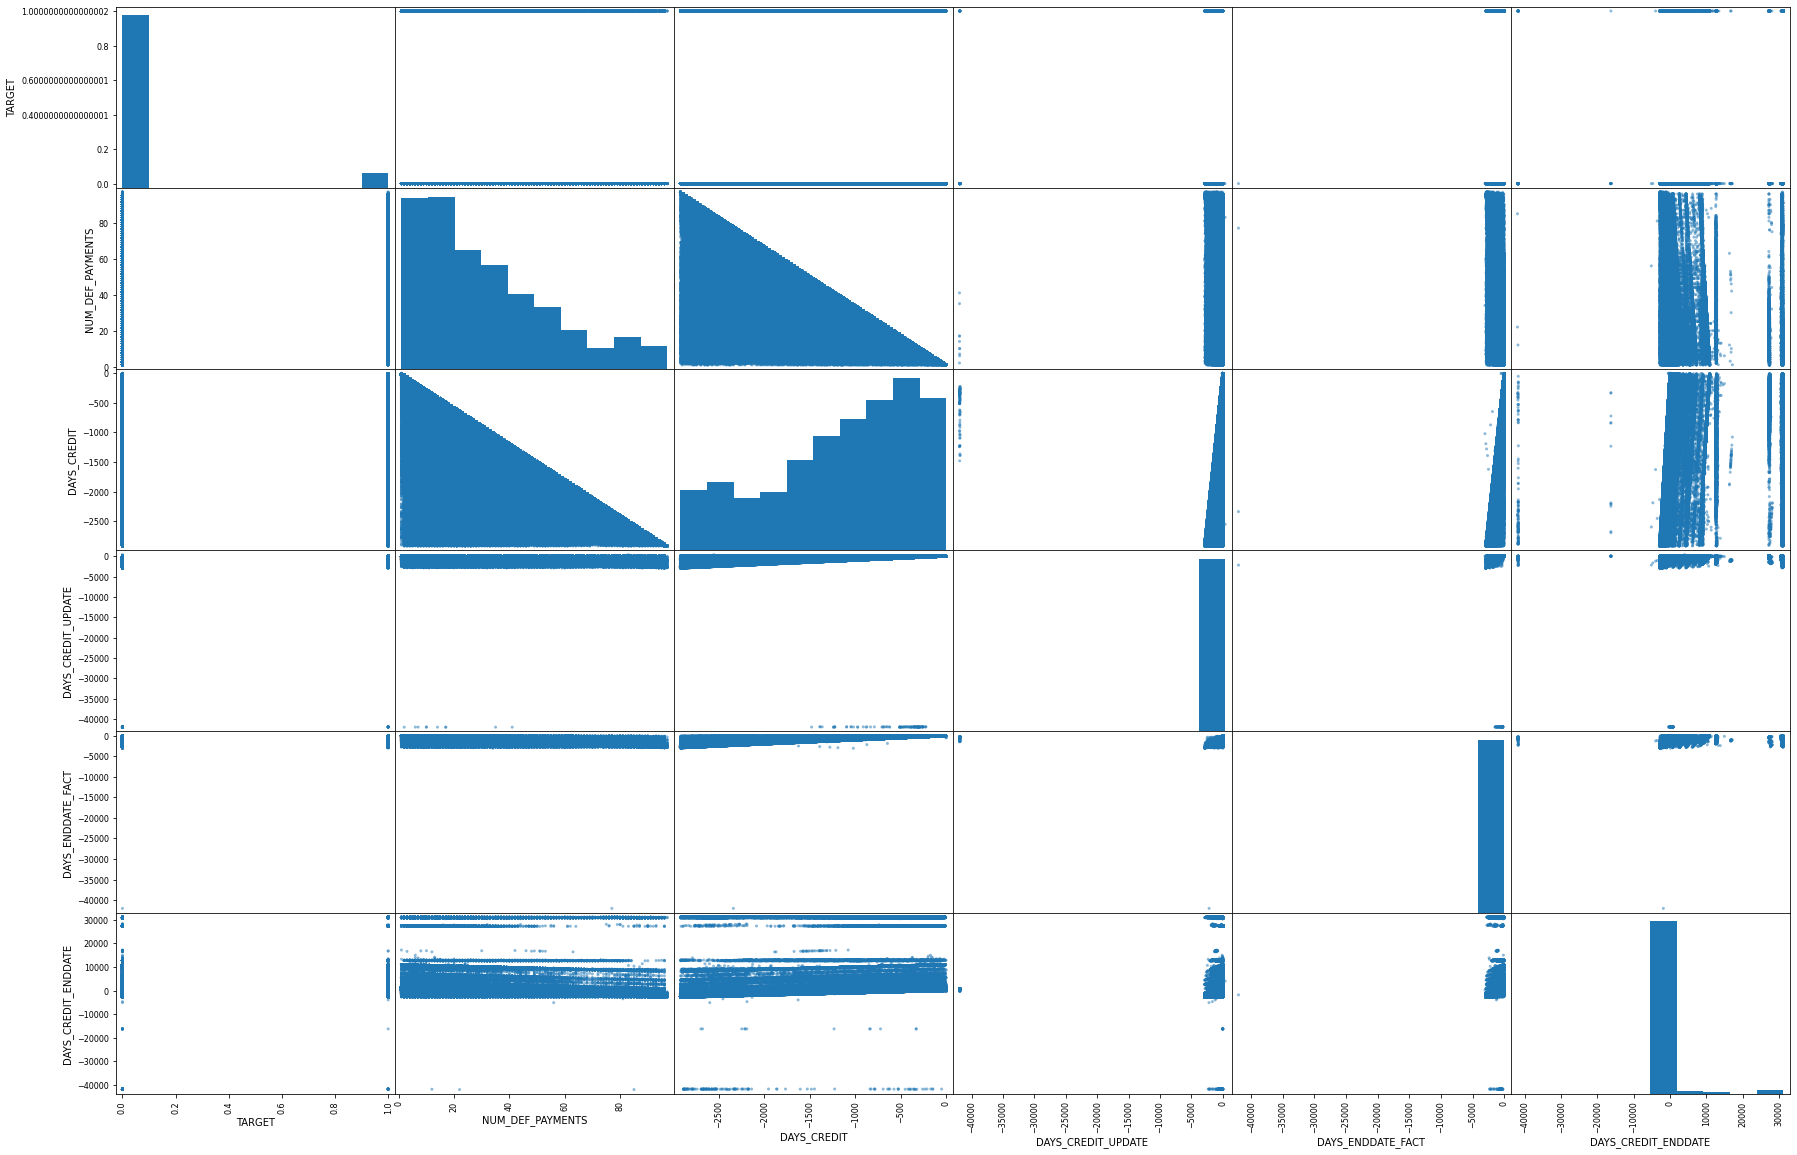

In [ ]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with TARGET
attributes = ["TARGET", "NUM_DEF_PAYMENTS", "DAYS_CREDIT", "DAYS_CREDIT_UPDATE", "DAYS_ENDDATE_FACT", "DAYS_CREDIT_ENDDATE"]
scatter_matrix(bur_comb_target[attributes], figsize=(30, 20));

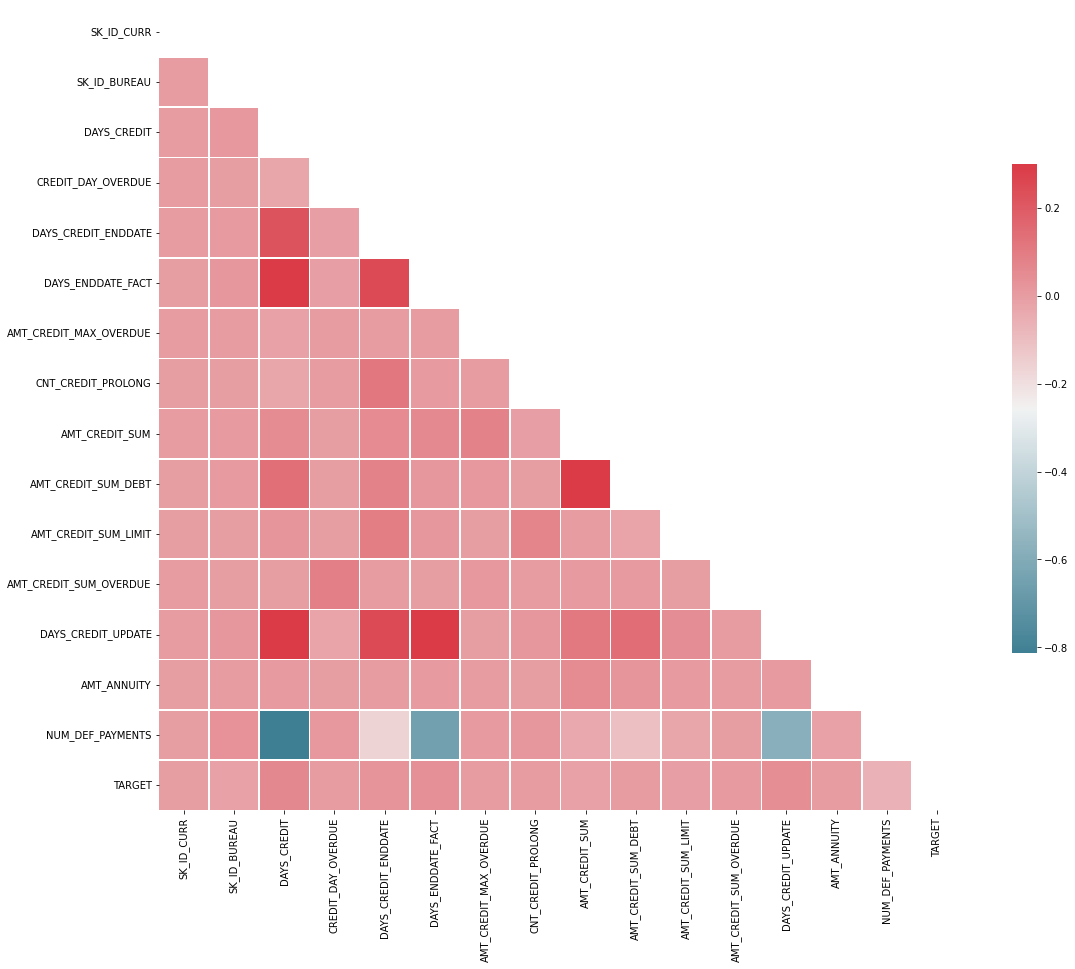

In [ ]:
# compute the correlation matrix
corr = bur_comb_target.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

**Further Feature Engineering in Phase 2**

Credit Card data is scattered among the four datasets: bureau_balance, bureau, credit_card_balance, and Previous_Application. It is intermixed with other types of loans and contains missing data, such as missing a down payment. The only true difference between the loans from the bureau side and the Prev_application side was the creditor. To provide a more accurate picture of an individual’s credit history, we combined credit card loan data from both sources while eliminating other types of loans and redundant features. This gave us a full view of an individual’s history with credit cards and had the added benefit of less applicants having no history since data was pulled from multiple data sets.
For other loans in the Previous_Application dataset, a more surgical approach was taken as well. Loan data was split between cash loans and consumer loans. Revolving loans were ignored since almost all revolving loans were credit cards which were capture with credit card features. All their features were considered in applicants.


Applicants

In [ ]:
#find all SK_ID_CURR in dataset
test_ids = pd.DataFrame(datasets["application_test"]["SK_ID_CURR"])
train_ids = pd.DataFrame(datasets["application_train"]["SK_ID_CURR"])
all_ids = test_ids.append(train_ids)
all_ids = all_ids["SK_ID_CURR"].sort_values().reset_index()
Final_Features = all_ids

In [ ]:
bureau_balance = datasets["bureau_balance"]

#remove balances that are not late
bureau_balance_late = bureau_balance[bureau_balance["STATUS"].isin(["1","2","3","4","5"])]
bureau_balance_late["STATUS"] = bureau_balance_late["STATUS"].astype(int)

#get total payment for each loan in bureau_balance
bureau_balance_total_payments = bureau_balance.groupby("SK_ID_BUREAU",as_index=False).count().drop(columns=["STATUS"])
bureau_balance_total_payments = bureau_balance_total_payments.rename(columns={"MONTHS_BALANCE":"CC_TOTAL_PAYMENTS"})
#Give median lateness of all late loans in burea_balance
bureau_balance_late_median = bureau_balance_late.groupby("SK_ID_BUREAU",as_index=False).agg("median").drop(columns=["MONTHS_BALANCE"])
bureau_balance_late_median = bureau_balance_late_median.rename(columns={"STATUS":"CC_Median_Late"})
#Give max lateness
bureau_balance_late_max = bureau_balance_late.groupby("SK_ID_BUREAU",as_index=False).agg("max").drop(columns=["MONTHS_BALANCE"])
bureau_balance_late_max = bureau_balance_late_max.rename(columns={"STATUS":"CC_Max_Late"})

#Give total late
bureau_balance_late_total = bureau_balance_late.groupby("SK_ID_BUREAU",as_index=False).count()
bureau_balance_late_total = bureau_balance_late_total.rename(columns={"STATUS":"CC_TOTAL_LATE_PAYMENTS"})
bureau_balance_late_total = bureau_balance_late_total.drop(columns=["MONTHS_BALANCE"])

#late_pct
bureau_balance_pct_payments = bureau_balance_total_payments.merge(bureau_balance_late_total, how='left', on='SK_ID_BUREAU')
bureau_balance_pct_payments["CC_MISSED_PCT"] = bureau_balance_pct_payments["CC_TOTAL_LATE_PAYMENTS"]/bureau_balance_pct_payments["CC_TOTAL_PAYMENTS"]
bureau_balance_pct_payments = bureau_balance_pct_payments.drop(columns=["CC_TOTAL_LATE_PAYMENTS"])

#gives first month of late balance
bureau_balance_first_late = bureau_balance_late.groupby("SK_ID_BUREAU",as_index=False).agg("max")
bureau_balance_first_late = bureau_balance_first_late.drop(columns=["STATUS"])

bureau_balance_first_late = bureau_balance_first_late.rename(columns={"MONTHS_BALANCE":"CC_FIRST_LATE_PAYMENT"})

In [ ]:
#merge all features
bureau_balance_transf = bureau_balance_pct_payments.merge(bureau_balance_late_max, how='left', on='SK_ID_BUREAU')
bureau_balance_transf = bureau_balance_transf.merge(bureau_balance_late_median, how='left', on='SK_ID_BUREAU')
bureau_balance_transf = bureau_balance_transf.merge(bureau_balance_late_total, how='left', on='SK_ID_BUREAU')
bureau_balance_transf = bureau_balance_transf.merge(bureau_balance_first_late, how='left', on='SK_ID_BUREAU')

In [ ]:
#insert missing values for individual loans
missing_values = {"CC_MISSED_PCT": 0.0, "CC_Max_Late": 0.0, "CC_Median_Late": 0.0, "CC_TOTAL_LATE_PAYMENTS": 0.0, "CC_FIRST_LATE_PAYMENT": -100}
bureau_balance_transf = bureau_balance_transf.fillna(value=missing_values)

In [ ]:
#merge bureau with bureau_balance transformed
bureau_transf = bureau.merge(bureau_balance_transf, how='right', on='SK_ID_BUREAU')

In [ ]:
#drop all loans that are not credit card loans
bureau_transf = bureau_transf[bureau_transf["CREDIT_TYPE"]=="Credit card"]

In [ ]:
#drop unused columns
bureau_transf = bureau_transf.drop(columns= ['SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY','CREDIT_TYPE'])

In [ ]:
#rename columns
bureau_transf  = bureau_transf.rename(columns={"AMT_CREDIT_SUM_DEBT": "CC_AMT_CREDIT_SUM_DEBT"})
bureau_transf  = bureau_transf.rename(columns={"AMT_CREDIT_SUM_LIMIT": "CC_AMT_CREDIT_SUM_LIMIT"})

In [ ]:
#get all late balances and convert them to the 1-5 categories seen in bueruea
credit_card_balance = datasets['credit_card_balance'].drop(columns=['AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS'])

#create a dataframe that will contain all non-transformed features
credit_card_info = credit_card_balance.groupby("SK_ID_PREV",as_index=False).agg("mean").drop(columns=["MONTHS_BALANCE","SK_DPD_DEF","SK_DPD"])


#dataframe to hold total payments for each loan
credit_card_total_payments = credit_card_balance.groupby("SK_ID_PREV",as_index=False).count().drop(columns=["SK_ID_CURR","SK_DPD_DEF","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL","SK_DPD"])
credit_card_total_payments = credit_card_total_payments.rename(columns={"MONTHS_BALANCE":"CC_TOTAL_PAYMENTS"})

#create a dataframe that holds all late loans, convert SK_DPD to 1-5 classification like buearu_balance
credit_card_late = credit_card_balance[credit_card_balance["SK_DPD"] > 0]
credit_card_late.loc[credit_card_late.SK_DPD < 31, "SK_DPD"] = 1
credit_card_late.loc[credit_card_late.SK_DPD > 120, "SK_DPD"] = 5
credit_card_late.loc[credit_card_late.SK_DPD > 90, "SK_DPD"] = 4
credit_card_late.loc[credit_card_late.SK_DPD > 60, "SK_DPD"] = 3
credit_card_late.loc[credit_card_late.SK_DPD > 30, "SK_DPD"] = 2

#gives median lateness
credit_card_late_median = credit_card_late.groupby("SK_ID_PREV",as_index=False).agg("median")
credit_card_late_median = credit_card_late_median.rename(columns={"SK_DPD":"CC_Median_Late"}).drop(columns=["SK_ID_CURR","SK_DPD_DEF","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL", "MONTHS_BALANCE"])
#Give max lateness
credit_card_late_max = credit_card_late.groupby("SK_ID_PREV",as_index=False).agg("max")
credit_card_late_max = credit_card_late_max.rename(columns={"SK_DPD":"CC_Max_Late"}).drop(columns=["SK_ID_CURR","SK_DPD_DEF","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL", "MONTHS_BALANCE"])

#Give total late
credit_card_late_total = credit_card_late.groupby("SK_ID_PREV",as_index=False).count()
credit_card_late_total = credit_card_late_total.rename(columns={"SK_DPD":"CC_TOTAL_LATE_PAYMENTS"}).drop(columns=["SK_ID_CURR","SK_DPD_DEF","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL", "MONTHS_BALANCE"])

#gives percent of payments that are late
credit_card_pct_payments = credit_card_total_payments.merge(credit_card_late_total, how='left', on='SK_ID_PREV')
credit_card_pct_payments["CC_MISSED_PCT"] = credit_card_pct_payments["CC_TOTAL_LATE_PAYMENTS"]/credit_card_pct_payments["CC_TOTAL_PAYMENTS"]
credit_card_pct_payments = credit_card_pct_payments.drop(columns=["CC_TOTAL_PAYMENTS","CC_TOTAL_LATE_PAYMENTS"])

#gives the first late payment month
credit_card_first_late = credit_card_late.groupby("SK_ID_PREV",as_index=False).agg("max")
credit_card_first_late = credit_card_first_late.rename(columns={"MONTHS_BALANCE":"CC_FIRST_LATE_PAYMENT"}).drop(columns=["SK_ID_CURR","SK_DPD_DEF","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL", "SK_DPD"])


In [ ]:
#merge all features
credit_card_transf = credit_card_total_payments.merge(credit_card_late_max, how='left', on='SK_ID_PREV')
credit_card_transf = credit_card_transf.merge(credit_card_late_median, how='left', on='SK_ID_PREV')
credit_card_transf = credit_card_transf.merge(credit_card_late_total, how='left', on='SK_ID_PREV')
credit_card_transf = credit_card_transf.merge(credit_card_first_late, how='left', on='SK_ID_PREV')
credit_card_transf = credit_card_transf.merge(credit_card_pct_payments, how='left', on='SK_ID_PREV')

In [ ]:
#merge all create features with the non-created features
credit_card_transf = credit_card_transf.merge(credit_card_info, how='right', on='SK_ID_PREV')

In [ ]:
#give missing_values to all loans
missing_values = {"CC_MISSED_PCT": 0.0, "CC_Max_Late": 0.0, "CC_Median_Late": 0.0, "CC_TOTAL_LATE_PAYMENTS": 0.0, "CC_FIRST_LATE_PAYMENT": -100, "CC_TOTAL_PAYMENTS":0}
credit_card_transf = credit_card_transf.fillna(value=missing_values)

In [ ]:
#rename these features to their equivilant in bureau_balance
credit_card_transf  = credit_card_transf.rename(columns={"AMT_BALANCE": "CC_AMT_CREDIT_SUM_DEBT"})
credit_card_transf  = credit_card_transf.rename(columns={"AMT_CREDIT_LIMIT_ACTUAL": "CC_AMT_CREDIT_SUM_LIMIT"})

In [ ]:
#create all credit crard features list
credit_card_features = credit_card_transf.append(bureau_transf)

In [ ]:
credit_card_features = credit_card_features.groupby("SK_ID_CURR",as_index=False).agg("mean").drop(columns="SK_ID_PREV")

In [ ]:
Final_Features = Final_Features.merge(credit_card_features, how='left', on='SK_ID_CURR').drop(columns="index")

In [ ]:
Final_Features.isna().sum()

In [ ]:
#create features for installments dataset
loansDF = datasets['installments']
payment_records = loansDF.drop(columns=['SK_ID_PREV', 'NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER'])

# create new feature: LOAN REPAID                   
payment_records.loc[payment_records['AMT_INSTALMENT'] == payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'True'
payment_records.loc[payment_records['AMT_INSTALMENT'] != payment_records['AMT_PAYMENT'], 'LOAN_REPAID'] = 'False'

# create new feature: ONTIME PAYMENT
payment_records.loc[payment_records['DAYS_INSTALMENT'] >= payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'True'
payment_records.loc[payment_records['DAYS_INSTALMENT'] < payment_records['DAYS_ENTRY_PAYMENT'], 'PAYMENT_ONTIME'] = 'False'

# create attributes for new loan history dataframe
paid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='True').sum()).reset_index(name='REPAID_LOANS')
unpaid_loans = payment_records.groupby('SK_ID_CURR')['LOAN_REPAID'].apply(lambda x: (x=='False').sum()).reset_index(name='DEFAULTED_LOANS')           
late_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='False').sum()).reset_index(name='LATE_PAYMENTS')
ontime_payments = payment_records.groupby('SK_ID_CURR')['PAYMENT_ONTIME'].apply(lambda x: (x=='True').sum()).reset_index(name='ONTIME_PAYMENTS')

# count total number of payment records per user
payment_count = loansDF.groupby(['SK_ID_CURR']).count()
payment_count = payment_count.drop(columns=['DAYS_INSTALMENT', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
                                   'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'])
payment_count = payment_count.rename(columns={'SK_ID_PREV':'NUMBER_OF_RECORDS'})

# create new loan history dataframe
loan_history = paid_loans.merge(unpaid_loans, how='left', on='SK_ID_CURR')
loan_history = late_payments.merge(loan_history, how='left', on='SK_ID_CURR')
loan_history = ontime_payments.merge(loan_history, how='left', on='SK_ID_CURR')
loan_history = payment_count.merge(loan_history, how='left', on='SK_ID_CURR')

In [ ]:
#add prefix of INST_ to all installment columns
for column in loan_history:
    if column == "SK_ID_CURR":
        None
    else:
        new_column_name = "INST_"+ column
        loan_history = loan_history.rename(columns={column:new_column_name})

In [ ]:
Final_Features = Final_Features.merge(loan_history,how='left', on='SK_ID_CURR')

In [ ]:
#drop not needed columns
previous_application_slimed = datasets["previous_application"].drop(columns=[
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'NAME_CASH_LOAN_PURPOSE',
       'DAYS_LAST_DUE','NAME_GOODS_CATEGORY','AMT_GOODS_PRICE'])

In [ ]:
#only track approved loans
previous_application_slimed = previous_application_slimed[previous_application_slimed["NAME_CONTRACT_STATUS"]=="Approved"]

In [ ]:
#eliminate all credit_card_loans
previous_application_slimed = previous_application_slimed[previous_application_slimed["NAME_CONTRACT_TYPE"]!="Revolving loans"]

In [ ]:
#split dataset based on type of loan
previous_application_cash = previous_application_slimed[previous_application_slimed["NAME_CONTRACT_TYPE"]=="Cash loans"].drop(columns = ["NAME_CONTRACT_TYPE", "AMT_DOWN_PAYMENT"])
previous_application_consumer = previous_application_slimed[previous_application_slimed["NAME_CONTRACT_TYPE"]=="Consumer loans"].drop(columns = ["NAME_CONTRACT_TYPE"])

In [ ]:
#create percent down payment feature
previous_application_consumer["PCT_DOWN_PAYMENT"] = previous_application_consumer["AMT_DOWN_PAYMENT"]/previous_application_consumer["AMT_CREDIT"]

In [ ]:
#add prefix of PREV_CONSUMER to all features
for column in previous_application_consumer:
    if column == "SK_ID_PREV":
        None
    elif column == "SK_ID_CURR":
        None
    else:
        new_column_name = "PREV_CONSUMER_" + column
        previous_application_consumer = previous_application_consumer.rename(columns={column:new_column_name})

In [ ]:
##add prefix of PREV_CASH to all features
for column in previous_application_cash:
    if column == "SK_ID_PREV":
        None
    elif column == "SK_ID_CURR":
        None
    else:
        new_column_name = "PREV_CASH_" + column
        previous_application_cash = previous_application_cash.rename(columns={column:new_column_name})

In [ ]:
#aggregate loans
previous_application_consumer = previous_application_consumer.groupby("SK_ID_CURR",as_index=False).agg("mean").drop(columns="SK_ID_PREV")
previous_application_cash = previous_application_cash.groupby("SK_ID_CURR",as_index=False).agg("mean").drop(columns="SK_ID_PREV")

In [ ]:
#merge in previous app data to final features
Final_Features = Final_Features.merge(previous_application_cash,how='left', on='SK_ID_CURR')
Final_Features = Final_Features.merge(previous_application_consumer,how='left', on='SK_ID_CURR')

In [ ]:
#create features for POS CASH balance
previous_aggregated = datasets['POS_CASH_balance'].groupby("SK_ID_PREV", as_index=False).first()

#clear all other data
cleared_table = previous_aggregated.drop(columns=['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'])
#count all instances of loans for SK_ID_CURR
total_previous_loans = cleared_table.groupby("SK_ID_CURR",as_index=False).count()


current_aggregated = POS_CASH_balance.groupby("SK_ID_CURR",as_index=False).agg("mean")

drop = current_aggregated.drop(columns=['MONTHS_BALANCE','CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE',"SK_ID_PREV"])

pos_cash_final = total_previous_loans.merge(drop, how='left', on='SK_ID_CURR')

pos_cash_final = pos_cash_final.rename(columns={"SK_ID_PREV":"Previous_Loans_HC"})

In [ ]:
#add prefix POS_CASH_ to all columns
for column in pos_cash_final:
    if column == "SK_ID_PREV":
        None
    elif column == "SK_ID_CURR":
        None
    else:
        new_column_name = "POS_CASH_" + column
        pos_cash_final = pos_cash_final.rename(columns={column:new_column_name})

In [ ]:
#merge in the POS_CASH data
Final_Features = Final_Features.merge(pos_cash_final,how='left', on='SK_ID_CURR')

In [ ]:
#pickle out the data
filename = '/content/drive/MyDrive/Data/features.p'
outfile = open(filename,'wb')
pickle.dump(Final_Features,outfile)
outfile.close()

## Pickle File of Transformed Features


In [ ]:
transformed_features = pickle.load( open( "/content/drive/MyDrive/Data/features.p", "rb" ) )

# Joining Secondary Tables with the Primary Table

In [ ]:
# join the labeled datasets
appsDF.columns

In [ ]:
datasets.keys()

In [ ]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
prevApps_feature_pipeline = Pipeline([
        #('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        #('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
    ])

install_feature_pipeline = Pipeline([
        #('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        #('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('Installment_Payment_Transformer', loansDF_Transformer()), # Aggregate across old and new features
    ])

POS_Credit_feature_pipeline = Pipeline([
        #('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        #('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('POS_Credit_Transformer', POSH_CASH_Transformer()), # Aggregate across old and new features
    ])

credit_card_feature_pipeline = Pipeline([
        #('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        #('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('Credit_Card_Transformer', Credit_Card_Balance_Transformer()), # Aggregate across old and new features
    ])

bureau_feature_pipeline = Pipeline([
        #('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        #('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('bur_transformer', bur_transformer()), # Aggregate across old and new features
    ])

X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app
installDF = datasets["installments_payments"] #prev app
POSDF = datasets["POS_CASH_balance"] #prev app
CCDF = datasets["credit_card_balance"]



merge_all_data = True

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    installments = install_feature_pipeline.transform(installDF)
    POS_Credit = POS_Credit_feature_pipeline.transform(POSDF)
    credit_card_aggregated = credit_card_feature_pipeline.transform(CCDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    #X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(installments, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #X_train = X_train.merge(POS_Credit, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_train = X_train.merge(credit_card_aggregated, how='left', on="SK_ID_CURR")

    X_train = X_train.merge(transformed_features, how='left', on="SK_ID_CURR")

In [ ]:
bur_object = bur_transformer()

In [ ]:
X_train = X_train.merge(bur_object.transform(), how='left', on="SK_ID_CURR")

In [ ]:
# JUST RUN THIS
X_train= datasets["application_train"] # primary dataset
X_train = X_train.merge(transformed_features, how='left', on="SK_ID_CURR")

In [ ]:
# join the unlabeled dataset (i.e. the submission file)
X_kaggle_test= datasets["application_test"]
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    #X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_kaggle_test = X_kaggle_test.merge(installments, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #X_kaggle_test = X_kaggle_test.merge(POS_Credit, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_kaggle_test = X_kaggle_test.merge(credit_card_aggregated, how='left', on="SK_ID_CURR")

    X_kaggle_test = X_kaggle_test.merge(transformed_features, how='left', on="SK_ID_CURR")

In [ ]:
X_kaggle_test = X_kaggle_test.merge(bur_object.transform(), how='left', on="SK_ID_CURR")

In [ ]:
#JUST RUN THIS
X_kaggle_test = datasets["application_test"]
X_kaggle_test = X_kaggle_test.merge(transformed_features, how='left', on="SK_ID_CURR")

# Preprocessing Pipelines

In [ ]:
# Split the provided training data into training and validation and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    #X_train = datasets["application_train"]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    #X_kaggle_test= datasets["application_test"]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
#X_train = X_train

# partial dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.2, test_size=0.05, random_state=42, stratify=y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.2, test_size=0.05, random_state=42, stratify=y_train)


# full dataset
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

#X_kaggle_test= X_kaggle_test
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (12300, 152)
X validation      shape: (15376, 152)
X test            shape: (3076, 152)
X X_kaggle_test   shape: (48744, 151)


In [ ]:
X_train

SK_ID_CURR  TARGET  ... POS_CASH_SK_DPD POS_CASH_SK_DPD_DEF
176987      305095       0  ...        0.000000            0.000000
108367      225706       0  ...        0.305556            0.305556
304062      452288       1  ...        0.000000            0.000000
267555      409981       0  ...        0.062500            0.062500
110762      228494       0  ...        0.000000            0.000000
...            ...     ...  ...             ...                 ...
266830      409134       0  ...        0.116279            0.116279
172749      300182       0  ...        0.000000            0.000000
230954      367502       0  ...        0.000000            0.000000
110113      227709       0  ...        0.000000            0.000000
134508      256018       0  ...        0.000000            0.000000

[492 rows x 152 columns]

In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12300 entries, 292635 to 215710
Columns: 152 entries, SK_ID_CURR to POS_CASH_SK_DPD_DEF
dtypes: float64(95), int64(41), object(16)
memory usage: 14.4+ MB


In [ ]:
feature_list = list(X_train.columns)
feature_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# numerical pipelines

median_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']

median_pipe = Pipeline([
        ('selector', DataFrameSelector(median_features)),
        ('scaler', StandardScaler()),
        ('median', SimpleImputer(strategy='median'))
    ])


mean_features = ['AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2',
                 'EXT_SOURCE_3','PREV_CASH_AMT_ANNUITY','PREV_CASH_AMT_APPLICATION',
                 'PREV_CASH_AMT_CREDIT','PREV_CASH_CNT_PAYMENT','PREV_CASH_DAYS_TERMINATION',
                 'PREV_CASH_NFLAG_INSURED_ON_APPROVAL','PREV_CONSUMER_AMT_ANNUITY',
                 'PREV_CONSUMER_AMT_APPLICATION','PREV_CONSUMER_AMT_CREDIT',
                 'PREV_CONSUMER_AMT_DOWN_PAYMENT','PREV_CONSUMER_CNT_PAYMENT',
                 'PREV_CONSUMER_DAYS_TERMINATION','PREV_CONSUMER_NFLAG_INSURED_ON_APPROVAL',
                 'PREV_CONSUMER_PCT_DOWN_PAYMENT','POS_CASH_Previous_Loans_HC','POS_CASH_SK_DPD',
                 'POS_CASH_SK_DPD_DEF']

mean_pipe = Pipeline([
        ('selector', DataFrameSelector(mean_features)),
        ('scaler', StandardScaler()),
        ('mean', SimpleImputer(strategy='mean'))
    ])


most_frequent_features = ['REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','CNT_FAM_MEMBERS']

most_frequent_pipe = Pipeline([
        ('selector', DataFrameSelector(most_frequent_features)),
        ('scaler', StandardScaler()),
        ('most frequent', SimpleImputer(strategy='most_frequent'))
    ])


constant_features = ['SK_ID_CURR','CNT_CHILDREN','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                     'OWN_CAR_AGE','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                     'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG',
                     'FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
                     'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
                     'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
                     'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
                     'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
                     'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
                     'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                     'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
                     'FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
                     'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE',
                     'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                     'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','CC_TOTAL_PAYMENTS',
                     'CC_Max_Late','CC_Median_Late','CC_TOTAL_LATE_PAYMENTS','CC_FIRST_LATE_PAYMENT',
                     'CC_MISSED_PCT','CC_AMT_CREDIT_SUM_DEBT','CC_AMT_CREDIT_SUM_LIMIT',
                     'INST_NUMBER_OF_RECORDS', 'INST_ONTIME_PAYMENTS', 'INST_LATE_PAYMENTS',
                     'INST_REPAID_LOANS', 'INST_DEFAULTED_LOANS']

constant_pipe = Pipeline([
        ('selector', DataFrameSelector(constant_features)),
        ('scaler', StandardScaler()),
        ('constant', SimpleImputer(strategy='constant', fill_value=0))
    ])


# categorical pipeline

cat_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
                'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
                'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

# Identiy the range of expected values for the categorical features.
cat_values = [
        ['Cash loans','Revolving loans'], # NAME_CONTRACT_TYPE
        ['F','M','XNA'], # CODE_GENDER
        ['N','Y'], # FLAG_OWN_CAR
        ['N','Y'], # FLAG_OWN_REALTY
        ['Children','Family','Group of people','Other_A','Other_B','Spouse, partner',
            'Unaccompanied'], # NAME_TYPE_SUITE 
        ['Businessman','Commercial associate','Maternity leave','Pensioner',
            'State servent','Student','Unemployed','Working'], # NAME_INCOME_TYPE
        ['Academic degree','Higher education','Incomplete higher','Lower secondary',
            'Secondary / secondary special'], # NAME_EDUCATION_TYPE
        ['Civil marriage', 'Married', 'Separated', 'Single / not married',
            'Unknown','Widow'], # NAME_FAMILY_STATUS  
        ['Co-op apartment', 'House / apartment','Municipal apartment','Office apartment',
            'Rented apartment', 'With parents'], # NAME_HOUSING_TYPE
        [0, 1], # FLAG_MOBIL
        [0, 1], # FLAG_EMP_PHONE
        [0, 1], # FLAG_WORK_PHONE
        [0, 1], # FLAG_CONT_MOBILE
        [0, 1], # FLAG_PHONE
        [0, 1], # FLAG_EMAIL
        ['Accountants','Cleaning staff','Cooking staff','Core staff','Drivers','High skill tech staff',
            'HR staff','IT staff','Laborers','Low-skill Laborers','Managers','Medicine staff',
            'Private service staff','Realty agents','Sales staff','Secretaries','Security staff',
            'Waiters/barmen staff'], # OCCUPATION_TYPE
        [1, 2, 3], # REGION_RATING_CLIENT
        [1, 2, 3], # REGION_RATING_CLIENT_W_CITY
        ['FRIDAY','MONDAY','SATURDAY','SUNDAY','THURSDAY','TUESDAY','WEDNESDAY'], # WEEKDAY_APPR_PROCESS_START
        [0, 1], # REG_REGION_NOT_LIVE_REGION
        [0, 1], # REG_REGION_NOT_WORK_REGION
        [0, 1], # LIVE_REGION_NOT_WORK_REGION
        [0, 1], # REG_CITY_NOT_LIVE_CITY
        [0, 1], # REG_CITY_NOT_WORK_CITY
        [0, 1], # LIVE_CITY_NOT_WORK_CITY
        ['Advertising','Agriculture','Bank','Business Entity Type 1','Business Entity Type 2',
            'Business Entity Type 3','Cleaning','Construction','Culture','Electricity','Emergency',
            'Government','Hotel','Housing','Industry: type 1','Industry: type 10','Industry: type 11',
            'Industry: type 12','Industry: type 13','Industry: type 2','Industry: type 3',
            'Industry: type 4','Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8',
            'Industry: type 9','Insurance','Kindergarten','Legal Services','Medicine','Military',
            'Mobile','Other','Police','Postal','Realtor','Religion','Restaurant','School','Security',
            'Security Ministries','Self-employed','Services','Telecom','Trade: type 1','Trade: type 2',
            'Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7',
            'Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4','University',
            'XNA'], # ORGANIZATION_TYPE
        ['not specified','org spec account','reg oper account','reg oper spec account'], # FONDKAPREMONT_MODE
        ['block of flats','specific housing','terraced house'], # HOUSETYPE_MODE
        ['Block','Mixed','Monolithic','Others','Panel','Sstone, brick','Wooden'], # WALLSMATERIAL_MODE
        ['No','Yes'], # EMERGENCYSTATE_MODE
        [0, 1], # FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 
    ]

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipe = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


# combined pipeline

data_prep_pipeline = FeatureUnion(transformer_list=[
        ('median_pipe', median_pipe),
        ('mean_pipe', mean_pipe),
        ('most_frequent_pipe', most_frequent_pipe),
        ('constant_pipe', constant_pipe),
        ('cat_pipe', cat_pipe)
        ],
        n_jobs=-1
    )


# feature selector pipeline

lr_feature_pipe = Pipeline([
        ('feature_selector', SelectFromModel(estimator=LogisticRegression()))
    ])

In [ ]:
# pipeline overview
from mlinsights.plotting import pipeline2str
print(pipeline2str(full_pipeline_with_predictor))

Pipeline
   FeatureUnion
      Pipeline
         DataFrameSelector
         StandardScaler
         SimpleImputer
      Pipeline
         DataFrameSelector
         StandardScaler
         SimpleImputer
      Pipeline
         DataFrameSelector
         StandardScaler
         SimpleImputer
      Pipeline
         DataFrameSelector
         StandardScaler
         SimpleImputer
      Pipeline
         DataFrameSelector
         SimpleImputer
         OneHotEncoder
   LogisticRegression


# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
# create experiment log
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
%%time 

# baseline logistic regression model
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

model = full_pipeline_with_predictor.fit(X_train, y_train)
exp_name = f"Baseline_LR_{len(feature_list)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
print(expLog)

                   exp_name  Train Acc  ...  Valid AUC  Test  AUC
0  Baseline_LR_152_features     0.9206  ...     0.7412      0.735

[1 rows x 7 columns]
CPU times: user 2.09 s, sys: 1.08 s, total: 3.17 s
Wall time: 4.42 s


In [ ]:
np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.921

In [ ]:
# model comparisons
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# prepare models
model_lr = LogisticRegression(n_jobs=-1)
model_knn = KNeighborsClassifier(n_jobs=-1)
model_svc = CalibratedClassifierCV(LinearSVC(), n_jobs=-1)
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()

# prepare pipes
pipe_lr = Pipeline([
        ('preparation', data_prep_pipeline),
        ('LR', model_lr)                                                              
        ])

pipe_knn = Pipeline([
        ('preparation', data_prep_pipeline),
        ('knn', model_knn)
    ])

pipe_svc = Pipeline([
        ('preparation', data_prep_pipeline),
        ('svc', model_svc)
    ])

pipe_dt = Pipeline([
        ('preparation', data_prep_pipeline),
        ('dt', model_dt)
    ])

pipe_nb = Pipeline([
        ('preparation', data_prep_pipeline),
        ('nb', model_nb)
    ])

In [22]:
# evaluate each model in turn
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model_labels = ['Logistic Regression','KNN','SVC','Decision Tree','Naive Bayes']
model_pipes = [pipe_lr, pipe_knn, pipe_svc, pipe_dt, pipe_nb]

print('10-fold cross validation:\n')
for model, label in zip(model_pipes, model_labels):
    cv_results = cross_val_score(estimator=model,X=X_train,y= y_train, cv=kfold, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (cv_results.mean(), cv_results.std(), label))
    print("Evaluate X_valid & X_test")
    model_fit = model.fit(X_train, y_train)
    exp_name = (label, f"with_311_features")
    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4))
expLog

10-fold cross validation:

ROC AUC: 0.74 (+/- 0.02) [Logistic Regression]
Evaluate X_valid & X_test
ROC AUC: 0.57 (+/- 0.02) [KNN]
Evaluate X_valid & X_test
ROC AUC: 0.73 (+/- 0.02) [SVC]
Evaluate X_valid & X_test
ROC AUC: 0.54 (+/- 0.01) [Decision Tree]
Evaluate X_valid & X_test
ROC AUC: 0.51 (+/- 0.01) [Naive Bayes]
Evaluate X_valid & X_test


exp_name  Train Acc  Valid Acc  \
0                      Baseline_LR_152_features     0.9205     0.9192   
1  ('Logistic Regression', 'with_311_features')     0.9205     0.9191   
2                  ('KNN', 'with_311_features')     0.9229     0.9136   
3                  ('SVC', 'with_311_features')     0.9194     0.9192   
4        ('Decision Tree', 'with_311_features')     1.0000     0.8535   
5          ('Naive Bayes', 'with_311_features')     0.1338     0.1286   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9171     0.7906     0.7413     0.7350  
1     0.9171     0.7905     0.7414     0.7350  
2     0.9109     0.9057     0.5640     0.5643  
3     0.9194     0.7928     0.7392     0.7294  
4     0.8553     1.0000     0.5370     0.5351  
5     0.1222     0.5243     0.5115     0.5152

## Hyperparameter Tuning

In [ ]:
## Gridsearch for baseline model
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']
                  }] 

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='roc_auc',
            cv=10) 

gs_lr.fit(X_train,y_train)

# Best params
print('Best params: %s' % gs_lr.best_params_)
#print('best_estimator =', gs_lr.best_estimator_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr.best_score_)
# Predict on test data with best params
y_train_pred = gs_lr.predict_proba(X_train)[:, 1]
y_valid_pred = gs_lr.predict_proba(X_valid)[:, 1]
y_pred = gs_lr.predict_proba(X_test)[:, 1]

# Test data accuracy of model with best params
print('Train set accuracy score for best params: %.3f ' % roc_auc_score(y_train, y_train_pred))
print('Valid set accuracy score for best params: %.3f ' % roc_auc_score(y_valid, y_valid_pred))
print('Test set accuracy score for best params: %.3f ' % roc_auc_score(y_test, y_pred))

Best params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Best training accuracy: 0.748
Train set accuracy score for best params: 0.768 
Valid set accuracy score for best params: 0.749 
Test set accuracy score for best params: 0.750 


In [ ]:
%%time

# Run Random search for all models

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# prepare models
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_svc = CalibratedClassifierCV(LinearSVC(), n_jobs=-1)
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()

# prepare pipes
pipe_lr = Pipeline([
        ("preparation", data_prep_pipeline),
        ('LR', model_lr)
    ])
pipe_knn = Pipeline([
        ("preparation", data_prep_pipeline),
        ('knn', model_knn)
    ])
pipe_svc = Pipeline([
        ("preparation", data_prep_pipeline),
        ('svc', model_svc)
    ])
pipe_dt = Pipeline([
        ("preparation", data_prep_pipeline),
        ('dt', model_dt)
    ])
pipe_nb = Pipeline([
        ("preparation", data_prep_pipeline),
        ('nb', model_nb)
    ])

# Random Search Parm CV
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear'],
                   'LR__multi_class':['ovr']
                   }] 

grid_params_knn = [{'knn__n_neighbors': [3,5,7],
                   'knn__weights':['uniform','distance']
                    }]

grid_params_svc = [{'svc__penalty':['l1', 'l2'], 
                    'svc__C': param_range
                    }]

grid_params_dt = [{'dt__criterion': ['gini', 'entropy'], 
                   'dt__max_depth': [5,10],
                   'dt__min_samples_leaf': param_range,
                   }]

grid_params_nb = [{'nb__var_smoothing': np.logspace(0,-9, num=100), 
                   }]

gs_lr = RandomizedSearchCV(pipe_lr,
            grid_params_lr,
            scoring='roc_auc',
            cv=5, n_iter=10, n_jobs=-1) 

gs_knn = RandomizedSearchCV(pipe_knn,
            grid_params_knn,
            scoring='roc_auc',
            cv=5, n_iter=10, n_jobs=-1) 

gs_svc = RandomizedSearchCV(pipe_svc,
            grid_params_svc,
            scoring='roc_auc',
            cv=5, n_iter=2, n_jobs=-1) 

gs_dt = RandomizedSearchCV(pipe_dt,
            grid_params_dt,
            scoring='roc_auc',
            cv=5, n_iter=10, n_jobs=-1) 

gs_nb = RandomizedSearchCV(pipe_nb,
            grid_params_nb,
            scoring='roc_auc',
            cv=5, n_iter=10, n_jobs=-1) 

# List of pipelines for ease of iteration
grids = [gs_lr, gs_knn, gs_dt, gs_nb]

# Dictionary of pipelines and classifier types for ease of reference
grid_labels = {0: 'Logistic Regression',
               1: 'KNN', 
               2: 'Decision Tree',
               3: 'Naive Bayes'
               }

print(f"Running for X_Train: {X_train.shape}")
print(f"Running for X validation      shape: {X_valid.shape}")
print(f"Running for X test            shape: {X_test.shape}")
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_labels[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_train_pred = gs.predict_proba(X_train)[:, 1]
    y_valid_pred = gs.predict_proba(X_valid)[:, 1]
    y_pred = gs.predict_proba(X_test)[:, 1]
    # Test data accuracy of model with best params
    print('Train set accuracy score for best params: %.3f ' % roc_auc_score(y_train, y_train_pred),"for",grid_labels[idx])
    print('Valid set accuracy score for best params: %.3f ' % roc_auc_score(y_valid, y_valid_pred),"for",grid_labels[idx])
    print('Test set accuracy score for best params: %.3f ' % roc_auc_score(y_test, y_pred),"for",grid_labels[idx])

Running for X_Train: (12300, 152)
Running for X validation      shape: (15376, 152)
Running for X test            shape: (3076, 152)

Estimator: Logistic Regression
Best params: {'LR__solver': 'liblinear', 'LR__penalty': 'l1', 'LR__multi_class': 'ovr', 'LR__C': 0.1}
Best training accuracy: 0.749
Train set accuracy score for best params: 0.768  for Logistic Regression
Valid set accuracy score for best params: 0.749  for Logistic Regression
Test set accuracy score for best params: 0.750  for Logistic Regression

Estimator: KNN
Best params: {'knn__weights': 'distance', 'knn__n_neighbors': 7}
Best training accuracy: 0.580
Train set accuracy score for best params: 1.000  for KNN
Valid set accuracy score for best params: 0.577  for KNN
Test set accuracy score for best params: 0.586  for KNN

Estimator: Decision Tree
Best params: {'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
Best training accuracy: 0.670
Train set accuracy score for best params: 0.726  for Decision 

In [ ]:
%%time

# Ensemble Methods

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Voting Classifier

model_lr = LogisticRegression(solver = 'liblinear',penalty = 'l2',  multi_class='ovr', C=0.1)
model_dt = RandomForestClassifier(min_samples_leaf= 10, max_depth = 5, criterion= 'entropy')
model_nb = GaussianNB(var_smoothing = 0.0001873817422860383)
mvote = VotingClassifier(estimators=[('lr', model_lr), ('dt', model_dt), ('gnb', model_nb)], voting='soft')

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("mvote", mvote)
    ])
                      
model_m = full_pipeline_with_predictor.fit(X_train, y_train)

print(f"Running for X_Train: {X_train.shape}")
print("accuracy_score y_train",accuracy_score(y_train, model_m.predict(X_train)), "\n", 
      "accuracy_score y_valid", accuracy_score(y_valid, model_m.predict(X_valid)), "\n",
      "accuracy_score y_test" , accuracy_score(y_test, model_m.predict(X_test)), "\n",
      "roc_auc_score y_train", roc_auc_score(y_train, model_m.predict_proba(X_train)[:, 1]), "\n",
      "roc_auc_score y_valid", roc_auc_score(y_valid, model_m.predict_proba(X_valid)[:, 1]), "\n",
      "roc_auc_score y_test", roc_auc_score(y_test, model_m.predict_proba(X_test)[:, 1]), "\n",
 ) 

Running for X_Train: (12300, 152)
accuracy_score y_train 0.9200813008130081 
 accuracy_score y_valid 0.9161680541103018 
 accuracy_score y_test 0.915149544863459 
 roc_auc_score y_train 0.7737139547006813 
 roc_auc_score y_valid 0.7149759128833365 
 roc_auc_score y_test 0.7058305196879134 

CPU times: user 4.77 s, sys: 744 ms, total: 5.51 s
Wall time: 8.26 s


## Feature Selection

In [ ]:
# prepare models with feature selection
model_lr = LogisticRegression(n_jobs=-1)
model_knn = KNeighborsClassifier(n_jobs=-1)
model_svc = CalibratedClassifierCV(LinearSVC(), n_jobs=-1)
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()

# prepare pipes
pipe_lr_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=LogisticRegression())),
    ])

lr_output = pipe_lr_fs.fit_transform(X_train, y_train)


pipe_svc_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=LinearSVC())),
    ])

svc_output = pipe_svc_fs.fit_transform(X_train, y_train)


pipe_dt_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=DecisionTreeClassifier())),
    ])

dt_output = pipe_dt_fs.fit_transform(X_train, y_train)

In [24]:
print("The number of features selected for logistic regression is", lr_output.shape[1])
print("The number of features selected for SVC is", svc_output.shape[1])
print("The number of features selected for decision tree is", dt_output.shape[1])

The number of features selected for logistic regression is 109
The number of features selected for SVC is 83
The number of features selected for decision tree is 72


In [ ]:
# prepare models for feature selection with tuned hyperparameters

model_lr = LogisticRegression(solver='liblinear', penalty='l1', multi_class='ovr', C=0.1, n_jobs=-1)
model_svc = CalibratedClassifierCV(LinearSVC(), n_jobs=-1)
model_dt = DecisionTreeClassifier(min_samples_leaf=8, max_depth=5, criterion='gini')

# prepare pipes
pipe_full_lr_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=LogisticRegression())),
        ('LR', model_lr)                                                            
    ])

pipe_full_svc_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=LinearSVC())),
        ('svc', model_svc)
    ])

pipe_full_dt_fs = Pipeline([
        ('preparation', data_prep_pipeline),
        ('feature_selection', SelectFromModel(estimator=DecisionTreeClassifier())),
        ('dt', model_dt)
    ])

In [26]:
%%time

# evaluate each model with feature selection in turn
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model_labels_fs = ['Logistic Regression', 'Linear SVC', 'Decision Tree']
model_pipes_fs = [pipe_full_lr_fs, pipe_full_svc_fs, pipe_full_dt_fs]
feature_length = [109, 83, 72]

print('10-fold cross validation:\n')
for model, label, length in zip(model_pipes_fs, model_labels_fs, feature_length):
    cv_results = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (cv_results.mean(), cv_results.std(), label))
    print("Evaluate X_valid & X_test")
    model_fit = model.fit(X_train, y_train)
    exp_name = (label, f"with_", length, f"selected_features")
    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4))
expLog

10-fold cross validation:

ROC AUC: 0.73 (+/- 0.03) [Logistic Regression]
Evaluate X_valid & X_test
ROC AUC: 0.69 (+/- 0.02) [Linear SVC]
Evaluate X_valid & X_test
ROC AUC: 0.67 (+/- 0.03) [Decision Tree]
Evaluate X_valid & X_test
CPU times: user 2min 1s, sys: 1min 44s, total: 3min 46s
Wall time: 1min 46s


exp_name  Train Acc  Valid Acc  \
0                           Baseline_LR_152_features     0.9205     0.9192   
1       ('Logistic Regression', 'with_311_features')     0.9205     0.9191   
2                       ('KNN', 'with_311_features')     0.9229     0.9136   
3                       ('SVC', 'with_311_features')     0.9194     0.9192   
4             ('Decision Tree', 'with_311_features')     1.0000     0.8535   
5               ('Naive Bayes', 'with_311_features')     0.1338     0.1286   
6  ('Logistic Regression', 'with_', 109, 'selecte...     0.9188     0.9190   
7   ('Linear SVC', 'with_', 83, 'selected_features')     0.9198     0.9186   
8  ('Decision Tree', 'with_', 72, 'selected_featu...     0.9216     0.9167   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9171     0.7906     0.7413     0.7350  
1     0.9171     0.7905     0.7414     0.7350  
2     0.9109     0.9057     0.5640     0.5643  
3     0.9194     0.7928     0.7392     0.7294  
4     0.8553     1.0000     0.5370     0.5351  
5     0.1222     0.5243     0.5115     0.5152  
6     0.9204     0.7427     0.7349     0.7404  
7     0.9191     0.7242     0.6819     0.6991  
8     0.9148     0.7256     0.6697     0.6690

## Evaluation Metrics

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

Running for X_Train: (12300, 152)


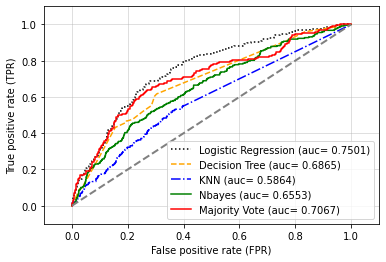

CPU times: user 15 s, sys: 828 ms, total: 15.8 s
Wall time: 2min 19s


In [ ]:
%%time

# display roc for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green','red']
linestyles = [':', '--', '-.', '-','solid']
pltlab = ['Logistic Regression','Decision Tree','KNN','Nbayes','Majority Vote']
grids = [gs_lr,gs_dt, gs_knn,gs_nb,model_m]
print(f"Running for X_Train: {X_train.shape}")
for clf, label, clr, ls in zip(grids, pltlab, colors, linestyles):
    #y_pred = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr,tpr,color = clr,linestyle = ls,label = '%s (auc= %.4f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

# PyTorch

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# is there a GPU availabale. If available use it
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)


cuda:0


In [ ]:
##Pranay
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_kaggle_test

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("minmax", MinMaxScaler())
    ])
XX_train = data_prep_pipeline.fit_transform(X_train)
XX_validation = data_prep_pipeline.transform(X_valid) #Transform test set with the same constants
XX_test = data_prep_pipeline.transform(X_test) #Transform test set with the same constants

print(XX_train.shape)
print(XX_validation.shape)
print(XX_test.shape)
print(type(XX_train))

(12300, 311)
(15376, 311)
(3076, 311)
<class 'numpy.ndarray'>


In [ ]:
print(XX_kaggle_test.shape)

(48744, 311)


In [ ]:
# convert numpy arrays to tensors
X_train_tensor = torch.from_numpy(XX_train)
X_validation_tensor = torch.from_numpy(XX_validation)
X_test_tensor = torch.from_numpy(XX_test)
X_kaggle_tensor = torch.from_numpy(XX_kaggle_test)
#X_test = torch.Tensor(X_test.to_numpy(dtype=np.float64))
#y_train_tensor = torch.from_numpy(y_train)
#y_test_tensor = torch.from_numpy(y_test)
#y_validation_tensor = torch.from_numpy(y_valid)
y_train_tensor = torch.Tensor(y_train.to_numpy(dtype=np.float64))
y_test_tensor = torch.Tensor(y_test.to_numpy(dtype=np.float64))
y_validation_tensor = torch.Tensor(y_valid.to_numpy(dtype=np.float64))


In [ ]:
X_kaggle_tensor.size()

torch.Size([48744, 311])

In [ ]:
# create TensorDataset in PyTorch
hdcr_train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
hdcr_validation = torch.utils.data.TensorDataset(X_validation_tensor, y_validation_tensor)
hdcr_test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
# create dataloader
batch_size = 96
trainloader_hdcr = torch.utils.data.DataLoader(hdcr_train, batch_size=batch_size, shuffle=True, num_workers=2)
validloader_hdcr = torch.utils.data.DataLoader(hdcr_validation, batch_size=XX_test.shape[0], shuffle=False, num_workers=2)
testloader_hdcr = torch.utils.data.DataLoader(hdcr_test, batch_size=XX_test.shape[0], shuffle=False, num_workers=2)


In [ ]:
kaggle_x_tensor = torch.Tensor(XX_kaggle_test)


In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
## Added by Pranay

from torchsummary import summary  #install it if necessary using !pip install torchsummary 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score



In [ ]:
CUDA_LAUNCH_BLOCKING = 1

## Deep Learning Using OOP Model

In [ ]:
# Multi_Layer_Preceptron 


class Multi_Layer_Preceptron(nn.Module):

    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(311,100),
            nn.Sigmoid(),
            nn.ReLU(),
            nn.Linear(100,20),
            nn.Sigmoid(),
            nn.ReLU(),
            nn.Linear(20,1),
            nn.Sigmoid(),
            nn.ReLU()
        )
        
        
    def forward(self, x):
        return self.layers(x).sigmoid()
    
#create Multi_Layer_Preceptron Instance and set it to GPU
MLP = Multi_Layer_Preceptron()
MLP.to(torch.double).cuda()

#Create loss function and set it to GPU
loss_function = nn.MSELoss()
loss_function.to(torch.double).cuda()

#create optimizer
optimizer = torch.optim.Adam(MLP.parameters(), lr=1e-1)


prediction_list = np.array([])
epoch_rocs = []

sample_size = 500
mini_batch_size = sample_size/5
    
for epoch in range(0, 5):
    
    # Print epoch
    print(f'Epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0

    #create list of predictions for current epoch
    prediction_list = np.array([])

    correct_predictions = 0
    #loop through each datapoint
    for i, data in enumerate(X_train_tensor[0:sample_size]):

        #make tensor a double and move it to GPU
        data = data.to(torch.double).cuda()
        
        #make tensor a double and move it to GPU
        y_double = torch.Tensor([y_train_tensor[i]]).to(torch.double).cuda()
        
        #zero out the optimizer
        optimizer.zero_grad()
        
        #predict y from data
        prediction = MLP(data).to(torch.double).cuda()
        print(prediction)

        if prediction.round() == y_double[0]:
          correct_predictions += 1



        #append predition on to prediction list detach it from cpu and make it sigmoid
        prediction_list = np.append(prediction_list,prediction.cpu().detach().numpy()[0])

        #calculate loss
        loss = loss_function(prediction,y_double)
        
        #set loss to a double
        loss = loss.to(torch.double)
        
        #backward loss
        loss.backward()

        #step through optimizer
        optimizer.step()
        
        current_loss += loss.item()


    print("Accuracy {}".format(correct_predictions/sample_size))

    y_auc = y_train_tensor.cpu().detach().numpy()[0:len(prediction_list)]
    y_double.cpu().detach().numpy()

    prediction.cpu().detach().numpy().round()

    print("ROC: {}".format(roc_auc_score(y_auc, prediction_list)))

#prediction_list_val = []
#for data in X_validation_tensor:
  #prediction = MLP(x)

  #prediction_list_val = np.append(prediction_list_val,prediction.cpu().detach().numpy().round()[0])

#print("ROC: {}".format(roc_auc_score(y_auc, prediction_list_val)))


Streaming output truncated to the last 5000 lines.
tensor([0.5002], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5001], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5001], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)
tensor([0.5000], device='cuda:0', dtype=torch.flo

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
X_kaggle_tensor_save = X_kaggle_tensor

## Deep Learning Using Sequential Model

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


from torchsummary import summary  #install it if necessary using !pip install torchsummary
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

D_in = XX_test.shape[1]
print(D_in)
test_size=0.15
D_hidden =20
D_out = 1
# Use the nn package to define our model and loss function.
# use the sequential API makes things simple
model = torch.nn.Sequential(    
    torch.nn.Linear(D_in, D_hidden),   # X.matmul(W1)
    nn.ReLU(), #nn.Sigmoid()           # Relu( X.matmul(W1))
    nn.Linear(in_features=D_hidden, out_features=D_out)       # Relu( X.matmul(W1)).matmul(W2)
   
)
model.to(device)
# MSE loss scaffolding layer
loss_fn = torch.nn.MSELoss(size_average=True)
#loss_fn = nn.CrossEntropyLoss()  #for classfication

optimizer = optim.SGD(model.parameters(), lr=0.0001)
correct_predictions_accuracy = 0
epochs = range(5)
count = 0 
running_loss = 0.0

for epoch in epochs:
    running_loss = 0.0
    accuracy_count = 0
    batch_count = 0
    for batch, data in enumerate(trainloader_hdcr):
        batch_count += 1
        inputs, target = data[0].to(device), data[1].to(device)


        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()

        # do forward pass
        output = model(inputs.float())

        # compute loss and gradients
        loss = loss_fn(output, torch.unsqueeze(target.float(), dim=1))
        # get gradients w.r.t to parameters
        loss.backward()

        # perform gradient update
        optimizer.step()

        # print statistics
        running_loss += loss.item()*inputs.size(0)
        count += inputs.size(0)

        accuracy_count += accuracy_score(target.cpu().detach().numpy(),output.cpu().detach().numpy().round())
    print(f"Epoch {epoch+1}, mini batch loss {batch+1}, MSE loss: {np.round(running_loss/count, 3)}")
    print(f"Epoch Accuracy: {accuracy_count/batch_count}")

print('Finished Training')

count = 0 
running_loss = 0.0
correct_predictions_accuracy = 0
for batch, data in enumerate(validloader_hdcr):
    inputs, target = data[0].to(device), data[1].to(device)
    # do forward pass
    output = model(inputs.float())

    # compute loss and gradients
    loss = loss_fn(output, torch.unsqueeze(target.float(), dim=1))
    # print statistics
    # print statistics
    running_loss += loss.item()*inputs.size(0)
    count += inputs.size(0)
    test_size +=batch_size
print(f" Validation  MSE loss: {np.round(running_loss/count, 3)}")
print(f" Validation  Accuracy: {accuracy_score(target.cpu().detach().numpy(),output.cpu().detach().numpy().round())}")
print(f" Validation  ROC: {roc_auc_score(target.cpu().detach().numpy(),output.cpu().detach().numpy().round())}")
count = 0 
running_loss = 0.0
correct_predictions_accuracy = 0
for batch, data in enumerate(testloader_hdcr):
    inputs, target = data[0].to(device), data[1].to(device)
    # do forward pass
    output = model(inputs.float())

        
    # compute loss and gradients
    loss = loss_fn(output, torch.unsqueeze(target.float(), dim=1))
    # print statistics
    running_loss += loss.item()*inputs.size(0)
    count += inputs.size(0)
    test_size +=batch_size
print(f" TEST  MSE loss: {np.round(running_loss/count, 3)}")
print(f" TEST  Accuracy: {accuracy_score(target.cpu().detach().numpy(),output.cpu().detach().numpy().round())}")
print(f" TEST ROC: {roc_auc_score(target.cpu().detach().numpy(),output.cpu().detach().numpy().round())}")
# predict test
output = model(X_test_tensor.float().to(device))
# calculate loss via torch
loss = loss_fn(output, torch.unsqueeze(y_test_tensor.float().to(device), dim=1))/test_size
print(loss)


model = model.double()
results = model(X_kaggle_tensor)

311
Epoch 1, mini batch loss 129, MSE loss: 0.089
Epoch Accuracy: 0.9144864341085271
Epoch 2, mini batch loss 129, MSE loss: 0.044
Epoch Accuracy: 0.914163436692506
Epoch 3, mini batch loss 129, MSE loss: 0.029
Epoch Accuracy: 0.9148901808785534
Epoch 4, mini batch loss 129, MSE loss: 0.022
Epoch Accuracy: 0.9144864341085276
Epoch 5, mini batch loss 129, MSE loss: 0.017
Epoch Accuracy: 0.9153746770025839
Finished Training
 Validation  MSE loss: 0.091
 Validation  Accuracy: 0.916015625
 Validation  ROC: 0.504250797024442
 TEST  MSE loss: 0.084
 TEST  Accuracy: 0.9164499349804941
 TEST ROC: 0.4984087694483734
tensor(0.0001, device='cuda:0', grad_fn=<DivBackward0>)


In [ ]:
X_kaggle_tensor = X_kaggle_tensor.double()

In [ ]:
model = model.double

In [ ]:
results

tensor([[ 0.0481],
        [-0.0232],
        [ 0.0267],
        ...,
        [ 0.1104],
        [ 0.0259],
        [ 0.2205]], device='cuda:0', dtype=torch.float64,
       grad_fn=<AddmmBackward0>)

In [ ]:
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = abs(results.cpu().detach().numpy().round())

In [ ]:
submit_df.head()

SK_ID_CURR  TARGET
0      100001     0.0
1      100005     0.0
2      100013     0.0
3      100028     0.0
4      100038     0.0

# Kaggle Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

array([0.07581967, 0.20481928, 0.05069124, 0.05069124, 0.05069124,
       0.05069124, 0.05069124, 0.05069124, 0.05069124, 0.16044776])

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.075820
1      100005  0.204819
2      100013  0.050691
3      100028  0.050691
4      100038  0.050691

In [ ]:
submit_df.to_csv("submission_phase3.csv",index=False)

In [ ]:
# Kaggle submission via the command line API
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"